In [1]:
# Data Wrangling
import pandas as pd
import requests
import numpy as np

# Charts
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import ScalarFormatter

from textwrap import fill

# Machine Learning
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r'EID Charity Main Data File.csv', sep=',', encoding='latin-1') # UTF-8 is unable to parse all the rows

# Data Cleaning

In [3]:
pd.set_option('display.max_columns', None) # Quick glance upon all the columns. ? come from arabic words that were not parsed accurately.
df.head()

,Unnamed: 0,unique_id,association,association (Trans),donor_name,donor_name (Trans),country,country (Trans),project_type,project_type (Trans),project_name,project_name (Trans),space,beneficiaries,project_components,project_components (Trans),project_title,project_title (Trans),execution_period_c_Implemented_num,execution_period_c_Implemented_text,execution_period_c_Implemented_text (Trans),start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,execution_period_donor_text (Trans),start_date_second,end_date_second,total_cost,amount_written_total_Cost,amount_written_total_Cost (Trans),implementation_cost,amount_written_implementation_Cost,amount_written_implementation_Cost (Trans)
0,0,1,????? ??????? ??????? - ???????,Al-Furqan Charitable Foundation - Pakistan,???? ??????? ????? ?????,Mohammed Abdullah Mahmoud Al Mulla,???????,Pakistan,????? ????? ??????? ???,Syria relief aid for families,??? ??? ??? ????? ????,"Well of the people of Qatar, may God protect them",0.0,0,??? ??? ??????? ??? ?? 45 ??? 80 ????? ? ?? ??...,"Digging an artesian well, depth from 45 to 80 ...",NaN,NaN,6,??? ????,six months,7/25/2014 12:00:00 AM,1/25/2015 12:00:00 AM,8,?????? ????,eight months,7/25/2014 12:00:00 AM,3/25/2015 12:00:00 AM,9000,???? ???? ???? ?????,"Nine thousand riyals, only",8550,?????? ???? ???????? ?????? ???? ?????,"Eight thousand five hundred and fifty riyals, ..."
1,1,2,????? ?????? ???????? ??????? - ?????,Al-Hikma Yemeni Charitable Society - Yemen,????? ???? ???? ??????,Aisha Dhiab Rashid Al-Obaid,?????,To whom,????? ?????,Memorization centers,????? ????? ???? ???? ?????? ?????? ?????? ??????,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0.0,0,???? ????? ?????? ?????? ?????? ?? ????? ?????...,Building a two-semester school for memorizing ...,????? ?????? ? ???? ? ??? ? \n,"Al-Wajin, Sharab, Taiz",10,???? ????,Ten months,7/8/2007 00:00:00,5/8/2008 00:00:00,12,???? ??? ?????,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,57000,???? ?????? ??? ???? ??? ?? ???,Fifty-seven thousand riyals only,54150,????? ?????? ??? ????? ?????? ???? ??? ?? ???,Fifty-four thousand one hundred and fifty riya...
2,2,3,??????? ??????????? ?????? ?????? ??????? - ??...,Mauritanian Association for Reviving Prohibite...,???? ???? ???? ????? ???????,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,?????????,Mauritania,?????,Mosques,???? ???? ?? ???? ???????,Rashid bin Faisal Al Nuaimi Mosque,300.0,500,???? ???? ? ?? ????? ???? ? ?????? ? ?????? ? \n,Building a mosque - with ablution places - bat...,??? ??????\n,As needed,12,???? ??? ?????,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,18,?????? ??? ??????,Eighteen months,7/8/2007 00:00:00,1/8/2009 00:00:00,58500,?????? ?????? ??? ????? ???? ???? ??? ?? ???,Fifty-eight thousand five hundred riyals only,55575,???? ?????? ??? ???????? ????? ?????? ???? ?...,Fifty-five thousand five hundred and seventy-f...
3,3,4,????? ?????? ??????? - ???????,Al-Manhal Charitable Society - Somalia,????? ????? ????? ? ???? ???? ?,"Mansour Mubarak Al-Nasr, may God have mercy on...",???????,Somalia,?????,Mosques,???? ????? ????? ????? ? ???? ???? ?,"Mansour Mubarak Al-Nasr Mosque, may God have m...",120.0,200,???? ???? ? ?? ????? ???? ? ?????? ? ??? ? ???...,Building a mosque - with ablution places - bat...,?????? ??????? ? ????? ?????? ? ?????? ? \n,Sharkia Governorate - Bosaso City - Maraño,12,???? ??? ?????,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,?????? ??? ??????,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,55500,???? ?????? ??? ????? ???? ???? ??? ?? ???,Fifty-five thousand and five hundred riyals only,52725,????? ?????? ??? ???????? ????? ?????? ???? ?...,Fifty-two thousand seven hundred and twenty-fi...
4,4,6,????? ?????? ?????? ? ??????,Good Life Organization - Niger,??? ???? ???????,Abdullah Al-Suwaidi,??????,Niger,?????,Mosques,???? ??? ??? ?????? ? ??? ???? ??? ? ????? ???...,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",60.0,100,???? ???? ? ?? ????? ???? ? ?????

In [4]:
df.columns

Index(['Unnamed: 0', 'unique_id', 'association', 'association (Trans)',
       'donor_name', 'donor_name (Trans)', 'country', 'country (Trans)',
       'project_type', 'project_type (Trans)', 'project_name',
       'project_name (Trans)', 'space', 'beneficiaries', 'project_components',
       'project_components (Trans)', 'project_title', 'project_title (Trans)',
       'execution_period_c_Implemented_num',
       'execution_period_c_Implemented_text',
       'execution_period_c_Implemented_text (Trans)', 'start_date_first',
       'end_date_first', 'execution_period_donor_num',
       'execution_period_donor_text', 'execution_period_donor_text (Trans)',
       'start_date_second', 'end_date_second', 'total_cost',
       'amount_written_total_Cost', 'amount_written_total_Cost (Trans)',
       'implementation_cost', 'amount_written_implementation_Cost',
       'amount_written_implementation_Cost (Trans)'],
      dtype='object')

In [5]:
# Remove unnecessary columns. E.g. Unnamed, and the ones that are repeated and don't contain '(Trans)', as they are originally in arabic and not successfully parsed
exclude_cols = ['Unnamed: 0', 'association', 'donor_name', 'project_type', 'project_name', 'country', 'space',
                'project_components', 'project_title', 'execution_period_c_Implemented_text', 'execution_period_donor_text',
                'amount_written_total_Cost', 'amount_written_implementation_Cost']

df = df.loc[:, ~df.columns.isin(exclude_cols)]

In [6]:
df.head()

,unique_id,association (Trans),donor_name (Trans),country (Trans),project_type (Trans),project_name (Trans),beneficiaries,project_components (Trans),project_title (Trans),execution_period_c_Implemented_num,execution_period_c_Implemented_text (Trans),start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text (Trans),start_date_second,end_date_second,total_cost,amount_written_total_Cost (Trans),implementation_cost,amount_written_implementation_Cost (Trans)
0,1,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",NaN,6,six months,7/25/2014 12:00:00 AM,1/25/2015 12:00:00 AM,8,eight months,7/25/2014 12:00:00 AM,3/25/2015 12:00:00 AM,9000,"Nine thousand riyals, only",8550,"Eight thousand five hundred and fifty riyals, ..."
1,2,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",10,Ten months,7/8/2007 00:00:00,5/8/2008 00:00:00,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,57000,Fifty-seven thousand riyals only,54150,Fifty-four thousand one hundred and fifty riya...
2,3,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,18,Eighteen months,7/8/2007 00:00:00,1/8/2009 00:00:00,58500,Fifty-eight thousand five hundred riyals only,55575,Fifty-five thousand five hundred and seventy-f...
3,4,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,55500,Fifty-five thousand and five hundred riyals only,52725,Fifty-two thousand seven hundred and twenty-fi...
4,6,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,53000,Only fifty three thousand riyals,50350,Only fifty thousand three hundred and fifty ri...


In [7]:
# Remove the ' (Trans)' from the columns I kept, to make the data easier to read.
df.columns = df.columns.str.replace(' (Trans)', '', regex=False)

In [8]:
df.head()

,unique_id,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
0,1,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",NaN,6,six months,7/25/2014 12:00:00 AM,1/25/2015 12:00:00 AM,8,eight months,7/25/2014 12:00:00 AM,3/25/2015 12:00:00 AM,9000,"Nine thousand riyals, only",8550,"Eight thousand five hundred and fifty riyals, ..."
1,2,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",10,Ten months,7/8/2007 00:00:00,5/8/2008 00:00:00,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,57000,Fifty-seven thousand riyals only,54150,Fifty-four thousand one hundred and fifty riya...
2,3,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,18,Eighteen months,7/8/2007 00:00:00,1/8/2009 00:00:00,58500,Fifty-eight thousand five hundred riyals only,55575,Fifty-five thousand five hundred and seventy-f...
3,4,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,55500,Fifty-five thousand and five hundred riyals only,52725,Fifty-two thousand seven hundred and twenty-fi...
4,6,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,53000,Only fifty three thousand riyals,50350,Only fifty thousand three hundred and fifty ri...


In [9]:
# Verify null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45842 entries, 0 to 45841
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   unique_id                            45842 non-null  int64 
 1   association                          45842 non-null  object
 2   donor_name                           45841 non-null  object
 3   country                              45842 non-null  object
 4   project_type                         45842 non-null  object
 5   project_name                         45821 non-null  object
 6   beneficiaries                        45842 non-null  int64 
 7   project_components                   45744 non-null  object
 8   project_title                        29946 non-null  object
 9   execution_period_c_Implemented_num   45842 non-null  int64 
 10  execution_period_c_Implemented_text  45834 non-null  object
 11  start_date_first                     4584

In [10]:
# Fill NAs with "Not specified" from all columns, as most of them refer to categorical or descriptive values.
df = df.fillna('Not specified')

In [11]:
# Verify Duplicates
duplicate_rows = df.duplicated().sum()
print(f'Duplicate rows: {duplicate_rows}') # No duplicates, so I keep with the data cleaning.

Duplicate rows: 0


In [12]:
# Describe for general info
df.describe()

,unique_id,beneficiaries,execution_period_c_Implemented_num,execution_period_donor_num,total_cost,implementation_cost
count,45842.000000,45842.000000,45842.000000,45842.000000,4.584200e+04,4.584200e+04
mean,26840.210767,17.302343,6.431308,8.999106,6.239479e+04,6.046360e+04
std,16614.297832,108.756478,2.785036,3.541294,4.082540e+05,3.999020e+05
min,1.000000,-200.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,12693.250000,0.000000,6.000000,8.000000,2.600000e+03,2.405000e+03
50%,24654.500000,0.000000,6.000000,8.000000,6.000000e+03,5.700000e+03
75%,43508.750000,0.000000,6.000000,8.000000,2.950000e+04,2.756500e+04
max,55368.000000,15000.000000,53.000000,88.000000,5.102755e+07,5.102755e+07


In [13]:
# Verify the id column. Is each donation unique?
unique_id_duplicates = df['unique_id'].duplicated().any()
print(unique_id_duplicates) # False. Which means there are no duplicates

False


In [14]:
# There are no duplicate rows, so I will also remove the unique_id row. If I were to analyze relational databases, I wouldn't be removing any id columns
df = df.drop('unique_id', axis=1) 
df.head()

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,6,six months,7/25/2014 12:00:00 AM,1/25/2015 12:00:00 AM,8,eight months,7/25/2014 12:00:00 AM,3/25/2015 12:00:00 AM,9000,"Nine thousand riyals, only",8550,"Eight thousand five hundred and fifty riyals, ..."
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",10,Ten months,7/8/2007 00:00:00,5/8/2008 00:00:00,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,57000,Fifty-seven thousand riyals only,54150,Fifty-four thousand one hundred and fifty riya...
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,18,Eighteen months,7/8/2007 00:00:00,1/8/2009 00:00:00,58500,Fifty-eight thousand five hundred riyals only,55575,Fifty-five thousand five hundred and seventy-f...
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,55500,Fifty-five thousand and five hundred riyals only,52725,Fifty-two thousand seven hundred and twenty-fi...
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,53000,Only fifty three thousand riyals,50350,Only fifty thousand three hundred and fifty ri...


In [15]:
# Verify the beneficiaries column. There seems to be projects with a negative in beneficiaries, which seems to be impossible
negative_beneficiaries = df[df['beneficiaries'] < 0]
negative_beneficiaries # 2 rows out of 45,852. Removing them wouldn't alter the data drastically.

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
2961,Al-Manhal Charitable Society - Somalia,Maryam Saeed Abdul Aziz Al-Ansari,Somalia,Memorization centers,Al-Mutahabouna fi Allah Center (Umama bint Ham...,-200,Building a center for memorizing the Noble Qur...,Not specified,6,six months,8/30/2008 12:00:00 AM,2/28/2009 12:00:00 AM,8,eight months,8/30/2008 12:00:00 AM,4/30/2009 12:00:00 AM,86100,Eighty six thousand and one hundred riyals only,81795,Eighty-one thousand seven hundred and ninety-f...
3354,Al-Manhal Charitable Society - Somalia,"Between Sweden, Al-Ajami, may God have mercy o...",Somalia,Memorization centers,"Memorization Center between Sweden, between Al...",-200,2 classrooms and restrooms,Lower Shabelle - Afgooy - side Lol,6,six months,11/16/2008 12:00:00 AM,5/16/2009 12:00:00 AM,8,eight months,11/16/2008 12:00:00 AM,7/16/2009 12:00:00 AM,86100,Eighty six thousand and one hundred riyals,81795,Eighty one thousand seven hundred and ninety f...


In [16]:
# Removing the rows with negative beneficiaries
df = df.drop(negative_beneficiaries.index)
df.head()

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,6,six months,7/25/2014 12:00:00 AM,1/25/2015 12:00:00 AM,8,eight months,7/25/2014 12:00:00 AM,3/25/2015 12:00:00 AM,9000,"Nine thousand riyals, only",8550,"Eight thousand five hundred and fifty riyals, ..."
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",10,Ten months,7/8/2007 00:00:00,5/8/2008 00:00:00,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,57000,Fifty-seven thousand riyals only,54150,Fifty-four thousand one hundred and fifty riya...
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,18,Eighteen months,7/8/2007 00:00:00,1/8/2009 00:00:00,58500,Fifty-eight thousand five hundred riyals only,55575,Fifty-five thousand five hundred and seventy-f...
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,55500,Fifty-five thousand and five hundred riyals only,52725,Fifty-two thousand seven hundred and twenty-fi...
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,53000,Only fifty three thousand riyals,50350,Only fifty thousand three hundred and fifty ri...


In [17]:
# Verify the total_cost column. Why do some projects have a total_cost of 0. Is it accurate?
no_cost = df[df['total_cost'] == 0]
no_cost

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
606,Grass Albar Foundation - Nigeria,Eid Charitable Foundation,Nigeria,Sight Initiative,Not specified,0,Not specified,Not specified,4,four months,1/1/2007 00:00:00,12/19/2007 12:00:00 AM,8,eight months,8/19/2007 12:00:00 AM,4/19/2007 12:00:00 AM,0,Not specified,0,Not specified
3686,Jerusalem International Foundation - Lebanon,Eid Charitable Foundation,Palestine,Relief Palestine Zakat money,Installing an integrated audio system for the ...,0,Installing an integrated audio system for the ...,Al-Aqsa Mosque,12,Twelve months,1/1/2004 00:00:00,1/1/2005 00:00:00,12,Twelve months,1/1/2004 00:00:00,1/19/2010 12:00:00 AM,0,Three million four hundred forty-nine thousand...,0,Three million four hundred forty-nine thousand...
5740,Al-Manhal Charitable Society - Somalia,The Ministry of Awqaf and Islamic Affairs,Somalia,Health centers,Dar Al-Hekma Hospital,0,Building a two-storey hospital according to th...,Mogadishu - Somalia,12,Twelve months,1/1/2004 00:00:00,1/1/2005 00:00:00,12,Twelve months,1/1/2004 00:00:00,1/1/2005 00:00:00,0,"One million four hundred thousand riyals, only",0,"One million, three hundred and thirty thousand..."
14121,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Diameter,Shipping expenses,0,0,0,Not specified,6,six months,1/26/2012 12:00:00 AM,7/26/2012 12:00:00 AM,8,eight months,1/26/2012 12:00:00 AM,9/26/2012 12:00:00 AM,0,Zero Real,0,Zero Real
14504,Al Ihsan Charitable Society - Yemen,Eid Charitable Foundation,To whom,Patient treatment expenses,Medicines distribution project,0,The project of distributing medicines and medi...,To whom,4,four months,3/4/2012 00:00:00,7/4/2012 00:00:00,8,eight months,3/4/2012 00:00:00,11/4/2012 00:00:00,0,Not specified,0,Not specified
16120,Al-Falah Movement for Islamic Culture and Educ...,Eid Charitable Foundation,Senegal,Iftar fasting Senegal 1433,Fasting breakfast for the year 1433,0,It consists of a fasting breakfast in the form...,Not specified,4,four months,7/15/2012 12:00:00 AM,11/15/2012 12:00:00 AM,8,eight months,7/15/2012 12:00:00 AM,3/15/2013 12:00:00 AM,0,"Twenty thousand riyals, only",0,"Eighteen thousand five hundred riyals, only"
16426,Al-Falah Movement for Islamic Culture and Educ...,Eid Charitable Foundation,Senegal,Iftar fasting Senegal 1433,Fasting breakfast for the year 1433,0,It consists of a fasting breakfast in the form...,Not specified,4,four months,7/15/2012 12:00:00 AM,11/15/2012 12:00:00 AM,8,eight months,7/15/2012 12:00:00 AM,3/15/2013 12:00:00 AM,0,"Twenty thousand riyals, only",0,"Eighteen thousand five hundred riyals, only"
17710,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Diameter,Hajj allowances 1433 AH,Ibrahim Ahmed Mohamed,1,Hajj instead of Sultan Zayed Al-Mansour Al-Nua...,Not specified,6,six months,10/11/2012 00:00:00,4/11/2013 00:00:00,8,eight months,10/11/2012 00:00:00,6/11/2013 00:00:00,0,Zero Real,0,Zero Real
18139,Al-Falah Movement for Islamic Culture and Educ...,Eid Charitable Foundation,Senegal,Iftar fasting Senegal 1433,Fasting breakfast for the year 1433,0,It consists of a fasting breakfast in the form...,Not specified,4,four months,7/15/2012 12:00:00 AM,11/15/2012 12:00:00 AM,8,eight months,7/15/2012 12:00:00 AM,3/15/2013 12:00:00 AM,0,"Twenty thousand riyals, only",0,"Eighteen thousand five hundred riyals, only"
25706,Social Development Foundation - Pakistan,Benefactor 55522329,Pakistan,Well drilling,Well of good,0,Drilling a 62 meter deep well in rocky areas w...,Not specified,12,Twelve months,7/1/2014 00:00:00,7/1/2015 00:00:00,12,Twelve months,7/1/2014 00:00:00,7/1/2015 00:00:00,0,"Four thousa

In [18]:
"""
Upon a quick glance it seems to be that a total_cost of 0 could come from the following:
- The project was canceled
- The project is planned, but has not been implemented yet
- Typos, some projects have the amount written in the amount_written_total_Cost, but the figure is not written in the total_cost
"""

# See how many rows represent each of the scenarios

'\nUpon a quick glance it seems to be that a total_cost of 0 could come from the following:\n- The project was canceled\n- The project is planned, but has not been implemented yet\n- Typos, some projects have the amount written in the amount_written_total_Cost, but the figure is not written in the total_cost\n'

In [19]:
# Canceled projects, regardless if it was written with 'l' or double 'l' and ignoring uppercase
df_cancelled = df[df.astype(str).apply(lambda row: row.str.contains("Cancelled|Canceled", case=False)).any(axis=1)]
df_cancelled.shape[0] # 35 rows out of 45,840

35

In [20]:
# Removing the 35 rows of canceled projects would not alter the data drastically. And this could also help us avoid any biases that could potentially skew our data
df = df.drop(df_cancelled.index)
df.head()

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,6,six months,7/25/2014 12:00:00 AM,1/25/2015 12:00:00 AM,8,eight months,7/25/2014 12:00:00 AM,3/25/2015 12:00:00 AM,9000,"Nine thousand riyals, only",8550,"Eight thousand five hundred and fifty riyals, ..."
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",10,Ten months,7/8/2007 00:00:00,5/8/2008 00:00:00,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,57000,Fifty-seven thousand riyals only,54150,Fifty-four thousand one hundred and fifty riya...
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,18,Eighteen months,7/8/2007 00:00:00,1/8/2009 00:00:00,58500,Fifty-eight thousand five hundred riyals only,55575,Fifty-five thousand five hundred and seventy-f...
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,55500,Fifty-five thousand and five hundred riyals only,52725,Fifty-two thousand seven hundred and twenty-fi...
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,53000,Only fifty three thousand riyals,50350,Only fifty thousand three hundred and fifty ri...


In [21]:
"""
For the projects that are planned, but not implemented yet I have no way of verifying which ones have already been implemented as this is a public database.

But if I were working with this one, I would try to find a way to verify the status.
If not, I would talk with a domain expert and ask them what it is the recommended way to go with those rows. 
"""

'\nFor the projects that are planned, but not implemented yet I have no way of verifying which ones have already been implemented as this is a public database.\n\nBut if I were working with this one, I would try to find a way to verify the status.\nIf not, I would talk with a domain expert and ask them what it is the recommended way to go with those rows. \n'

In [22]:
# Potential typos
df_potential_typos = df[
    (df['total_cost'] == 0) & # Cost equals 0
    (df['amount_written_total_Cost'].notna()) & # Written total cost is not a NaN
    (~df['amount_written_total_Cost'].str.contains('Zero', case=False, na=False))  # Written total Cost does not contain the string 'Zero', regardless of uppercase
]

df_potential_typos

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
606,Grass Albar Foundation - Nigeria,Eid Charitable Foundation,Nigeria,Sight Initiative,Not specified,0,Not specified,Not specified,4,four months,1/1/2007 00:00:00,12/19/2007 12:00:00 AM,8,eight months,8/19/2007 12:00:00 AM,4/19/2007 12:00:00 AM,0,Not specified,0,Not specified
3686,Jerusalem International Foundation - Lebanon,Eid Charitable Foundation,Palestine,Relief Palestine Zakat money,Installing an integrated audio system for the ...,0,Installing an integrated audio system for the ...,Al-Aqsa Mosque,12,Twelve months,1/1/2004 00:00:00,1/1/2005 00:00:00,12,Twelve months,1/1/2004 00:00:00,1/19/2010 12:00:00 AM,0,Three million four hundred forty-nine thousand...,0,Three million four hundred forty-nine thousand...
5740,Al-Manhal Charitable Society - Somalia,The Ministry of Awqaf and Islamic Affairs,Somalia,Health centers,Dar Al-Hekma Hospital,0,Building a two-storey hospital according to th...,Mogadishu - Somalia,12,Twelve months,1/1/2004 00:00:00,1/1/2005 00:00:00,12,Twelve months,1/1/2004 00:00:00,1/1/2005 00:00:00,0,"One million four hundred thousand riyals, only",0,"One million, three hundred and thirty thousand..."
14504,Al Ihsan Charitable Society - Yemen,Eid Charitable Foundation,To whom,Patient treatment expenses,Medicines distribution project,0,The project of distributing medicines and medi...,To whom,4,four months,3/4/2012 00:00:00,7/4/2012 00:00:00,8,eight months,3/4/2012 00:00:00,11/4/2012 00:00:00,0,Not specified,0,Not specified
16120,Al-Falah Movement for Islamic Culture and Educ...,Eid Charitable Foundation,Senegal,Iftar fasting Senegal 1433,Fasting breakfast for the year 1433,0,It consists of a fasting breakfast in the form...,Not specified,4,four months,7/15/2012 12:00:00 AM,11/15/2012 12:00:00 AM,8,eight months,7/15/2012 12:00:00 AM,3/15/2013 12:00:00 AM,0,"Twenty thousand riyals, only",0,"Eighteen thousand five hundred riyals, only"
16426,Al-Falah Movement for Islamic Culture and Educ...,Eid Charitable Foundation,Senegal,Iftar fasting Senegal 1433,Fasting breakfast for the year 1433,0,It consists of a fasting breakfast in the form...,Not specified,4,four months,7/15/2012 12:00:00 AM,11/15/2012 12:00:00 AM,8,eight months,7/15/2012 12:00:00 AM,3/15/2013 12:00:00 AM,0,"Twenty thousand riyals, only",0,"Eighteen thousand five hundred riyals, only"
18139,Al-Falah Movement for Islamic Culture and Educ...,Eid Charitable Foundation,Senegal,Iftar fasting Senegal 1433,Fasting breakfast for the year 1433,0,It consists of a fasting breakfast in the form...,Not specified,4,four months,7/15/2012 12:00:00 AM,11/15/2012 12:00:00 AM,8,eight months,7/15/2012 12:00:00 AM,3/15/2013 12:00:00 AM,0,"Twenty thousand riyals, only",0,"Eighteen thousand five hundred riyals, only"
25706,Social Development Foundation - Pakistan,Benefactor 55522329,Pakistan,Well drilling,Well of good,0,Drilling a 62 meter deep well in rocky areas w...,Not specified,12,Twelve months,7/1/2014 00:00:00,7/1/2015 00:00:00,12,Twelve months,7/1/2014 00:00:00,7/1/2015 00:00:00,0,"Four thousand four hundred and fifty riyals, only",0,"Four thousand, one hundred and sixteen riyals"
32628,Ethar Foundation for Social Development - Yemen,The share of Al-Rumaihi&#39;s collection of weeks,To whom,Ensuring preachers and imams is conditional,Sponsoring an imam for the year 2015 and 2016,0,It consists of renewing the sponsorship of Ima...,Not specified,6,six months,8/2/2015 00:00:00,2/2/2016 00:00:00,8,eight months,7/19/2016 12:00:00 AM,10/23/2016 12:00:00 AM,0,"Three hundred thousand riyals, only",0,"Three hundred thousand riyals, only"
33698,"Sunni Revival Endowment for Education, Relief ..

In [23]:
print(f'Total rows with potential typos: {df_potential_typos.shape[0]}') # 25 rows out of 45,805

Total rows with potential typos: 25


In [24]:
# Removing potential_typo rows would not make much of a difference
df = df.drop(df_potential_typos.index)
df.head()

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,6,six months,7/25/2014 12:00:00 AM,1/25/2015 12:00:00 AM,8,eight months,7/25/2014 12:00:00 AM,3/25/2015 12:00:00 AM,9000,"Nine thousand riyals, only",8550,"Eight thousand five hundred and fifty riyals, ..."
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",10,Ten months,7/8/2007 00:00:00,5/8/2008 00:00:00,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,57000,Fifty-seven thousand riyals only,54150,Fifty-four thousand one hundred and fifty riya...
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,18,Eighteen months,7/8/2007 00:00:00,1/8/2009 00:00:00,58500,Fifty-eight thousand five hundred riyals only,55575,Fifty-five thousand five hundred and seventy-f...
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,55500,Fifty-five thousand and five hundred riyals only,52725,Fifty-two thousand seven hundred and twenty-fi...
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,53000,Only fifty three thousand riyals,50350,Only fifty thousand three hundred and fifty ri...


In [25]:
# Verify if there are projects have negative costs, which in the case of donations would not make that much sense
negative_cost = df[df['total_cost'] < 0]
negative_cost
# There are not, so I will continue with the rest of the columns

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost


In [26]:
# Verifying the written amount columns
# Change the strings of the written amount to SAR (Saudi Riyals) if they contain the string riyals
df.loc[df['amount_written_total_Cost'].str.contains(r'riyals?', case=False, na=False),
       'amount_written_total_Cost'] = 'SAR'

df.loc[df['amount_written_implementation_Cost'].str.contains(r'riyals?', case=False, na=False),
       'amount_written_implementation_Cost'] = 'SAR'

In [27]:
# Verify how many of the others were not converted
not_sar_total_cost = df['amount_written_total_Cost'].unique()
not_sar_total_cost.shape[0] # 509 unique values

509

In [28]:
# Verify how many of the others were not converted
not_sar_implementation_cost = df['amount_written_implementation_Cost'].unique()
not_sar_implementation_cost.shape[0] # 10 unique values

10

In [29]:
# See which values are unique
print(not_sar_total_cost)

['SAR' 'Alpha Real only'
 'One hundred twenty-seven thousand three hundred and forty-eight'
 'Eight thousands' 'One thousand five hundred' 'ten thousands'
 'Fifty-seven thousand' 'Thirty eight thousand and five hundred'
 'Seven hundred and fifty' 'Five thousand and three hundred'
 'one thousand and two hundred' 'five hundred' 'Three thousand'
 'Six thousand and five hundred' 'Six hundred' 'five thousand'
 'Seven thousand one hundred and twenty five only'
 'three hundred and fifty' 'Three hundred and twenty'
 'Two hundred and fifty' 'Only fifty-two' 'Only seven hundred and twenty'
 'Four thousand' 'seven thousands' 'four hundred' 'Four hundred and fifty'
 'Five thousand and five hundred' 'Sixty two thousand'
 'Only seven thousand and five hundred'
 'Nine thousand, one hundred and twenty-five' 'Two thousand eight hundred'
 'Three hundred and thirty' 'Five thousand just for one convoy'
 'Two thousand nine hundred seventy-one thousand' 'a thousand'
 'One thousand QR only' 'Only five thousa

In [30]:
print(not_sar_implementation_cost)

['SAR' 'Only eighty one QR' 'Real only' 'Zero Real' 'nine' 'Two hundred'
 'One thousand seven'
 'Nine hundred and eighty-eight thousand seven hundred and eighty five'
 'Twelve thousand four hundred and eighty-eight'
 'Thirty five thousand and seven hundred']


In [31]:
"""
After a quick glance to the unique values, it seems that many of them have the quantity written without the currency,
while others are in other currencies. The ones identified are QR, Real, Fqat (could be a typo of QR), Fen
"""

'\nAfter a quick glance to the unique values, it seems that many of them have the quantity written without the currency,\nwhile others are in other currencies. The ones identified are QR, Real, Fqat (could be a typo of QR), Fen\n'

In [32]:
# Change the strings of the written amount to QAR (Qatari Riyals) if they contain the string riyals
df.loc[df['amount_written_total_Cost'].str.contains(r'riya?ls?|real|fqat|qr', case=False, na=False),
       'amount_written_total_Cost'] = 'QAR'

df.loc[df['amount_written_implementation_Cost'].str.contains(r'riya?ls?|real|fqat|qr', case=False, na=False),
       'amount_written_implementation_Cost'] = 'QAR'

In [33]:
# Verify how many unique values are not converted
not_currency_total_cost = df['amount_written_total_Cost'].unique()
print(f'Unique values for total_cost: {not_currency_total_cost.shape[0]}') # 498 unique values

not_currency_implementation_cost = df['amount_written_implementation_Cost'].unique()
print(f'\nUnique values for implementation_cost: {not_currency_implementation_cost.shape[0]}') # 9 unique values

Unique values for total_cost: 497

Unique values for implementation_cost: 8


In [34]:
# Visualize the rows that were not converted and identify the best way to treat those rows
df_not_currency = df[
    (~df['amount_written_total_Cost'].isin(['SAR', 'QAR'])) & 
    (~df['amount_written_implementation_Cost'].isin(['SAR', 'QAR']))
]

In [35]:
df_not_currency 

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
23790,Ansar al-Sunna Muhammadiyah group - Sudan,Ahmed Mohammed Faraj Al-Khanji,Sudan,The call is conditional,Buying 100 copies of Qurans,0,Buying 100 copies of Qurans,Khartoum,6,six months,3/11/2014 00:00:00,9/11/2014 00:00:00,8,eight months,3/11/2014 00:00:00,11/11/2014 00:00:00,1370,Only one thousand three hundred seventy,1267,One thousand seven
35255,Ansar al-Sunna Muhammadiyah group - Sudan,Share Al Jufairi,Sudan,The call is conditional,Mercy Project,0,Purchase of 100 Qurans in Arabic,The Quran distribution project,6,six months,2/28/2016 12:00:00 AM,8/28/2016 12:00:00 AM,8,eight months,2/28/2016 12:00:00 AM,10/28/2016 12:00:00 AM,1370,One thousand three hundred and seventy,1267,One thousand seven
44756,Islamic University - Sudhi Jywali - Khushab - ...,Eid Charitable Foundation,Pakistan,Educational programs for orphans are not condi...,Project for educational programs for orphans,0,Establishing continuous educational programs f...,Not specified,6,six months,7/20/2017 12:00:00 AM,1/20/2018 12:00:00 AM,8,eight months,8/1/2017 00:00:00,4/1/2018 00:00:00,36,Thirty five thousand and seven hundred,36,Thirty five thousand and seven hundred


In [36]:
# Something I also noticed here, is that there seem to be projects that have no beneficiaries and no cost of anything
# At first glance, it does not make sense for a project to cost nothing and to benefit no one. I will look those rows more carefully.

df_no_cost_no_beneficiaries = df[
    (df['beneficiaries'] == 0) & 
    (df['total_cost'] == 0) & 
    (df['implementation_cost'] == 0)
]

In [37]:
df_no_cost_no_beneficiaries

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
14121,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Diameter,Shipping expenses,0,0,0,Not specified,6,six months,1/26/2012 12:00:00 AM,7/26/2012 12:00:00 AM,8,eight months,1/26/2012 12:00:00 AM,9/26/2012 12:00:00 AM,0,QAR,0,QAR
30386,Sudan Patient Aid Fund - Sudan,Eid Charitable Foundation,Sudan,Ensuring preachers and imams is conditional,Salaries of the advocates of the Sudan Patient...,0,Salaries of the advocates of the Sudan Patient...,It has not been disbursed yet. We are waiting ...,6,six months,5/26/2015 12:00:00 AM,11/26/2015 12:00:00 AM,8,eight months,5/26/2015 12:00:00 AM,1/26/2016 12:00:00 AM,0,QAR,0,QAR
35211,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Diameter,The proceeds of the charitable endowment are g...,Abdullah Faleh Safar Al Tawah Al Hajri,0,Student Name / Abdullah Faleh Al-Hajri IBAN QA...,Not specified,6,six months,2/24/2016 12:00:00 AM,8/24/2016 12:00:00 AM,8,eight months,2/24/2016 12:00:00 AM,10/24/2016 12:00:00 AM,0,QAR,0,QAR
40025,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Diameter,Zakat money Somalia is conditional,0,0,0,Not specified,6,six months,10/4/2016 00:00:00,4/4/2017 00:00:00,8,eight months,10/4/2016 00:00:00,6/4/2017 00:00:00,0,QAR,0,QAR
42578,Sheikh Thani Bin Abdullah Foundation for Human...,Eid Charitable Foundation,Diameter,Iwa - Aleppo Lebih,A project of 800 housing units in Idlib,0,It is a village that houses 800 displaced fami...,Not specified,6,six months,5/1/2017 00:00:00,9/1/2017 00:00:00,8,eight months,5/1/2017 00:00:00,1/1/2018 00:00:00,0,QAR,0,QAR
42579,Sheikh Thani Bin Abdullah Foundation for Human...,Eid Charitable Foundation,Diameter,General - Aleppo to Bey,The flour project to support bakeries,0,It is supporting 6 flour ovens and operating them,Not specified,6,six months,5/1/2017 00:00:00,11/1/2017 00:00:00,8,eight months,5/1/2017 00:00:00,1/1/2018 00:00:00,0,QAR,0,QAR
42581,Sheikh Thani Bin Abdullah Foundation for Human...,Eid Charitable Foundation,Diameter,General - Aleppo to Bey,Al-Sham Medical Complex - Sajoo,0,Supporting Al-Sham Medical Complex with medici...,Not specified,6,six months,5/1/2017 00:00:00,11/1/2017 00:00:00,8,eight months,5/1/2017 00:00:00,1/1/2018 00:00:00,0,QAR,0,QAR
45316,Qatar Red Crescent - Qatar Qatar Red Crescent,Eid Charitable Foundation,Diameter,Relief expenses of Syria charity,-,0,-a,Not specified,6,six months,2/27/2018 12:00:00 AM,6/27/2022 12:00:00 AM,4,four years,2/27/2018 12:00:00 AM,6/27/2022 12:00:00 AM,0,QAR,0,QAR


In [38]:
# It seems that some of these projects are in-kind donations. I will see how many rows these represent
df_no_cost_no_beneficiaries.shape[0] # 16 out of 45788. Removing them would not alter the data drastically

8

In [39]:
df = df.drop(df_no_cost_no_beneficiaries.index)
df

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,6,six months,7/25/2014 12:00:00 AM,1/25/2015 12:00:00 AM,8,eight months,7/25/2014 12:00:00 AM,3/25/2015 12:00:00 AM,9000,SAR,8550,SAR
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",10,Ten months,7/8/2007 00:00:00,5/8/2008 00:00:00,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,57000,SAR,54150,SAR
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,18,Eighteen months,7/8/2007 00:00:00,1/8/2009 00:00:00,58500,SAR,55575,SAR
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,55500,SAR,52725,SAR
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,53000,SAR,50350,SAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45837,Education Above All Foundation,Eid Charitable Foundation,Diameter,Somalia public charity expenses are conditional,Educating children in Somalia - Educate a chil...,0,It is a contribution to the United Nations pro...,Not specified,4,four months,5/26/2019 12:00:00 AM,9/26/2019 12:00:00 AM,8,eight months,5/26/2019 12:00:00 AM,1/26/2020 12:00:00 AM,1000000,SAR,1000000,SAR
45838,Education Above All Foundation,Eid Charitable Foundation,Diameter,Relief Yemen alms,Educating children in Yemen - Educate a child ...,0,It is a contribution to building the national ...,Not specified,4,four months,5/26/2019 12:00:00 AM,9/26/2019 12:00:00 AM,8,eight months,5/26/2019 12:00:00 AM,1/26/2020 12:00:00 AM,1900000,SAR,1900000,SAR
45839,Southeast Asia Development Commission Corporat...,Haya Hamad Al-Mannai,Philippines,Philippines ongoing charity conditional,Restoration of Haya Hamad Al Mannai Mosque,0,Restoration of Haya Hamad Al Mannai Mosque,Philippines,6,six months,7/2/2017 00:00:00,1/2/2018 00:00:00,8,eight months,7/2/2017 00:00:00,3/2/2018 00:00:00,7695,SAR,7118,SAR
45840,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Diameter,Treatment of patients outside Qatar is not spe...,Bahar Shipping Services Company,0,The cost of shipping an ambulance to Sudan for...,Not specified,4,four months,9/4/2019 00:00:00,1/4/2020 00:00:00,8,eight months,9/4/2019 00:00:00,5/4/2020 00:00:00,7000,SAR,7000,SAR


In [40]:
# Also, for the rows that have no cost, it does not matter which currency I fill it in with, as it will still be 0.
# So, I can fill it in with SAR, which is the currency the majority of the rows have.

df.loc[
    (df['total_cost'] == 0) & (df['amount_written_total_Cost'].isna()),
    'amount_written_total_Cost'
] = 'SAR'


In [41]:
df

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,6,six months,7/25/2014 12:00:00 AM,1/25/2015 12:00:00 AM,8,eight months,7/25/2014 12:00:00 AM,3/25/2015 12:00:00 AM,9000,SAR,8550,SAR
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",10,Ten months,7/8/2007 00:00:00,5/8/2008 00:00:00,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,57000,SAR,54150,SAR
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,18,Eighteen months,7/8/2007 00:00:00,1/8/2009 00:00:00,58500,SAR,55575,SAR
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,55500,SAR,52725,SAR
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,53000,SAR,50350,SAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45837,Education Above All Foundation,Eid Charitable Foundation,Diameter,Somalia public charity expenses are conditional,Educating children in Somalia - Educate a chil...,0,It is a contribution to the United Nations pro...,Not specified,4,four months,5/26/2019 12:00:00 AM,9/26/2019 12:00:00 AM,8,eight months,5/26/2019 12:00:00 AM,1/26/2020 12:00:00 AM,1000000,SAR,1000000,SAR
45838,Education Above All Foundation,Eid Charitable Foundation,Diameter,Relief Yemen alms,Educating children in Yemen - Educate a child ...,0,It is a contribution to building the national ...,Not specified,4,four months,5/26/2019 12:00:00 AM,9/26/2019 12:00:00 AM,8,eight months,5/26/2019 12:00:00 AM,1/26/2020 12:00:00 AM,1900000,SAR,1900000,SAR
45839,Southeast Asia Development Commission Corporat...,Haya Hamad Al-Mannai,Philippines,Philippines ongoing charity conditional,Restoration of Haya Hamad Al Mannai Mosque,0,Restoration of Haya Hamad Al Mannai Mosque,Philippines,6,six months,7/2/2017 00:00:00,1/2/2018 00:00:00,8,eight months,7/2/2017 00:00:00,3/2/2018 00:00:00,7695,SAR,7118,SAR
45840,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Diameter,Treatment of patients outside Qatar is not spe...,Bahar Shipping Services Company,0,The cost of shipping an ambulance to Sudan for...,Not specified,4,four months,9/4/2019 00:00:00,1/4/2020 00:00:00,8,eight months,9/4/2019 00:00:00,5/4/2020 00:00:00,7000,SAR,7000,SAR


In [42]:
# Checking again how many rows have no currency
df_not_currency = df[
    (~df['amount_written_total_Cost'].isin(['SAR', 'QAR'])) | 
    (~df['amount_written_implementation_Cost'].isin(['SAR', 'QAR']))
]

df_not_currency

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
3577,The Horn of Africa Charitable Organization - S...,Al-Anoud Hussain Rashid Al-Kubaisi,Somalia,Public orphanages,Maryam bint Abdullah orphanage,0,Dormitory for 40 orphans with facilities and f...,Not specified,12,Twelve months,12/17/2008 12:00:00 AM,12/17/2009 12:00:00 AM,18,Eighteen months,12/17/2008 12:00:00 AM,6/17/2010 12:00:00 AM,127348,One hundred twenty-seven thousand three hundre...,120981,SAR
3599,Sheikh Eid Bin Muhammad Al Thani Foundation - ...,Abdul Rahman Mohammed and Dana Faisal Al Rayes,Indonesia,Charity taking place outside Qatar,A plot of land of Abdul Rahman Mohammed and Da...,0,Buying a plot of land and providing the farmer...,Indonesia,6,six months,12/25/2008 12:00:00 AM,6/25/2009 12:00:00 AM,8,eight months,12/25/2008 12:00:00 AM,8/25/2009 12:00:00 AM,8000,Eight thousands,7600,SAR
3629,Al Ihsan Charitable Society - Yemen,Ahmed Abdul Rahman Al-Sayed,To whom,Well drilling,Well mr,0,Drilling an artesian well with a depth of 35 m...,Not specified,6,six months,8/18/2009 12:00:00 AM,2/18/2010 12:00:00 AM,8,eight months,8/18/2009 12:00:00 AM,4/18/2010 12:00:00 AM,1500,One thousand five hundred,1425,SAR
3722,Ansar al-Sunna Muhammadiyah group - Egypt,Fahd Jassim Al-Abdul Wahhab,Egypt,Charity taking place outside Qatar,Help to build a home for marriage,0,Help to build a house for marriage. Name: Muha...,"Address: Manshaet Abu Omar village, Hussainiya...",6,six months,1/22/2009 12:00:00 AM,7/22/2009 12:00:00 AM,8,eight months,1/22/2009 12:00:00 AM,9/22/2009 12:00:00 AM,10000,ten thousands,9500,SAR
3774,Al-Manhal Charitable Society - Somalia,Noura Al Hajri,Somalia,Mosques,Umm Majid Mosque,200,- Mosque with brushes and microphone,Mahdai village - Jawhar city - Central Shabell...,12,Twelve months,2/3/2009 00:00:00,2/3/2010 00:00:00,18,Eighteen months,2/3/2009 00:00:00,8/3/2010 00:00:00,57000,Fifty-seven thousand,54150,SAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45326,Sudan Patient Aid Fund - Sudan,Abdul Rahman Abdul Jalil Abdul Ghani,Sudan,Other medical equipment and projects,Provision of a nebulizer,0,Provision of a nebulizer,Khartoum,4,four months,7/15/2018 12:00:00 AM,11/15/2018 12:00:00 AM,8,eight months,7/15/2018 12:00:00 AM,3/15/2019 12:00:00 AM,2540,Two thousand five hundred thirty-seven,2350,SAR
45328,Sudan Patient Aid Fund - Sudan,Heirs of Abdul Jalil Abdul Ghani Nasser Al Abd...,Sudan,Other medical equipment and projects,Endowment pharmacy,0,The (SEHA) program to establish medical center...,Khartoum,4,four months,7/15/2018 12:00:00 AM,11/15/2018 12:00:00 AM,8,eight months,7/15/2018 12:00:00 AM,3/15/2019 12:00:00 AM,364150,Three hundred sixty four thousand one hundred ...,336839,SAR
45429,The Holy Quran Society - Boys,Muhammad Ahmad Ali,Boys,The call is conditional,Guarantee of students and Qurans for the Mosq...,0,Sponsoring students and Qurans for the Mosque...,Benin - Enna - Borgo - Goa village in the north,6,six months,1/16/2019 12:00:00 AM,4/21/2018 12:00:00 AM,8,eight months,8/21/2017 12:00:00 AM,4/21/2018 12:00:00 AM,5300,Five thousand one hundred fifty three hundred,4903,SAR
45433,Sheikh Eid Charitable Foundation - Sudan Office,Abdul Rahman Abdul Jalil Abdul Ghani,Sudan,Ongoing charity Sudan is conditional,A three-wheeled (rickshaw) motorcycle used in ...,0,A three-wheeled (rickshaw) motorcycle used in ...,The different states of Sudan,4,four months,8/23/2017 12:00:00 AM,12/23/2017 12:00:00 AM,8,eight months,8/23/2017 12:00:00 AM,4/23/2018 12:00:00 AM,9340,Nine thousand three hundred forty,8640,SAR


In [43]:
# It seems that some of the rows specified the currency in just one of the columns.
# So if it has a currency in one of the columns and not in the other, I will assume that it should have the same currency

# Condition: Rows in which amount_written_total_Cost IS NOT SAR or QAR
mask = ~df['amount_written_total_Cost'].isin(['SAR', 'QAR'])

# Subcondition:
# If implementation cost is SAR → assign SAR in the total cost
df.loc[mask & (df['amount_written_implementation_Cost'] == 'SAR'),
       'amount_written_total_Cost'] = 'SAR'

# If implementation cost is QAR → assign QAR in the total cost
df.loc[mask & (df['amount_written_implementation_Cost'] == 'QAR'),
       'amount_written_total_Cost'] = 'QAR'

# If not, leave it as it is
df 


,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,6,six months,7/25/2014 12:00:00 AM,1/25/2015 12:00:00 AM,8,eight months,7/25/2014 12:00:00 AM,3/25/2015 12:00:00 AM,9000,SAR,8550,SAR
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",10,Ten months,7/8/2007 00:00:00,5/8/2008 00:00:00,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,57000,SAR,54150,SAR
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,18,Eighteen months,7/8/2007 00:00:00,1/8/2009 00:00:00,58500,SAR,55575,SAR
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,55500,SAR,52725,SAR
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,53000,SAR,50350,SAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45837,Education Above All Foundation,Eid Charitable Foundation,Diameter,Somalia public charity expenses are conditional,Educating children in Somalia - Educate a chil...,0,It is a contribution to the United Nations pro...,Not specified,4,four months,5/26/2019 12:00:00 AM,9/26/2019 12:00:00 AM,8,eight months,5/26/2019 12:00:00 AM,1/26/2020 12:00:00 AM,1000000,SAR,1000000,SAR
45838,Education Above All Foundation,Eid Charitable Foundation,Diameter,Relief Yemen alms,Educating children in Yemen - Educate a child ...,0,It is a contribution to building the national ...,Not specified,4,four months,5/26/2019 12:00:00 AM,9/26/2019 12:00:00 AM,8,eight months,5/26/2019 12:00:00 AM,1/26/2020 12:00:00 AM,1900000,SAR,1900000,SAR
45839,Southeast Asia Development Commission Corporat...,Haya Hamad Al-Mannai,Philippines,Philippines ongoing charity conditional,Restoration of Haya Hamad Al Mannai Mosque,0,Restoration of Haya Hamad Al Mannai Mosque,Philippines,6,six months,7/2/2017 00:00:00,1/2/2018 00:00:00,8,eight months,7/2/2017 00:00:00,3/2/2018 00:00:00,7695,SAR,7118,SAR
45840,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Diameter,Treatment of patients outside Qatar is not spe...,Bahar Shipping Services Company,0,The cost of shipping an ambulance to Sudan for...,Not specified,4,four months,9/4/2019 00:00:00,1/4/2020 00:00:00,8,eight months,9/4/2019 00:00:00,5/4/2020 00:00:00,7000,SAR,7000,SAR


In [44]:
# Condition: Rows in which amount_written_implementation_Cost IS NOT SAR or QR
mask2 = ~df['amount_written_implementation_Cost'].isin(['SAR', 'QAR'])

# Subcondition:
# If total cost is SAR → assign SAR in the implementation cost
df.loc[mask2 & (df['amount_written_total_Cost'] == 'SAR'),
       'amount_written_implementation_Cost'] = 'SAR'

# If total cost is QAR → assign QAR in the implementation cost
df.loc[mask2 & (df['amount_written_total_Cost'] == 'QAR'),
       'amount_written_implementation_Cost'] = 'QAR'

# If not, leave it as it is
df 

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,6,six months,7/25/2014 12:00:00 AM,1/25/2015 12:00:00 AM,8,eight months,7/25/2014 12:00:00 AM,3/25/2015 12:00:00 AM,9000,SAR,8550,SAR
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",10,Ten months,7/8/2007 00:00:00,5/8/2008 00:00:00,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,57000,SAR,54150,SAR
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,18,Eighteen months,7/8/2007 00:00:00,1/8/2009 00:00:00,58500,SAR,55575,SAR
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,55500,SAR,52725,SAR
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,53000,SAR,50350,SAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45837,Education Above All Foundation,Eid Charitable Foundation,Diameter,Somalia public charity expenses are conditional,Educating children in Somalia - Educate a chil...,0,It is a contribution to the United Nations pro...,Not specified,4,four months,5/26/2019 12:00:00 AM,9/26/2019 12:00:00 AM,8,eight months,5/26/2019 12:00:00 AM,1/26/2020 12:00:00 AM,1000000,SAR,1000000,SAR
45838,Education Above All Foundation,Eid Charitable Foundation,Diameter,Relief Yemen alms,Educating children in Yemen - Educate a child ...,0,It is a contribution to building the national ...,Not specified,4,four months,5/26/2019 12:00:00 AM,9/26/2019 12:00:00 AM,8,eight months,5/26/2019 12:00:00 AM,1/26/2020 12:00:00 AM,1900000,SAR,1900000,SAR
45839,Southeast Asia Development Commission Corporat...,Haya Hamad Al-Mannai,Philippines,Philippines ongoing charity conditional,Restoration of Haya Hamad Al Mannai Mosque,0,Restoration of Haya Hamad Al Mannai Mosque,Philippines,6,six months,7/2/2017 00:00:00,1/2/2018 00:00:00,8,eight months,7/2/2017 00:00:00,3/2/2018 00:00:00,7695,SAR,7118,SAR
45840,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Diameter,Treatment of patients outside Qatar is not spe...,Bahar Shipping Services Company,0,The cost of shipping an ambulance to Sudan for...,Not specified,4,four months,9/4/2019 00:00:00,1/4/2020 00:00:00,8,eight months,9/4/2019 00:00:00,5/4/2020 00:00:00,7000,SAR,7000,SAR


In [45]:
# Checking again how many rows have no currency
df_not_currency = df[
    (~df['amount_written_total_Cost'].isin(['SAR', 'QAR'])) | 
    (~df['amount_written_implementation_Cost'].isin(['SAR', 'QAR']))
]

df_not_currency.shape[0] # Just 3 rows out of 45,772 are missing the currency. Removing them, does not seem to affect the data drastically

3

In [46]:
# Filter out the rows without SAR or QAR
df = df[
    (df['amount_written_total_Cost'].isin(['SAR', 'QAR'])) | 
    (df['amount_written_implementation_Cost'].isin(['SAR', 'QAR']))
]

df

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,amount_written_total_Cost,implementation_cost,amount_written_implementation_Cost
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,6,six months,7/25/2014 12:00:00 AM,1/25/2015 12:00:00 AM,8,eight months,7/25/2014 12:00:00 AM,3/25/2015 12:00:00 AM,9000,SAR,8550,SAR
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",10,Ten months,7/8/2007 00:00:00,5/8/2008 00:00:00,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,57000,SAR,54150,SAR
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,18,Eighteen months,7/8/2007 00:00:00,1/8/2009 00:00:00,58500,SAR,55575,SAR
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,55500,SAR,52725,SAR
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,53000,SAR,50350,SAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45837,Education Above All Foundation,Eid Charitable Foundation,Diameter,Somalia public charity expenses are conditional,Educating children in Somalia - Educate a chil...,0,It is a contribution to the United Nations pro...,Not specified,4,four months,5/26/2019 12:00:00 AM,9/26/2019 12:00:00 AM,8,eight months,5/26/2019 12:00:00 AM,1/26/2020 12:00:00 AM,1000000,SAR,1000000,SAR
45838,Education Above All Foundation,Eid Charitable Foundation,Diameter,Relief Yemen alms,Educating children in Yemen - Educate a child ...,0,It is a contribution to building the national ...,Not specified,4,four months,5/26/2019 12:00:00 AM,9/26/2019 12:00:00 AM,8,eight months,5/26/2019 12:00:00 AM,1/26/2020 12:00:00 AM,1900000,SAR,1900000,SAR
45839,Southeast Asia Development Commission Corporat...,Haya Hamad Al-Mannai,Philippines,Philippines ongoing charity conditional,Restoration of Haya Hamad Al Mannai Mosque,0,Restoration of Haya Hamad Al Mannai Mosque,Philippines,6,six months,7/2/2017 00:00:00,1/2/2018 00:00:00,8,eight months,7/2/2017 00:00:00,3/2/2018 00:00:00,7695,SAR,7118,SAR
45840,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Diameter,Treatment of patients outside Qatar is not spe...,Bahar Shipping Services Company,0,The cost of shipping an ambulance to Sudan for...,Not specified,4,four months,9/4/2019 00:00:00,1/4/2020 00:00:00,8,eight months,9/4/2019 00:00:00,5/4/2020 00:00:00,7000,SAR,7000,SAR


In [47]:
# Change the name of the columns to reflect the currency, and actually reflect the currency
df = df.rename(columns={"amount_written_total_Cost": "total_cost_currency", "amount_written_implementation_Cost": "implementation_cost_currency"})
df

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_first,end_date_first,execution_period_donor_num,execution_period_donor_text,start_date_second,end_date_second,total_cost,total_cost_currency,implementation_cost,implementation_cost_currency
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,6,six months,7/25/2014 12:00:00 AM,1/25/2015 12:00:00 AM,8,eight months,7/25/2014 12:00:00 AM,3/25/2015 12:00:00 AM,9000,SAR,8550,SAR
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",10,Ten months,7/8/2007 00:00:00,5/8/2008 00:00:00,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,57000,SAR,54150,SAR
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,18,Eighteen months,7/8/2007 00:00:00,1/8/2009 00:00:00,58500,SAR,55575,SAR
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,55500,SAR,52725,SAR
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,53000,SAR,50350,SAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45837,Education Above All Foundation,Eid Charitable Foundation,Diameter,Somalia public charity expenses are conditional,Educating children in Somalia - Educate a chil...,0,It is a contribution to the United Nations pro...,Not specified,4,four months,5/26/2019 12:00:00 AM,9/26/2019 12:00:00 AM,8,eight months,5/26/2019 12:00:00 AM,1/26/2020 12:00:00 AM,1000000,SAR,1000000,SAR
45838,Education Above All Foundation,Eid Charitable Foundation,Diameter,Relief Yemen alms,Educating children in Yemen - Educate a child ...,0,It is a contribution to building the national ...,Not specified,4,four months,5/26/2019 12:00:00 AM,9/26/2019 12:00:00 AM,8,eight months,5/26/2019 12:00:00 AM,1/26/2020 12:00:00 AM,1900000,SAR,1900000,SAR
45839,Southeast Asia Development Commission Corporat...,Haya Hamad Al-Mannai,Philippines,Philippines ongoing charity conditional,Restoration of Haya Hamad Al Mannai Mosque,0,Restoration of Haya Hamad Al Mannai Mosque,Philippines,6,six months,7/2/2017 00:00:00,1/2/2018 00:00:00,8,eight months,7/2/2017 00:00:00,3/2/2018 00:00:00,7695,SAR,7118,SAR
45840,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Diameter,Treatment of patients outside Qatar is not spe...,Bahar Shipping Services Company,0,The cost of shipping an ambulance to Sudan for...,Not specified,4,four months,9/4/2019 00:00:00,1/4/2020 00:00:00,8,eight months,9/4/2019 00:00:00,5/4/2020 00:00:00,7000,SAR,7000,SAR


In [48]:
# Before moving on to the next step, I will create a column that reflexts the costs in US dollars. So we can compare costs in the same currency.
# I chose US dollars because it is the standard currency for international transactions 

# Obtain USD rates for QAR and SAR
api_url = "https://api.exchangerate.host/latest"
symbols = "QAR,SAR" # currencies to convert
params = {"base": "USD", "symbols": symbols} # base, the currency we want USD

try:
    r = requests.get(api_url, params=params, timeout=10)
    r.raise_for_status()
    data = r.json()
    usd_per_qr = 1.0 / data["rates"]["QAR"] # exchange rate for 1 QAR
    usd_per_sar = 1.0 / data["rates"]["SAR"] # exchange rate for 1 SAR
except Exception:
    # Approximate amounts as of Aug 26th, 2025 in case the API fails
    usd_per_qr = 0.2743  # ~1 QAR = 0.2743 USD (peg ≈ 3.64 QAR/USD)
    usd_per_sar = 0.2667 # ~1 SAR = 0.2667 USD (peg ≈ 3.75 SAR/USD)

rates_to_usd = {"QAR": usd_per_qr, "SAR": usd_per_sar}

In [49]:
# 4) Conversion of the costs→ USD
df["total_cost_usd"] = df.apply(
    lambda row: row["total_cost"] * rates_to_usd.get(row["total_cost_currency"], np.nan),
    axis=1
)

# (Opcional) Convierte implementation_cost → USD
df["implementation_cost_usd"] = df.apply(
    lambda row: row["implementation_cost"] * rates_to_usd.get(row["implementation_cost_currency"], np.nan),
    axis=1
)

In [50]:
# Verify and clean the date columms.

"""
By looking at the date columns, it seems that the dataset has 4 date columns:
- Implementation period: start_date_first & end_date_first
    - This seems to be associated with the implementation by the association (execution_period_c_Implemented_num & execution_period_c_Implemented_text)
- Donation period: start_date_second & end_date_second donation by the donor (execution_period_donor_num & execution_period_donor_text)
    - This seems to be associated with the 
"""

# First, I will rename the columns to make it clearer
df = df.rename(columns={
                    "start_date_first": "start_date_implementation",
                    "end_date_first": "end_date_implementation",
                    "start_date_second": "start_date_donation",
                    "end_date_second": "end_date_donation",
                }
            )
df

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_implementation,end_date_implementation,execution_period_donor_num,execution_period_donor_text,start_date_donation,end_date_donation,total_cost,total_cost_currency,implementation_cost,implementation_cost_currency,total_cost_usd,implementation_cost_usd
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,6,six months,7/25/2014 12:00:00 AM,1/25/2015 12:00:00 AM,8,eight months,7/25/2014 12:00:00 AM,3/25/2015 12:00:00 AM,9000,SAR,8550,SAR,2400.3000,2280.2850
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",10,Ten months,7/8/2007 00:00:00,5/8/2008 00:00:00,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,57000,SAR,54150,SAR,15201.9000,14441.8050
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,12,Twelve months,7/8/2007 00:00:00,7/8/2008 00:00:00,18,Eighteen months,7/8/2007 00:00:00,1/8/2009 00:00:00,58500,SAR,55575,SAR,15601.9500,14821.8525
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,55500,SAR,52725,SAR,14801.8500,14061.7575
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,12,Twelve months,7/10/2007 00:00:00,7/10/2008 00:00:00,18,Eighteen months,7/10/2007 00:00:00,1/10/2009 00:00:00,53000,SAR,50350,SAR,14135.1000,13428.3450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45837,Education Above All Foundation,Eid Charitable Foundation,Diameter,Somalia public charity expenses are conditional,Educating children in Somalia - Educate a chil...,0,It is a contribution to the United Nations pro...,Not specified,4,four months,5/26/2019 12:00:00 AM,9/26/2019 12:00:00 AM,8,eight months,5/26/2019 12:00:00 AM,1/26/2020 12:00:00 AM,1000000,SAR,1000000,SAR,266700.0000,266700.0000
45838,Education Above All Foundation,Eid Charitable Foundation,Diameter,Relief Yemen alms,Educating children in Yemen - Educate a child ...,0,It is a contribution to building the national ...,Not specified,4,four months,5/26/2019 12:00:00 AM,9/26/2019 12:00:00 AM,8,eight months,5/26/2019 12:00:00 AM,1/26/2020 12:00:00 AM,1900000,SAR,1900000,SAR,506730.0000,506730.0000
45839,Southeast Asia Development Commission Corporat...,Haya Hamad Al-Mannai,Philippines,Philippines ongoing charity conditional,Restoration of Haya Hamad Al Mannai Mosque,0,Restoration of Haya Hamad Al Mannai Mosque,Philippines,6,six months,7/2/2017 00:00:00,1/2/2018 00:00:00,8,eight months,7/2/2017 00:00:00,3/2/2018 00:00:00,7695,SAR,7118,SAR,2052.2565,1898.3706
45840,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Diameter,Treatment of patients outside Qatar is not spe...,Bahar Shipping Services Company,0,The cost of shipping an ambulance to Sudan for...,Not specified,4,four months,9/4/2019 00:00:00,1/4/2020 00:00:00,8,eight months,9/4/2019 00:00:00,5/4/2020 00:00:00,7000,SAR,7000,SAR,1866.9000,1866.9000


In [51]:
# Next, I will homogenize the format of the dates for all the columns
date_cols = [
    'start_date_donation', 'end_date_donation',
    'start_date_implementation', 'end_date_implementation'
]

# Convert to datetime and just keep the date, without the time
df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')
df[date_cols] = df[date_cols].apply(lambda col: col.dt.normalize())


In [52]:
df

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,execution_period_c_Implemented_num,execution_period_c_Implemented_text,start_date_implementation,end_date_implementation,execution_period_donor_num,execution_period_donor_text,start_date_donation,end_date_donation,total_cost,total_cost_currency,implementation_cost,implementation_cost_currency,total_cost_usd,implementation_cost_usd
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,6,six months,2014-07-25,2015-01-25,8,eight months,2014-07-25,2015-03-25,9000,SAR,8550,SAR,2400.3000,2280.2850
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",10,Ten months,2007-07-08,2008-05-08,12,Twelve months,2007-07-08,2008-07-08,57000,SAR,54150,SAR,15201.9000,14441.8050
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,12,Twelve months,2007-07-08,2008-07-08,18,Eighteen months,2007-07-08,2009-01-08,58500,SAR,55575,SAR,15601.9500,14821.8525
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,12,Twelve months,2007-07-10,2008-07-10,18,Eighteen months,2007-07-10,2009-01-10,55500,SAR,52725,SAR,14801.8500,14061.7575
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,12,Twelve months,2007-07-10,2008-07-10,18,Eighteen months,2007-07-10,2009-01-10,53000,SAR,50350,SAR,14135.1000,13428.3450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45837,Education Above All Foundation,Eid Charitable Foundation,Diameter,Somalia public charity expenses are conditional,Educating children in Somalia - Educate a chil...,0,It is a contribution to the United Nations pro...,Not specified,4,four months,2019-05-26,2019-09-26,8,eight months,2019-05-26,2020-01-26,1000000,SAR,1000000,SAR,266700.0000,266700.0000
45838,Education Above All Foundation,Eid Charitable Foundation,Diameter,Relief Yemen alms,Educating children in Yemen - Educate a child ...,0,It is a contribution to building the national ...,Not specified,4,four months,2019-05-26,2019-09-26,8,eight months,2019-05-26,2020-01-26,1900000,SAR,1900000,SAR,506730.0000,506730.0000
45839,Southeast Asia Development Commission Corporat...,Haya Hamad Al-Mannai,Philippines,Philippines ongoing charity conditional,Restoration of Haya Hamad Al Mannai Mosque,0,Restoration of Haya Hamad Al Mannai Mosque,Philippines,6,six months,2017-07-02,2018-01-02,8,eight months,2017-07-02,2018-03-02,7695,SAR,7118,SAR,2052.2565,1898.3706
45840,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Diameter,Treatment of patients outside Qatar is not spe...,Bahar Shipping Services Company,0,The cost of shipping an ambulance to Sudan for...,Not specified,4,four months,2019-09-04,2020-01-04,8,eight months,2019-09-04,2020-05-04,7000,SAR,7000,SAR,1866.9000,1866.9000


In [53]:
"""
From personal experience, I think it makes more sense to keep the delta days (the difference of days) between the start and the end date, instead of the execution periods.

There could be projects that took the same amount of days, but that could be rounded to a different amount of months.
"""

# Calculate the delta days between the start and the end dates
df['duration_days_implementation'] = (df['end_date_implementation'] - df['start_date_implementation']).dt.days
df['duration_days_donation'] = (df['end_date_donation'] - df['start_date_donation']).dt.days

# Remove the period columns
df = df.drop(columns=['execution_period_c_Implemented_num', 'execution_period_c_Implemented_text','execution_period_donor_num', 'execution_period_donor_text'])
df

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,start_date_implementation,end_date_implementation,start_date_donation,end_date_donation,total_cost,total_cost_currency,implementation_cost,implementation_cost_currency,total_cost_usd,implementation_cost_usd,duration_days_implementation,duration_days_donation
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,2014-07-25,2015-01-25,2014-07-25,2015-03-25,9000,SAR,8550,SAR,2400.3000,2280.2850,184,243.0
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",2007-07-08,2008-05-08,2007-07-08,2008-07-08,57000,SAR,54150,SAR,15201.9000,14441.8050,305,366.0
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,2007-07-08,2008-07-08,2007-07-08,2009-01-08,58500,SAR,55575,SAR,15601.9500,14821.8525,366,550.0
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,2007-07-10,2008-07-10,2007-07-10,2009-01-10,55500,SAR,52725,SAR,14801.8500,14061.7575,366,550.0
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,2007-07-10,2008-07-10,2007-07-10,2009-01-10,53000,SAR,50350,SAR,14135.1000,13428.3450,366,550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45837,Education Above All Foundation,Eid Charitable Foundation,Diameter,Somalia public charity expenses are conditional,Educating children in Somalia - Educate a chil...,0,It is a contribution to the United Nations pro...,Not specified,2019-05-26,2019-09-26,2019-05-26,2020-01-26,1000000,SAR,1000000,SAR,266700.0000,266700.0000,123,245.0
45838,Education Above All Foundation,Eid Charitable Foundation,Diameter,Relief Yemen alms,Educating children in Yemen - Educate a child ...,0,It is a contribution to building the national ...,Not specified,2019-05-26,2019-09-26,2019-05-26,2020-01-26,1900000,SAR,1900000,SAR,506730.0000,506730.0000,123,245.0
45839,Southeast Asia Development Commission Corporat...,Haya Hamad Al-Mannai,Philippines,Philippines ongoing charity conditional,Restoration of Haya Hamad Al Mannai Mosque,0,Restoration of Haya Hamad Al Mannai Mosque,Philippines,2017-07-02,2018-01-02,2017-07-02,2018-03-02,7695,SAR,7118,SAR,2052.2565,1898.3706,184,243.0
45840,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Diameter,Treatment of patients outside Qatar is not spe...,Bahar Shipping Services Company,0,The cost of shipping an ambulance to Sudan for...,Not specified,2019-09-04,2020-01-04,2019-09-04,2020-05-04,7000,SAR,7000,SAR,1866.9000,1866.9000,122,243.0


In [54]:
# Exploration of Categorical Columns
print(f'Columns: {df.columns}\n')
df.head()

Columns: Index(['association', 'donor_name', 'country', 'project_type', 'project_name',
       'beneficiaries', 'project_components', 'project_title',
       'start_date_implementation', 'end_date_implementation',
       'start_date_donation', 'end_date_donation', 'total_cost',
       'total_cost_currency', 'implementation_cost',
       'implementation_cost_currency', 'total_cost_usd',
       'implementation_cost_usd', 'duration_days_implementation',
       'duration_days_donation'],
      dtype='object')



,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,start_date_implementation,end_date_implementation,start_date_donation,end_date_donation,total_cost,total_cost_currency,implementation_cost,implementation_cost_currency,total_cost_usd,implementation_cost_usd,duration_days_implementation,duration_days_donation
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,2014-07-25,2015-01-25,2014-07-25,2015-03-25,9000,SAR,8550,SAR,2400.30,2280.2850,184,243.0
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,To whom,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",2007-07-08,2008-05-08,2007-07-08,2008-07-08,57000,SAR,54150,SAR,15201.90,14441.8050,305,366.0
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,2007-07-08,2008-07-08,2007-07-08,2009-01-08,58500,SAR,55575,SAR,15601.95,14821.8525,366,550.0
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,2007-07-10,2008-07-10,2007-07-10,2009-01-10,55500,SAR,52725,SAR,14801.85,14061.7575,366,550.0
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,2007-07-10,2008-07-10,2007-07-10,2009-01-10,53000,SAR,50350,SAR,14135.10,13428.3450,366,550.0


In [55]:
# Verify the 'country' column
unique_values = df['country'].unique()
print("Unique values:", unique_values)

Unique values: ['Pakistan' 'To whom' 'Mauritania' 'Somalia' 'Niger' 'Indonesia' 'Egypt'
 'Kenya' 'Palestine' 'Sudan' 'Iraq' 'Philippines' 'Kosova' 'India'
 'Denmark' 'France' 'Germany' 'Diameter' 'Lebanon' 'the two seas' 'Sweden'
 'Boys' 'Togo' 'Thailand' 'Kuwait' 'Canada' 'Ghana' 'Nigeria' 'Sri Lanka'
 'South Africa' 'Jordan' 'Senegal' 'The United Arab Emirates' 'Bangladesh'
 'New Zealand' 'Djibouti' 'Saudi' 'Tanzania' 'Tatarstan' 'Ukraine'
 'Poland' 'Financial' 'Syria' 'Malaysia' 'Holland' 'Gambia' 'United State'
 'Australia' 'Russia' 'Comoros' 'Turkey' 'Chad' 'Britain' 'Albania'
 'China' 'Tunisia' 'Ethiopia' 'Nepal' 'Brazil' 'Burundi' 'Cambodia'
 'Malawi' 'Macedonia' 'Maldives' 'Bosnia and Herzegovina' 'Mexico'
 'Tajikistan' 'Cameroon' 'Africa' 'Rwanda' 'Kazakhstan' 'Switzerland'
 'Kyrgyzstan' 'Morocco, West, sunset']


In [56]:
# There seems to be something going on with the name of the countries. Some of them were not translated accurately, and some others have minor mistakes.
# I wil check the original data in arabic, translate it using a translator, and change the names accordingly.
translation_replacements = {
    'To whom': 'Yemen',
    'Diameter': 'Qatar',
    'the two seas': 'Bahrain',
    'Boys': 'Benin',
    'Financial': 'Mali'
    }

df['country'].replace(translation_replacements, regex=True, inplace=True)

In [57]:
# For personal preference, I will also change some countries names to their most familiar terms
familiar_term_replacements = {
    'Kosova': 'Kosovo',
    'Saudi': 'Saudi Arabia',
    'the two seas': 'Bahrain',
    'Boys': 'Benin',
    'Financial': 'Mali',
    'Tatarstan': 'Russia',
    'The United Arab Emirates': 'United Arab Emirates',
    'Holland': 'Netherlands',
    'United State': 'United States',
    'Britain': 'Great Britain',
    'Morocco, West, sunset': 'Morocco'
    }

df['country'].replace(familiar_term_replacements, regex=True, inplace=True)

In [58]:
# Also, Africa is not a country, so I will see how many rows have that as a country
africa_rows = df[df['country'] == 'Africa']
africa_rows

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,start_date_implementation,end_date_implementation,start_date_donation,end_date_donation,total_cost,total_cost_currency,implementation_cost,implementation_cost_currency,total_cost_usd,implementation_cost_usd,duration_days_implementation,duration_days_donation
26013,Sheikh Eid Charitable Foundation Qatar,Mohammed Jaber Al-Kuwari,Africa,Mosques,Mosque of Muhammad and his sheikh,167,Building a 100 square meter mosque with abluti...,Africa,2014-07-08,2015-07-08,2014-07-08,2015-07-08,85000,SAR,78625,SAR,22669.5,20969.2875,365,365.0


In [59]:
# Seems there is just one row with 'Africa' as the country.
# But by looking at the association, it seems that the country of the donor is actually Qatar. Maybe the project is located in Africa
df['country'].replace('Africa', 'Qatar', inplace=True)

In [60]:
# Verify the modifications were applied
unique_values = df['country'].unique()
print("Unique values verification:", unique_values)

Unique values verification: ['Pakistan' 'Yemen' 'Mauritania' 'Somalia' 'Niger' 'Indonesia' 'Egypt'
 'Kenya' 'Palestine' 'Sudan' 'Iraq' 'Philippines' 'Kosovo' 'India'
 'Denmark' 'France' 'Germany' 'Qatar' 'Lebanon' 'Bahrain' 'Sweden' 'Benin'
 'Togo' 'Thailand' 'Kuwait' 'Canada' 'Ghana' 'Nigeria' 'Sri Lanka'
 'South Africa' 'Jordan' 'Senegal' 'United Arab Emirates' 'Bangladesh'
 'New Zealand' 'Djibouti' 'Saudi Arabia' 'Tanzania' 'Russia' 'Ukraine'
 'Poland' 'Mali' 'Syria' 'Malaysia' 'Netherlands' 'Gambia' 'United States'
 'Australia' 'Comoros' 'Turkey' 'Chad' 'Great Britain' 'Albania' 'China'
 'Tunisia' 'Ethiopia' 'Nepal' 'Brazil' 'Burundi' 'Cambodia' 'Malawi'
 'Macedonia' 'Maldives' 'Bosnia and Herzegovina' 'Mexico' 'Tajikistan'
 'Cameroon' 'Rwanda' 'Kazakhstan' 'Switzerland' 'Kyrgyzstan' 'Morocco']


In [61]:
df

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,start_date_implementation,end_date_implementation,start_date_donation,end_date_donation,total_cost,total_cost_currency,implementation_cost,implementation_cost_currency,total_cost_usd,implementation_cost_usd,duration_days_implementation,duration_days_donation
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,2014-07-25,2015-01-25,2014-07-25,2015-03-25,9000,SAR,8550,SAR,2400.3000,2280.2850,184,243.0
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,Yemen,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",2007-07-08,2008-05-08,2007-07-08,2008-07-08,57000,SAR,54150,SAR,15201.9000,14441.8050,305,366.0
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,2007-07-08,2008-07-08,2007-07-08,2009-01-08,58500,SAR,55575,SAR,15601.9500,14821.8525,366,550.0
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,2007-07-10,2008-07-10,2007-07-10,2009-01-10,55500,SAR,52725,SAR,14801.8500,14061.7575,366,550.0
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,2007-07-10,2008-07-10,2007-07-10,2009-01-10,53000,SAR,50350,SAR,14135.1000,13428.3450,366,550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45837,Education Above All Foundation,Eid Charitable Foundation,Qatar,Somalia public charity expenses are conditional,Educating children in Somalia - Educate a chil...,0,It is a contribution to the United Nations pro...,Not specified,2019-05-26,2019-09-26,2019-05-26,2020-01-26,1000000,SAR,1000000,SAR,266700.0000,266700.0000,123,245.0
45838,Education Above All Foundation,Eid Charitable Foundation,Qatar,Relief Yemen alms,Educating children in Yemen - Educate a child ...,0,It is a contribution to building the national ...,Not specified,2019-05-26,2019-09-26,2019-05-26,2020-01-26,1900000,SAR,1900000,SAR,506730.0000,506730.0000,123,245.0
45839,Southeast Asia Development Commission Corporat...,Haya Hamad Al-Mannai,Philippines,Philippines ongoing charity conditional,Restoration of Haya Hamad Al Mannai Mosque,0,Restoration of Haya Hamad Al Mannai Mosque,Philippines,2017-07-02,2018-01-02,2017-07-02,2018-03-02,7695,SAR,7118,SAR,2052.2565,1898.3706,184,243.0
45840,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Qatar,Treatment of patients outside Qatar is not spe...,Bahar Shipping Services Company,0,The cost of shipping an ambulance to Sudan for...,Not specified,2019-09-04,2020-01-04,2019-09-04,2020-05-04,7000,SAR,7000,SAR,1866.9000,1866.9000,122,243.0


In [62]:
# Create Month and Year Columns that could be useful in visualizations and further analysis
df['start_month'] = df['start_date_implementation'].dt.month
df['start_month_name'] = df['start_date_implementation'].dt.strftime('%B')
df['start_year'] = df['start_date_implementation'].dt.year
df['year_month'] = df['start_date_implementation'].dt.to_period('M')

In [63]:
# Now that each column seems to be clean, I will reorder them in a way that feels more organized
new_column_order = [
                'association', 'donor_name', 'country', 'project_type', 'project_name',
                'beneficiaries', 'project_components', 'project_title',
                'start_month', 'start_month_name','start_year', 'year_month',
                'start_date_implementation', 'end_date_implementation', 'duration_days_implementation',
                'start_date_donation', 'end_date_donation', 'duration_days_donation',
                'total_cost', 'total_cost_currency', 'total_cost_usd',
                'implementation_cost', 'implementation_cost_currency', 'implementation_cost_usd',
                ]

df = df[new_column_order]
df.head()

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,start_month,start_month_name,start_year,year_month,start_date_implementation,end_date_implementation,duration_days_implementation,start_date_donation,end_date_donation,duration_days_donation,total_cost,total_cost_currency,total_cost_usd,implementation_cost,implementation_cost_currency,implementation_cost_usd
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,7,July,2014,2014-07,2014-07-25,2015-01-25,184,2014-07-25,2015-03-25,243.0,9000,SAR,2400.30,8550,SAR,2280.2850
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,Yemen,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",7,July,2007,2007-07,2007-07-08,2008-05-08,305,2007-07-08,2008-07-08,366.0,57000,SAR,15201.90,54150,SAR,14441.8050
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,7,July,2007,2007-07,2007-07-08,2008-07-08,366,2007-07-08,2009-01-08,550.0,58500,SAR,15601.95,55575,SAR,14821.8525
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,7,July,2007,2007-07,2007-07-10,2008-07-10,366,2007-07-10,2009-01-10,550.0,55500,SAR,14801.85,52725,SAR,14061.7575
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,7,July,2007,2007-07,2007-07-10,2008-07-10,366,2007-07-10,2009-01-10,550.0,53000,SAR,14135.10,50350,SAR,13428.3450


In [64]:
# After implementing all the steps, I will use a describe for general info of the data
df.describe()

,beneficiaries,start_month,start_year,duration_days_implementation,duration_days_donation,total_cost,total_cost_usd,implementation_cost,implementation_cost_usd
count,45769.000000,45769.000000,45769.000000,45769.000000,45768.000000,4.576900e+04,4.576900e+04,4.576900e+04,4.576900e+04
mean,17.333326,6.202342,2013.110096,196.445869,275.793873,6.221220e+04,1.659206e+04,6.027885e+04,1.607637e+04
std,108.830400,3.123161,2.869344,111.971024,125.911424,4.078252e+05,1.087670e+05,3.994500e+05,1.065333e+05
min,0.000000,1.000000,2004.000000,-1113.000000,-1113.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,4.000000,2011.000000,181.000000,243.000000,2.600000e+03,6.934200e+02,2.405000e+03,6.414135e+02
50%,0.000000,6.000000,2013.000000,183.000000,244.000000,6.000000e+03,1.600200e+03,5.700000e+03,1.520190e+03
75%,0.000000,8.000000,2016.000000,184.000000,245.000000,2.950000e+04,7.867650e+03,2.756500e+04,7.351586e+03
max,15000.000000,12.000000,2019.000000,3120.000000,3086.000000,5.102755e+07,1.360905e+07,5.102755e+07,1.360905e+07


In [65]:
# It seems to be that there are projects that have negative duration for implementation days.
negative_duration_implementation = df[df['duration_days_implementation'] < 0]
print(f'Amount of projects with negative numbers in duration days: {negative_duration_implementation.shape[0]} \n')

negative_duration_implementation.head()

Amount of projects with negative numbers in duration days: 29 



,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,start_month,start_month_name,start_year,year_month,start_date_implementation,end_date_implementation,duration_days_implementation,start_date_donation,end_date_donation,duration_days_donation,total_cost,total_cost_currency,total_cost_usd,implementation_cost,implementation_cost_currency,implementation_cost_usd
320,Al-Hikma Yemeni Charitable Society - Yemen,Ghanim bin Aweidah bin Mohammed Al Thani,Yemen,Memorization centers,Sharifa Bint Ali Al Badi Center for memorizing...,0,Building a center for memorizing the Holy Qur...,Rahhab - Al-Rabadi - Jabla,9,September,2007,2007-09,2007-09-24,2007-07-03,-83,2007-01-03,2007-09-03,243.0,500,SAR,133.3500,475,SAR,126.6825
652,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Qatar,Expenses to stop charitable Kosova airport,Qatar Foundation,0,This amount is considered the cost of residenc...,Not specified,9,September,2007,2007-09,2007-09-16,2007-01-16,-243,2007-09-16,2007-05-16,-123.0,16350,SAR,4360.5450,16350,SAR,4360.5450
859,Al-Manhal Charitable Society - Somalia,Maryam Mustafa Mohammed Al-Youssef,Somalia,Mosques,Maryam Al-Youssef Mosque - may God protect her,250,A mosque - ablution places - bathrooms - brush...,As needed,12,December,2007,2007-12,2007-12-05,2007-07-03,-155,2007-01-03,2007-09-03,243.0,1000,SAR,266.7000,950,SAR,253.3650
4022,Al-Rashed Charitable Foundation - Yemen,Rabia Ahmed Eid Al-Youssef Al-Kuwari,Yemen,Water coolers outside Qatar,Brad Rabia Ahmed Al-Kuwari - No. 1,0,Water coolers placed in mosques,Not specified,5,May,2009,2009-05,2009-05-06,2009-03-09,-58,2008-09-09,2009-05-09,242.0,9125,SAR,2433.6375,8669,SAR,2312.0223
5638,Charitable Society for Social Solidarity - Iraq,First to lease,Iraq,Call unspecified year,Contribution to the sponsorship of 28 advocates,0,Contribution to the sponsorship of 28 advocates,Not specified,10,October,2009,2009-10,2009-10-12,2009-09-19,-23,2009-03-19,2009-11-19,245.0,300,SAR,80.0100,285,SAR,76.0095


In [66]:
# Also, there are projects that have negative duration for donation days.
negative_duration_donation = df[df['duration_days_donation'] < 0]
print(f'Amount of projects with negative numbers in duration days: {negative_duration_donation.shape[0]} \n')

negative_duration_donation.head()

Amount of projects with negative numbers in duration days: 23 



,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,start_month,start_month_name,start_year,year_month,start_date_implementation,end_date_implementation,duration_days_implementation,start_date_donation,end_date_donation,duration_days_donation,total_cost,total_cost_currency,total_cost_usd,implementation_cost,implementation_cost_currency,implementation_cost_usd
581,Al Ihsan Charitable Society - Yemen,Nasser Hassan Al-Obaidly,Yemen,Water coolers outside Qatar,"Brad Hassan Abdullah Al-Obaidly, may God have ...",0,Buy a refrigerator with three 160-liter faucets,Hadramout - Yemen,10,October,2007,2007-10,2007-10-27,2008-04-27,183,2007-10-27,2007-09-02,-55.0,2000,SAR,533.4000,1900,SAR,506.7300
652,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Qatar,Expenses to stop charitable Kosova airport,Qatar Foundation,0,This amount is considered the cost of residenc...,Not specified,9,September,2007,2007-09,2007-09-16,2007-01-16,-243,2007-09-16,2007-05-16,-123.0,16350,SAR,4360.5450,16350,SAR,4360.5450
12883,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Qatar,Orphans and families sponsorship expenses,Paying the dues for Qatari orphans for the mon...,0,Paying the dues for Qatari orphans for the mon...,Not specified,12,December,2011,2011-12,2011-12-13,2011-06-13,-183,2011-12-13,2011-08-13,-122.0,62251,SAR,16602.3417,62251,SAR,16602.3417
12884,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Qatar,Orphans and families sponsorship expenses,Paying the dues of Qatari orphans for the mont...,0,Paying the dues of Qatari orphans for the mont...,Not specified,12,December,2011,2011-12,2011-12-13,2011-06-13,-183,2011-12-13,2011-08-13,-122.0,61750,SAR,16468.7250,61750,SAR,16468.7250
13121,Grass Albar Foundation - Nigeria,Moza Abdul Aziz Al Ali,Nigeria,Other medical equipment and projects,Performing a surgical operation on the reward ...,0,"Combating blindness, by performing cataract su...","Combating blindness, by conducting eye surgeri...",11,November,2011,2011-11,2011-11-03,2012-04-30,179,2012-11-03,2012-10-31,-3.0,550,SAR,146.6850,522,SAR,139.2174


In [67]:
"""
Out of the 45,769 projects, less than 0.1% show an earlier value in the end_date columns instead of the start_date.
- 29 projects in the implementation dates
- 23 projects in the donation dates

This likely results from data entry mistakes.
But I cannot be sure. Ideally, if I had access to the individuals who recorded the dates, I would verify and correct them directly in the dataset.
However, since this is a public dataset, I do not have that option.

Given that these records represent a very small fraction of the data and are not statistically significant, I will remove those rows from the analysis.

"""

'\nOut of the 45,769 projects, less than 0.1% show an earlier value in the end_date columns instead of the start_date.\n- 29 projects in the implementation dates\n- 23 projects in the donation dates\n\nThis likely results from data entry mistakes.\nBut I cannot be sure. Ideally, if I had access to the individuals who recorded the dates, I would verify and correct them directly in the dataset.\nHowever, since this is a public dataset, I do not have that option.\n\nGiven that these records represent a very small fraction of the data and are not statistically significant, I will remove those rows from the analysis.\n\n'

In [68]:
df= df[
    (df['duration_days_implementation'] >= 0) &
    (df['duration_days_donation'] >= 0)
]


In [69]:
df

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,start_month,start_month_name,start_year,year_month,start_date_implementation,end_date_implementation,duration_days_implementation,start_date_donation,end_date_donation,duration_days_donation,total_cost,total_cost_currency,total_cost_usd,implementation_cost,implementation_cost_currency,implementation_cost_usd
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,7,July,2014,2014-07,2014-07-25,2015-01-25,184,2014-07-25,2015-03-25,243.0,9000,SAR,2400.3000,8550,SAR,2280.2850
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,Yemen,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",7,July,2007,2007-07,2007-07-08,2008-05-08,305,2007-07-08,2008-07-08,366.0,57000,SAR,15201.9000,54150,SAR,14441.8050
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,7,July,2007,2007-07,2007-07-08,2008-07-08,366,2007-07-08,2009-01-08,550.0,58500,SAR,15601.9500,55575,SAR,14821.8525
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,7,July,2007,2007-07,2007-07-10,2008-07-10,366,2007-07-10,2009-01-10,550.0,55500,SAR,14801.8500,52725,SAR,14061.7575
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,7,July,2007,2007-07,2007-07-10,2008-07-10,366,2007-07-10,2009-01-10,550.0,53000,SAR,14135.1000,50350,SAR,13428.3450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45837,Education Above All Foundation,Eid Charitable Foundation,Qatar,Somalia public charity expenses are conditional,Educating children in Somalia - Educate a chil...,0,It is a contribution to the United Nations pro...,Not specified,5,May,2019,2019-05,2019-05-26,2019-09-26,123,2019-05-26,2020-01-26,245.0,1000000,SAR,266700.0000,1000000,SAR,266700.0000
45838,Education Above All Foundation,Eid Charitable Foundation,Qatar,Relief Yemen alms,Educating children in Yemen - Educate a child ...,0,It is a contribution to building the national ...,Not specified,5,May,2019,2019-05,2019-05-26,2019-09-26,123,2019-05-26,2020-01-26,245.0,1900000,SAR,506730.0000,1900000,SAR,506730.0000
45839,Southeast Asia Development Commission Corporat...,Haya Hamad Al-Mannai,Philippines,Philippines ongoing charity conditional,Restoration of Haya Hamad Al Mannai Mosque,0,Restoration of Haya Hamad Al Mannai Mosque,Philippines,7,July,2017,2017-07,2017-07-02,2018-01-02,184,2017-07-02,2018-03-02,243.0,7695,SAR,2052.2565,7118,SAR,1898.3706
45840,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Qatar,Treatment of patients outside Qatar is not spe...,Bahar Shipping Services Company,0,The cost of shipping an ambulance to Sudan for...,Not specified,9,September,2019,2019-09,2019-09-04,2020-01-04,122,2019-09-04,2020-05-04,243.0,7000,SAR,1866.9000,7000,SAR,1866.9000


In [70]:
# Some projects may have no duration. I will verify those
# Implementation days
no_duration_implementation = df[df['duration_days_implementation'] == 0]
print(f'Amount of projects with 0 duration days: {no_duration_implementation.shape[0]} \n')

Amount of projects with 0 duration days: 189 



In [71]:
no_duration_implementation

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,start_month,start_month_name,start_year,year_month,start_date_implementation,end_date_implementation,duration_days_implementation,start_date_donation,end_date_donation,duration_days_donation,total_cost,total_cost_currency,total_cost_usd,implementation_cost,implementation_cost_currency,implementation_cost_usd
3588,Kurdish Islamic League - Kurdistan - Iraq,Eid Charitable Foundation,Iraq,Udhiyah outside Qatar,The sacrificial animal project for the year 14...,0,It is the cost of implementing the sacrifice p...,0,12,December,2008,2008-12,2008-12-22,2008-12-22,0,2008-12-22,2009-08-22,243.0,50000,SAR,13335.0000,47500,SAR,12668.2500
7197,Al-Furqan Charitable Foundation - Pakistan,Sarah Ahmed Al Mohannadi,Pakistan,Well drilling,"Well, Noura Abdullah Jassim Al Mohannadi, may ...",0,"- Surface well, 61.5 meters deep, with an elec...",Places in need of water projects and suffering...,1,January,2009,2009-01,2009-01-01,2009-01-01,0,2009-01-01,2009-01-01,0.0,4000,SAR,1066.8000,3800,SAR,1013.4600
7199,Al-Furqan Charitable Foundation - Pakistan,Naima Suhail Khamis,Pakistan,Well drilling,"Naima well, Sahl Khamis",0,"- Surface well, 61.5 meters deep, with an elec...",Places in need of water projects and suffering...,1,January,2009,2009-01,2009-01-01,2009-01-01,0,2009-01-01,2009-01-01,0.0,4000,SAR,1066.8000,3800,SAR,1013.4600
7689,Sheikh Eid Bin Muhammad Al Thani Foundation - ...,Ahmed Al-Sheikh and Hajer Al-Youssef,Indonesia,Well drilling,Well of the white hands,0,"- A shallow well, depth (30 meters or more) wi...",Indonesia,1,January,2009,2009-01,2009-01-01,2009-01-01,0,2009-01-01,2009-01-01,0.0,6000,SAR,1600.2000,5700,SAR,1520.1900
7695,Sheikh Eid Bin Muhammad Al Thani Foundation - ...,Ahmed Al-Sheikh and Hajer Al-Youssef,Indonesia,Well drilling,White-handed well number 2,0,A shallow well (exposed constructed of circula...,Sukoda Mai - Tanah Saral - Bugoor - West Java ...,1,January,2009,2009-01,2009-01-01,2009-01-01,0,2009-01-01,2009-01-01,0.0,5000,SAR,1333.5000,4750,SAR,1266.8250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33184,Solidarity Organization for Relief and Develop...,Amal Muhammad Ali Muhammad Al-Jamii,Sudan,Poor homes outside Qatar,A poor house in the reward of Amal Muhammad Al...,0,Building a house with local materials (mat + b...,States of Darfur,9,September,2015,2015-09,2015-09-20,2015-09-20,0,2015-09-20,2015-09-20,0.0,2000,SAR,533.4000,1850,SAR,493.3950
33780,Social Development Organization - Somalia,Philanthropist,Somalia,Well drilling,Well Barr,0,"Drilling a shallow well in a bucket, depth (15...",Somalia - Luuq city - Gedo - Luuq city,10,October,2015,2015-10,2015-10-31,2015-10-31,0,2015-10-31,2015-10-31,0.0,10800,SAR,2880.3600,9990,SAR,2664.3330
34639,Al-Manar Educational Foundation - Kenya,Latifa Youssef Mubarak Borshid,Kenya,Sponsorship of a student is conditional,Ensure the preacher,0,The project is a guarantee of the preacher Abd...,Not specified,1,January,2016,2016-01,2016-01-28,2016-01-28,0,2016-01-28,2016-01-28,0.0,18000,SAR,4800.6000,1684,SAR,449.1228
35277,Grass Albar Foundation - Nigeria,Jawaher Abdullah Muhammad Abdullah,Nigeria,Nigeria ongoing charity expenses conditional,Buying a head of goat or lamb as a reward for ...,0,Buying a head of goat or lamb for milk product...,A sheep is given to a poor family,2,February,2016,2016-02,2016-02-06,2016-02-06,0,2016-02-06,2016-02-06,0.0,500,SAR,133.3500,463,SAR,123.4821


In [72]:
# Implementation days
no_duration_donation= df[df['duration_days_donation'] == 0]
print(f'Amount of projects with 0 duration days: {no_duration_donation.shape[0]} \n')

Amount of projects with 0 duration days: 236 



In [73]:
no_duration_donation

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,start_month,start_month_name,start_year,year_month,start_date_implementation,end_date_implementation,duration_days_implementation,start_date_donation,end_date_donation,duration_days_donation,total_cost,total_cost_currency,total_cost_usd,implementation_cost,implementation_cost_currency,implementation_cost_usd
7197,Al-Furqan Charitable Foundation - Pakistan,Sarah Ahmed Al Mohannadi,Pakistan,Well drilling,"Well, Noura Abdullah Jassim Al Mohannadi, may ...",0,"- Surface well, 61.5 meters deep, with an elec...",Places in need of water projects and suffering...,1,January,2009,2009-01,2009-01-01,2009-01-01,0,2009-01-01,2009-01-01,0.0,4000,SAR,1066.800,3800,SAR,1013.4600
7199,Al-Furqan Charitable Foundation - Pakistan,Naima Suhail Khamis,Pakistan,Well drilling,"Naima well, Sahl Khamis",0,"- Surface well, 61.5 meters deep, with an elec...",Places in need of water projects and suffering...,1,January,2009,2009-01,2009-01-01,2009-01-01,0,2009-01-01,2009-01-01,0.0,4000,SAR,1066.800,3800,SAR,1013.4600
7689,Sheikh Eid Bin Muhammad Al Thani Foundation - ...,Ahmed Al-Sheikh and Hajer Al-Youssef,Indonesia,Well drilling,Well of the white hands,0,"- A shallow well, depth (30 meters or more) wi...",Indonesia,1,January,2009,2009-01,2009-01-01,2009-01-01,0,2009-01-01,2009-01-01,0.0,6000,SAR,1600.200,5700,SAR,1520.1900
7695,Sheikh Eid Bin Muhammad Al Thani Foundation - ...,Ahmed Al-Sheikh and Hajer Al-Youssef,Indonesia,Well drilling,White-handed well number 2,0,A shallow well (exposed constructed of circula...,Sukoda Mai - Tanah Saral - Bugoor - West Java ...,1,January,2009,2009-01,2009-01-01,2009-01-01,0,2009-01-01,2009-01-01,0.0,5000,SAR,1333.500,4750,SAR,1266.8250
7784,Al-Furqan Charitable Foundation - Pakistan,Ibtisam Mohammed Awad Al-Ghouti,Pakistan,Well drilling,"Well of Mohammed Zuhdi Hassiba, may God have m...",0,"An artesian well, depth of (60) meters - an el...",Places of Need in Free Pakistan and Kashmir,1,January,2009,2009-01,2009-01-01,2009-01-01,0,2009-01-01,2009-01-01,0.0,10000,SAR,2667.000,9500,SAR,2533.6500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36075,Charitable Organization for Human Services - P...,Rashid Saleh radio station,Pakistan,Well drilling,A well in the reward of Rashid Saleh Al-Zmat,0,"Digging a well in the plain areas, about 62 me...",Pakistan - Khushab - Punjab - General welfare....,4,April,2016,2016-04,2016-04-14,2016-10-14,183,2016-04-14,2016-04-14,0.0,3050,SAR,813.435,2821,SAR,752.3607
36076,Charitable Organization for Human Services - P...,Rashid Saleh radio station,Pakistan,Well drilling,A well in the reward of Saleh Muhammad Al-Zmat,0,"Digging a well in the plain areas, about 62 me...",Pakistan - Khushab - Punjab - Hadith Mosque Mo...,4,April,2016,2016-04,2016-04-14,2016-10-14,183,2016-04-14,2016-04-14,0.0,3050,SAR,813.435,2821,SAR,752.3607
36077,Charitable Organization for Human Services - P...,Rashid Saleh radio station,Pakistan,Well drilling,Well in the reward of Rashid Buqba,0,"Digging a well in the plain areas, about 62 me...",Pakistan - Khushab - Punjab - General welfare....,4,April,2016,2016-04,2016-04-14,2016-10-14,183,2016-04-14,2016-04-14,0.0,3050,SAR,813.435,2821,SAR,752.3607
36226,Ansar al-Sunna Muhammadiyah group - Sudan,Hassan Hisam Al-Hababi,Sudan,Well drilling,A well in the reward of Fatima Saad Al-Hababi ...,0,Digging a depth well (18) meters with: a bucke...,"Sudan, Al-Zaydab, and Al-Talibab",4,April,2016,2016-04,2016-04-20,2016-10-20,183,2016-04-20,2016-04-20,0.0,7690,SAR,2050.923,7113,SAR,1897.0371


In [74]:
"""
After reviewing the first and last five rows, it appears that most projects with a duration of 0 days are either sponsorships or well-drilling projects.

Since I am not a subject-matter expert, my approach would be to confirm this by asking them how long, on average, it typically takes to drill a well.
Based on a quick search, drilling a well could take between one day to several weeks depending on many factors such as equipment, geological conditions, etc. [1] [2]

Similarly, sponsorships can reasonably have no duration if they are structured as one-time payments.

For these reasons, I will leave those rows unchanged.


[1] Rocio, A. (2021). How long does it take to drill a well and when can we start using the water?. Emergency Water Well. https://www.emergencywaterwell.com/how-long-does-it-take-to-drill-a-well-and-when-can-we-start-using-the-water/?srsltid=AfmBOorPNJZ24B5Qo85ZI3et8zrG473mIghuQ8HBPxF8tabWKFd0PGEi
[2] The process of drilling a well. (n.d.). Rurban Land. https://www.rurbanland.com/the-process-of-drilling-a-well/
"""

'\nAfter reviewing the first and last five rows, it appears that most projects with a duration of 0 days are either sponsorships or well-drilling projects.\n\nSince I am not a subject-matter expert, my approach would be to confirm this by asking them how long, on average, it typically takes to drill a well.\nBased on a quick search, drilling a well could take between one day to several weeks depending on many factors such as equipment, geological conditions, etc. [1] [2]\n\nSimilarly, sponsorships can reasonably have no duration if they are structured as one-time payments.\n\nFor these reasons, I will leave those rows unchanged.\n\n\n[1] Rocio, A. (2021). How long does it take to drill a well and when can we start using the water?. Emergency Water Well. https://www.emergencywaterwell.com/how-long-does-it-take-to-drill-a-well-and-when-can-we-start-using-the-water/?srsltid=AfmBOorPNJZ24B5Qo85ZI3et8zrG473mIghuQ8HBPxF8tabWKFd0PGEi\n[2] The process of drilling a well. (n.d.). Rurban Land. h

In [75]:
# Verifying the data types and null values before further analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45724 entries, 0 to 45841
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   association                   45724 non-null  object        
 1   donor_name                    45724 non-null  object        
 2   country                       45724 non-null  object        
 3   project_type                  45724 non-null  object        
 4   project_name                  45724 non-null  object        
 5   beneficiaries                 45724 non-null  int64         
 6   project_components            45724 non-null  object        
 7   project_title                 45724 non-null  object        
 8   start_month                   45724 non-null  int64         
 9   start_month_name              45724 non-null  object        
 10  start_year                    45724 non-null  int64         
 11  year_month                  

# Initial Exploration

### Dataset General Info

In [76]:
# How many projects are registered in the dataset
total_projects = int(len(df))
print(f'Total projects: {total_projects}') # 45,724 total projects

Total projects: 45724


In [77]:
# How many of the projects have monetary donations? 
total_donations = int(
    len(df[~df['total_cost'].isin([0,'0', 'Not specified'])]) # Not 0, Not 'Not specified'
)

print(f'Projects with monetary donations: {total_donations} ({total_donations/total_projects*100:.4f}%)')

Projects with monetary donations: 45723 (99.9978%)


In [78]:
# There is just one project with no donations. Which is it? 
df[df['total_cost'].isin([0,'0', 'Not specified'])]

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,start_month,start_month_name,start_year,year_month,start_date_implementation,end_date_implementation,duration_days_implementation,start_date_donation,end_date_donation,duration_days_donation,total_cost,total_cost_currency,total_cost_usd,implementation_cost,implementation_cost_currency,implementation_cost_usd
17710,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Qatar,Hajj allowances 1433 AH,Ibrahim Ahmed Mohamed,1,Hajj instead of Sultan Zayed Al-Mansour Al-Nua...,Not specified,10,October,2012,2012-10,2012-10-11,2013-04-11,182,2012-10-11,2013-06-11,243.0,0,QAR,0.0,0,QAR,0.0


In [79]:
# It does not make sense for that project to have no cost, if it represents an allowance. So I will remove that row and reset the index
df = df[~(df['total_cost'] == 0)].reset_index(drop=True)
df

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,start_month,start_month_name,start_year,year_month,start_date_implementation,end_date_implementation,duration_days_implementation,start_date_donation,end_date_donation,duration_days_donation,total_cost,total_cost_currency,total_cost_usd,implementation_cost,implementation_cost_currency,implementation_cost_usd
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,7,July,2014,2014-07,2014-07-25,2015-01-25,184,2014-07-25,2015-03-25,243.0,9000,SAR,2400.3000,8550,SAR,2280.2850
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,Yemen,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",7,July,2007,2007-07,2007-07-08,2008-05-08,305,2007-07-08,2008-07-08,366.0,57000,SAR,15201.9000,54150,SAR,14441.8050
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,7,July,2007,2007-07,2007-07-08,2008-07-08,366,2007-07-08,2009-01-08,550.0,58500,SAR,15601.9500,55575,SAR,14821.8525
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,7,July,2007,2007-07,2007-07-10,2008-07-10,366,2007-07-10,2009-01-10,550.0,55500,SAR,14801.8500,52725,SAR,14061.7575
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,7,July,2007,2007-07,2007-07-10,2008-07-10,366,2007-07-10,2009-01-10,550.0,53000,SAR,14135.1000,50350,SAR,13428.3450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45718,Education Above All Foundation,Eid Charitable Foundation,Qatar,Somalia public charity expenses are conditional,Educating children in Somalia - Educate a chil...,0,It is a contribution to the United Nations pro...,Not specified,5,May,2019,2019-05,2019-05-26,2019-09-26,123,2019-05-26,2020-01-26,245.0,1000000,SAR,266700.0000,1000000,SAR,266700.0000
45719,Education Above All Foundation,Eid Charitable Foundation,Qatar,Relief Yemen alms,Educating children in Yemen - Educate a child ...,0,It is a contribution to building the national ...,Not specified,5,May,2019,2019-05,2019-05-26,2019-09-26,123,2019-05-26,2020-01-26,245.0,1900000,SAR,506730.0000,1900000,SAR,506730.0000
45720,Southeast Asia Development Commission Corporat...,Haya Hamad Al-Mannai,Philippines,Philippines ongoing charity conditional,Restoration of Haya Hamad Al Mannai Mosque,0,Restoration of Haya Hamad Al Mannai Mosque,Philippines,7,July,2017,2017-07,2017-07-02,2018-01-02,184,2017-07-02,2018-03-02,243.0,7695,SAR,2052.2565,7118,SAR,1898.3706
45721,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Qatar,Treatment of patients outside Qatar is not spe...,Bahar Shipping Services Company,0,The cost of shipping an ambulance to Sudan for...,Not specified,9,September,2019,2019-09,2019-09-04,2020-01-04,122,2019-09-04,2020-05-04,243.0,7000,SAR,1866.9000,7000,SAR,1866.9000


In [80]:
# So I will count the number of projects again, and now they should all have donations attached to them
total_projects = int(len(df))
print(f'Total projects: {total_projects}') # 45,723 total projects

# How many of the projects have monetary donations? 
total_donations = int(
    len(df[~df['total_cost'].isin([0,'0', 'Not specified'])]) # Not 0, Not 'Not specified'
)

print(f'Projects with monetary donations: {total_donations} ({total_donations/total_projects*100:.4f}%)\n') # Yes, because 100% have donations

# Do all projects have monetary donations? 
if total_donations/total_projects == 1:
    print(f'All projects have monetary donations!') # Yes
else:
    print(f'There are projects with no donations')

Total projects: 45723
Projects with monetary donations: 45723 (100.0000%)

All projects have monetary donations!


### Projects Distribution by Country

In [81]:
# Countries
# How many countries are there in the dataset? 
countries = df['country'].nunique()
print(f'There are: {countries} countries') # 72

There are: 72 countries


In [82]:
# Projects distribution: By Country

# Where were the most / the least of the projects executed? 
projects_by_country = (
    df.groupby("country")
      .size()
      .reset_index(name="project_count")
      .sort_values(by="project_count", ascending=False)
)

projects_by_country

,country,project_count
46,Pakistan,10559
58,Sudan,4701
24,Indonesia,4306
71,Yemen,3934
55,Somalia,2623
...,...,...
9,Cameroon,2
1,Australia,2
56,South Africa,1
49,Poland,1


In [83]:
# It seems that the countries with the least amount of projects are tied.
# To have a better understanding of the data, I will retrieve the top and bottom 10 of the countries by count of projects.

# Top 10
top10_countries_by_count = projects_by_country.head(10)

# Bottom 10
bottom10_countries_by_count = projects_by_country.tail(10).sort_values(by="project_count", ascending=True)

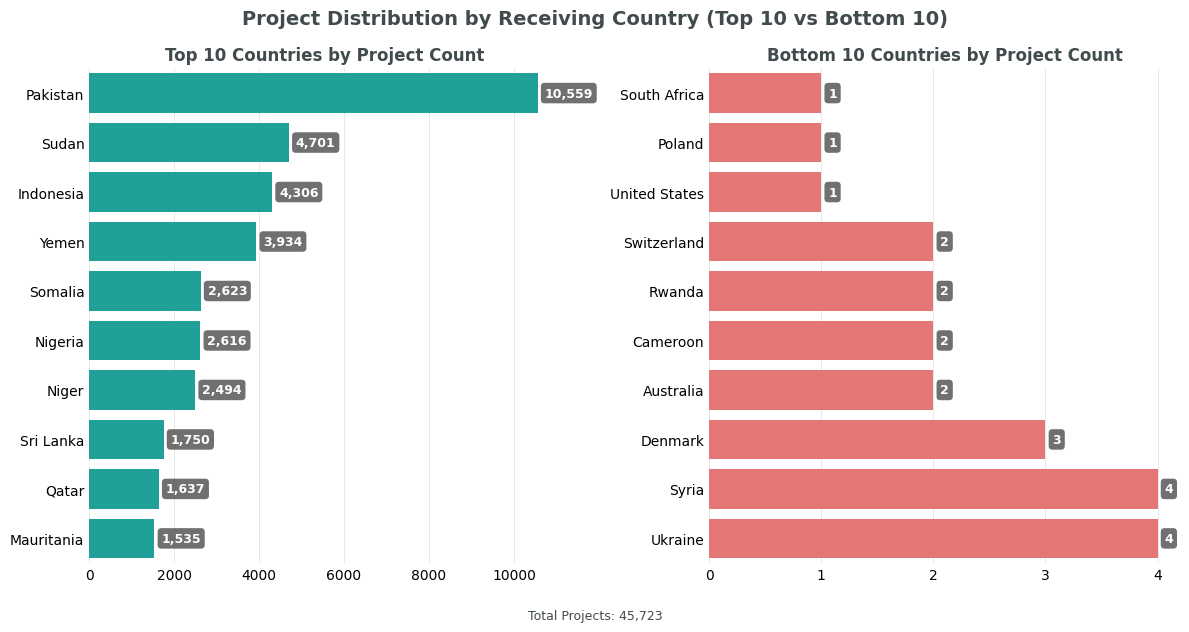

In [84]:
# --- Figure that will include 2 graphs ---
# Style
title_style = dict(color="#414a4c", fontsize=12, weight="bold")
label_style = dict(color="#414a4c", fontsize=10, weight="bold")

fig_title_style = dict(color="#414a4c", fontsize=14, weight="bold")

# Actual figure
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Project Distribution by Receiving Country (Top 10 vs Bottom 10)', **fig_title_style)
fig.text(0.5, -0.02, 
         f"Total Projects: {total_projects:,}", 
         ha='center', va='top', fontsize=9, color="#414a4c") # Footnote


# --- Top 10 ---
sns.barplot(data=top10_countries_by_count, x='project_count', y='country',
            ax=ax[0], color='#0bb5ab')
ax[0].set_title("Top 10 Countries by Project Count", **title_style)
ax[0].set_xlabel("", **label_style)
ax[0].set_ylabel("", **label_style)

# Labels inside Top 10
for container in ax[0].containers:
    labels = [f"{int(v):,}" for v in container.datavalues]
    texts = ax[0].bar_label(container, labels=labels, label_type="edge",
                            color="white", fontsize=9, weight="bold", padding=5)
    for txt in texts:
        txt.set_bbox(dict(boxstyle="round,pad=0.3",
                          facecolor="#333333", edgecolor="none", alpha=0.7)) # dark grey background

# --- Bottom 10 ---
sns.barplot(data=bottom10_countries_by_count, x='project_count', y='country',
            ax=ax[1], color='#f66564')
ax[1].xaxis.set_major_locator(MultipleLocator(1)) # Make it go 1 by 1, instead of 0.5, 1, 1.5, ...
ax[1].set_title("Bottom 10 Countries by Project Count", **title_style)
ax[1].set_xlabel("", **label_style)
ax[1].set_ylabel("", **label_style)

# Labels inside Bottom 10
for container in ax[1].containers:
    labels = [f"{int(v):,}" for v in container.datavalues]
    texts = ax[1].bar_label(container, labels=labels, label_type="edge",
                            color="white", fontsize=9, weight="bold", padding=5)
    for txt in texts:
        txt.set_bbox(dict(boxstyle="round,pad=0.3",
                          facecolor="#333333", edgecolor="none", alpha=0.7)) # dark grey background
        

# --- Edge cleaning and styling ---
for axis in ax:

    # Remove the spine
    for spine in ["top", "right", "left", "bottom"]:
        axis.spines[spine].set_visible(False)

    # Remove the ticks
    axis.tick_params(axis='x', length=0)
    axis.tick_params(axis='y', length=0)

    axis.grid(axis="x", color="#c0cbcb", linewidth=0.5, alpha=0.6) # Soft grey grid
    axis.set_axisbelow(True)

plt.tight_layout()
plt.show();


In [85]:
# Pareto chart to visualize the top countries that represent the 80% of the projects
total = projects_by_country['project_count'].sum() # Sum of projects
projects_by_country['cum_pct'] = projects_by_country['project_count'].cumsum() / total * 100 # Cum. sum of the % of projects. They were already in order in projects_by_country

# Getting to the countries that amount the 80% of projects
cut_idx = (projects_by_country['cum_pct'] <= 80).sum() # Last country inside of the 80%

if cut_idx < len(projects_by_country) and projects_by_country.iloc[cut_idx]['cum_pct'] > 80 and cut_idx == (projects_by_country['cum_pct'] < 80).sum():
    cut_idx += 1 # Include the first country higher than 80%, because we need to count it to actually get the 80%. 

# Separating the countries because I will add all of the 20% together because I have too many countries and the graph would not be clear
top_80 = projects_by_country.iloc[:cut_idx].copy() # 80%

others = projects_by_country.iloc[cut_idx:].copy() # 20%
others_count = others['project_count'].sum()
others_countries = others['country'].tolist()

# DataFrame specific to the Paretto Chart
plot_df = pd.concat([
    top_80[['country','project_count']], # 80% of separate countries. Without the cumm. sum.
    pd.DataFrame([{'country': 'Others', 'project_count': others_count}]) # The rest 20% together as one
], ignore_index=True)

# I need to recalculate the cumm. sum of the percentage, because I grouped the 20% together
plot_df['cum_pct'] = plot_df['project_count'].cumsum() / plot_df['project_count'].sum() * 100


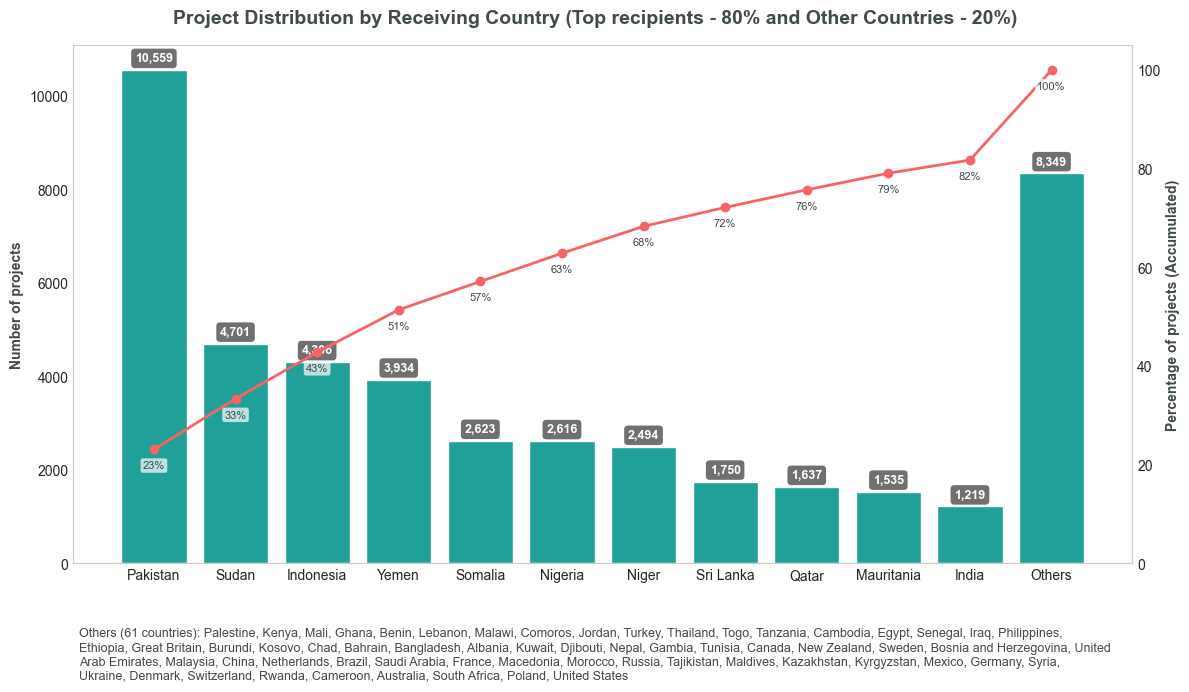

In [86]:
# --- Figure that actually includes the Paretto Chart ---
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Style
fig.suptitle("Project Distribution by Receiving Country (Top recipients - 80% and Other Countries - 20%)", fontsize=14, fontweight="bold", color="#414a4c")
# Note that includes the names of the countries that represent the 20%
others_note = "Others ({} countries): {}".format(
    len(others_countries),
    ", ".join(others_countries)
)
wrapped_note = fill(others_note, width=180) # Limit of 180 characters for each line
fig.text(
    0.07, -0.05,
    wrapped_note,
    ha='left', va='top',
    fontsize=9, color="#414a4c"
)

# --- Main Y Axis: Bar chart with the amounts of projects ---
bar = sns.barplot(
    data=plot_df,
    x='country', y='project_count',
    color='#0bb5ab', ax=ax1
)
ax1.set_ylabel("Number of projects", fontsize=10, fontweight="bold", color="#414a4c")
ax1.set_xlabel("")  # No title for the labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, ha='center')
ax1.tick_params(axis='x', length=0)
ax1.tick_params(axis='y', length=0)
ax1.grid(False)  # No grid for the Main X Axis


# No spines
for s in ["top","right","left","bottom"]:
    ax1.spines[s].set_visible(False)

# Same format for the labels as the other graph
for c in ax1.containers:
    labels = [f"{int(v):,}" for v in c.datavalues]
    texts = ax1.bar_label(c, labels=labels, label_type="edge",
                          color="white", fontsize=9, weight="bold", padding=4)
    for txt in texts:
        txt.set_bbox(dict(boxstyle="round,pad=0.3",
                          facecolor="#333333", edgecolor="none", alpha=0.7))

# --- Secondary Y Axis: Line Chart for the Percentages ---
ax2 = ax1.twinx()
ax2.plot(
    plot_df['country'],
    plot_df['cum_pct'],
    color="#f66564", marker="o", linewidth=2
)
ax2.set_ylabel("Percentage of projects (Accumulated)", fontsize=10, fontweight="bold", color="#414a4c")
ax2.set_ylim(0, 105)
ax2.tick_params(axis='y', length=0)
ax2.grid(False)  # No grid for the Secondary X Axis

# Labels for the Secondary Y Axis
x_coords = np.arange(len(plot_df))
for x, y in zip(x_coords, plot_df['cum_pct']):
    ax2.annotate(
        f"{y:.0f}%",                 # 0 decimals
        (x, y),                      # X, Y Coordinate
        xytext=(0, -8),               # Little Offset
        textcoords="offset points",
        ha="center", va="top",
        fontsize=8, color="#414a4c",
        bbox=dict(
            boxstyle="round,pad=0.2",
            facecolor="white",       # fondo claro para no competir con la línea
            edgecolor="none",
            alpha=0.7
        )
    )


plt.tight_layout()
plt.show();

In [87]:
# Project distribution: By Project_type

# Where were the most / the least of the projects executed? 
projects_by_type = (
    df.groupby("project_type")
      .size()
      .reset_index(name="project_count")
      .sort_values(by="project_count", ascending=False)
)

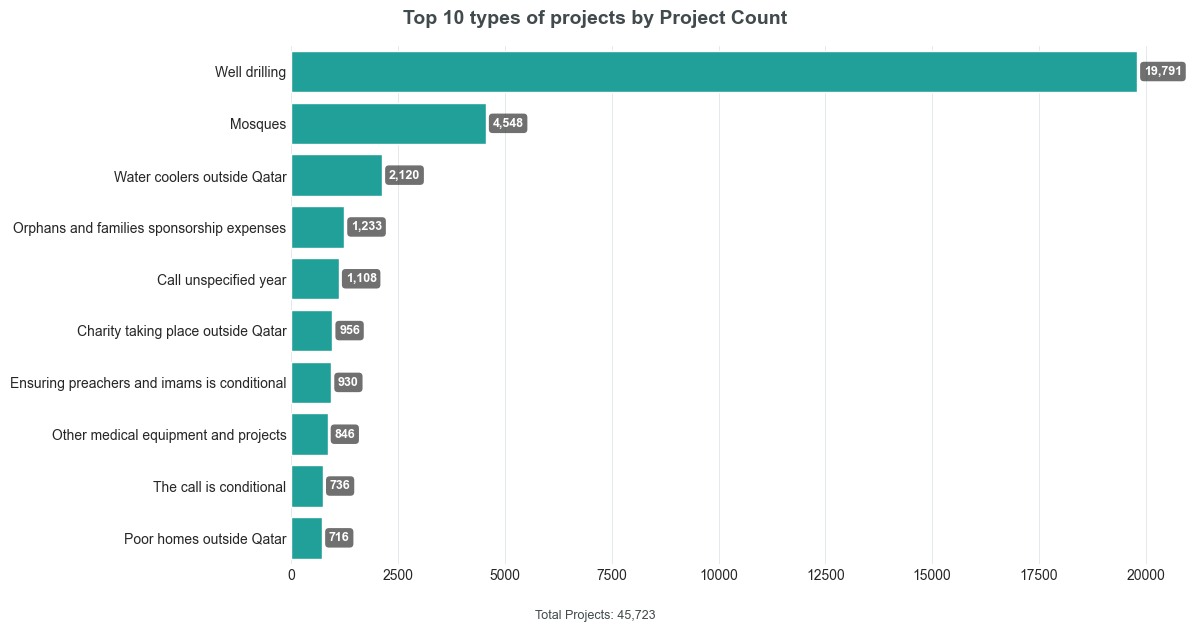

In [88]:
# --- Bar chart: Top 10 types of projects ---
top10_by_count_types = projects_by_type.head(10)

# --- Style ---
title_style = dict(color="#414a4c", fontsize=12, weight="bold")
label_style = dict(color="#414a4c", fontsize=10, weight="bold")
fig_title_style = dict(color="#414a4c", fontsize=14, weight="bold")

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Top 10 types of projects by Project Count', **fig_title_style)
fig.text(0.5, -0.02, f"Total Projects: {len(df):,}",
         ha='center', va='top', fontsize=9, color="#414a4c")

# --- Barplot---
sns.barplot(data=top10_by_count_types, x='project_count', y='project_type',
            ax=ax, color='#0bb5ab')

ax.set_xlabel("", **label_style)
ax.set_ylabel("", **label_style)

# Labels
for container in ax.containers:
    labels = [f"{int(v):,}" for v in container.datavalues]
    texts = ax.bar_label(container, labels=labels, label_type="edge",
                         color="white", fontsize=9, weight="bold", padding=5)
    for txt in texts:
        txt.set_bbox(dict(boxstyle="round,pad=0.3",
                          facecolor="#333333", edgecolor="none", alpha=0.7))

# --- Edge cleaning, styling and ticks ---
for axis in [ax]:
    for spine in ["top", "right", "left", "bottom"]:
        axis.spines[spine].set_visible(False)
    axis.tick_params(axis='x', length=0)
    axis.tick_params(axis='y', length=0)
    axis.grid(axis="x", color="#c0cbcb", linewidth=0.5, alpha=0.6)
    axis.set_axisbelow(True)

plt.tight_layout()
plt.show()


In [89]:
# At first glance, some of the types seem to be translated literally, in this kind of situations I would go with a subject-matter expert.
# But because this is a personal project, I will fo into the original source and used a translator to translate them from Arabic.

familiar_term_replacements_type = {
    'Call unspecified year': 'Religious advocacy (unspecified year)',
    'Ensuring preachers and imams is conditional': 'Conditional sponsorship of preachers and imams',
    'The call is conditional': 'Conditional support for religious advocacy',
    }

df['project_type'].replace(familiar_term_replacements_type, regex=True, inplace=True)



In [90]:
projects_by_type = (
    df.groupby("project_type")
      .size()
      .reset_index(name="project_count")
      .sort_values(by="project_count", ascending=False)
)

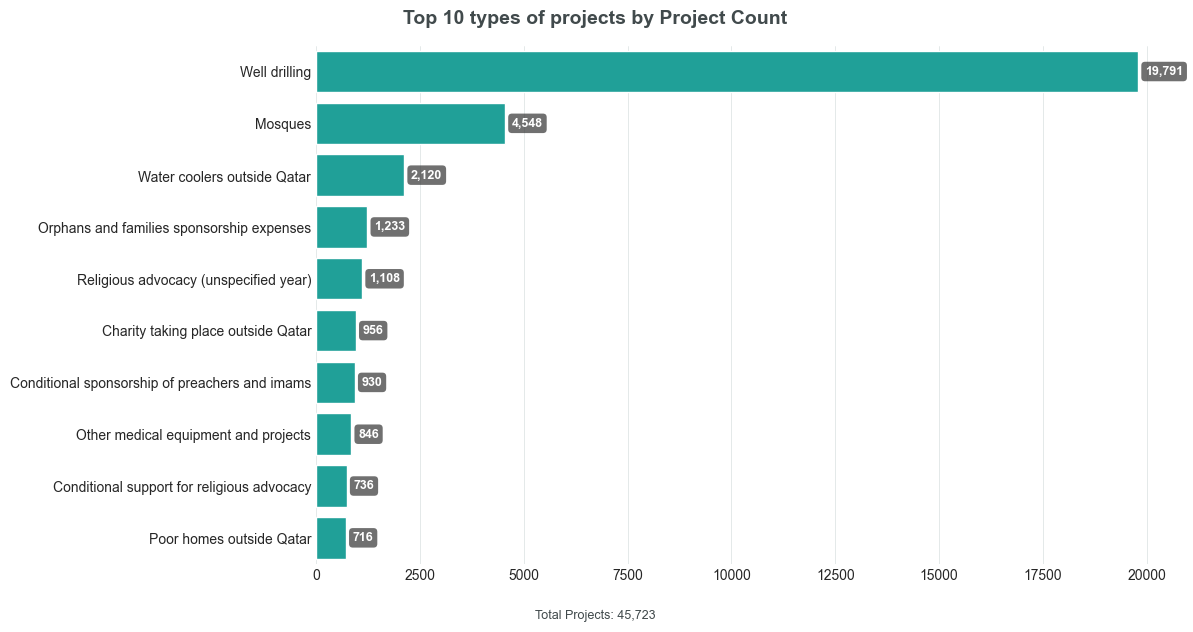

In [91]:
# --- Bar chart: Top 10 types of projects ---
top10_by_count_types = projects_by_type.head(10)

# --- Style ---
title_style = dict(color="#414a4c", fontsize=12, weight="bold")
label_style = dict(color="#414a4c", fontsize=10, weight="bold")
fig_title_style = dict(color="#414a4c", fontsize=14, weight="bold")

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.suptitle('Top 10 types of projects by Project Count', **fig_title_style)
fig.text(0.5, -0.02, f"Total Projects: {len(df):,}",
         ha='center', va='top', fontsize=9, color="#414a4c")

# --- Barplot---
sns.barplot(data=top10_by_count_types, x='project_count', y='project_type',
            ax=ax, color='#0bb5ab')

ax.set_xlabel("", **label_style)
ax.set_ylabel("", **label_style)

# Labels
for container in ax.containers:
    labels = [f"{int(v):,}" for v in container.datavalues]
    texts = ax.bar_label(container, labels=labels, label_type="edge",
                         color="white", fontsize=9, weight="bold", padding=5)
    for txt in texts:
        txt.set_bbox(dict(boxstyle="round,pad=0.3",
                          facecolor="#333333", edgecolor="none", alpha=0.7))

# --- Edge cleaning, styling and ticks ---
for axis in [ax]:
    for spine in ["top", "right", "left", "bottom"]:
        axis.spines[spine].set_visible(False)
    axis.tick_params(axis='x', length=0)
    axis.tick_params(axis='y', length=0)
    axis.grid(axis="x", color="#c0cbcb", linewidth=0.5, alpha=0.6)
    axis.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [92]:
# Projects distribution: By time

# What is the time period for this dataset? 
earliest_date = df['year_month'].min()
latest_date = df['year_month'].max()

print(f"The projects range from {earliest_date.strftime('%B %Y')} to {latest_date.strftime('%B %Y')}")


The projects range from January 2004 to September 2019


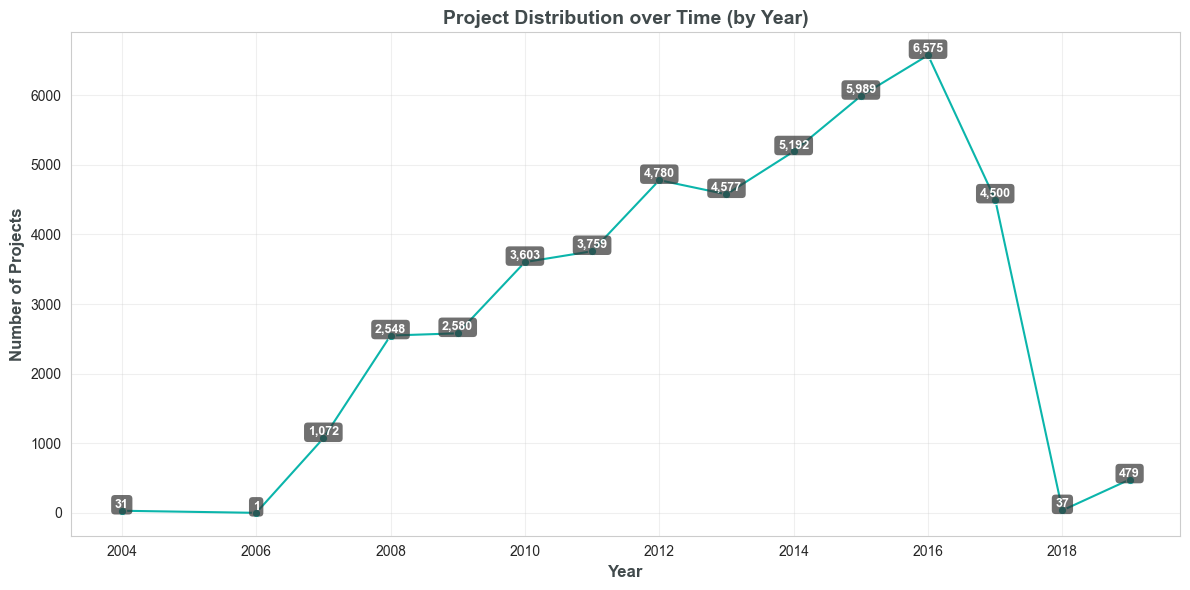

In [93]:
# --- Projects by Year ---
projects_by_year = (
    df.groupby('start_year')
      .size()
      .reset_index(name='project_count')
      .sort_values('start_year')
)


    # --- Time series visualization (by Year) ---
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=projects_by_year, x='start_year', y='project_count',
             marker='o', color='#0bb5ab', ax=ax)

ax.set_title("Project Distribution over Time (by Year)", 
             fontsize=14, fontweight="bold", color="#414a4c")
ax.set_xlabel("Year", fontsize=12, fontweight="bold", color="#414a4c")
ax.set_ylabel("Number of Projects", fontsize=12, fontweight="bold", color="#414a4c")

# --- Labels above each point ---
for x, y in zip(projects_by_year['start_year'], projects_by_year['project_count']):
    txt = ax.text(
        x, y, f"{int(y):,}",   # formato con separador de miles
        ha="center", va="bottom", fontsize=9, weight="bold", color="white"
    )
    txt.set_bbox(dict(
        boxstyle="round,pad=0.3",
        facecolor="#333333", edgecolor="none", alpha=0.7  # igual que en las barras
    ))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show();


In [94]:
# The greatest insight from the graph is that the number of projects increased steadily over the years, peaking in 2016, before declining dramatically in subsequent years.

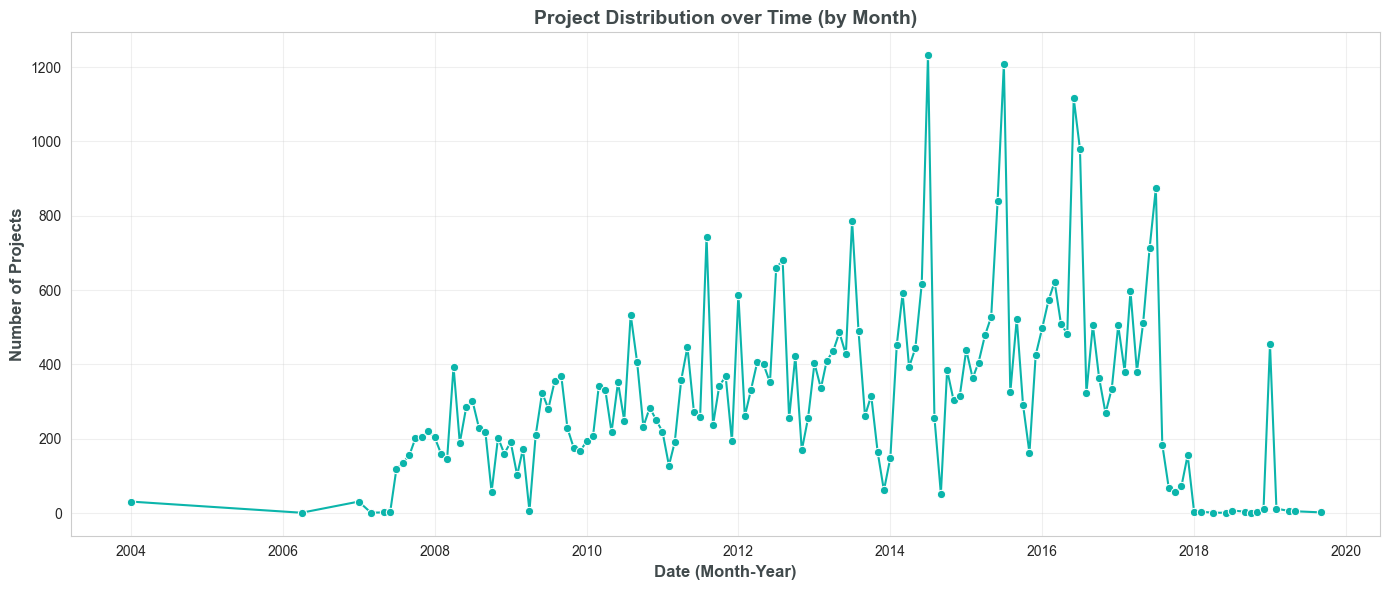

In [95]:
# --- Projects by Month ---
projects_by_month = (
    df.groupby('year_month')           # Group by year_month
      .size()
      .reset_index(name='project_count')
      .sort_values('year_month')
)

# Convert 'year_month' to timestamp to be able to graph it
projects_by_month['year_month'] = projects_by_month['year_month'].dt.to_timestamp()

# --- Time series visualization (by Month/Year) ---
fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(
    data=projects_by_month, 
    x='year_month', 
    y='project_count',
    marker='o', 
    color='#0bb5ab', 
    ax=ax
)

ax.set_title("Project Distribution over Time (by Month)", 
             fontsize=14, fontweight="bold", color="#414a4c")
ax.set_xlabel("Date (Month-Year)", fontsize=12, fontweight="bold", color="#414a4c")
ax.set_ylabel("Number of Projects", fontsize=12, fontweight="bold", color="#414a4c")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show();


In [96]:
"""
After seeing the data points by Month-Year, it is evident that there is a cyclical behavior, with recurring rises and falls each year.

This suggests seasonality or periodic patterns in the distribution of projects, which gives potential for predicting donations with a Machine Learning Model
"""

'\nAfter seeing the data points by Month-Year, it is evident that there is a cyclical behavior, with recurring rises and falls each year.\n\nThis suggests seasonality or periodic patterns in the distribution of projects, which gives potential for predicting donations with a Machine Learning Model\n'

In [97]:
# To verify this, I will group the amount of projects by the month
projects_by_month_name = (
    df.groupby("start_month_name")
      .size()
      .reset_index(name="project_count")
      .sort_values("project_count", ascending=False)
)

print(projects_by_month_name)


   start_month_name  project_count
5              July           6957
6              June           5302
1            August           4258
8               May           3922
4           January           3908
7             March           3808
0             April           3700
11        September           3059
3          February           2981
10          October           2900
2          December           2551
9          November           2377


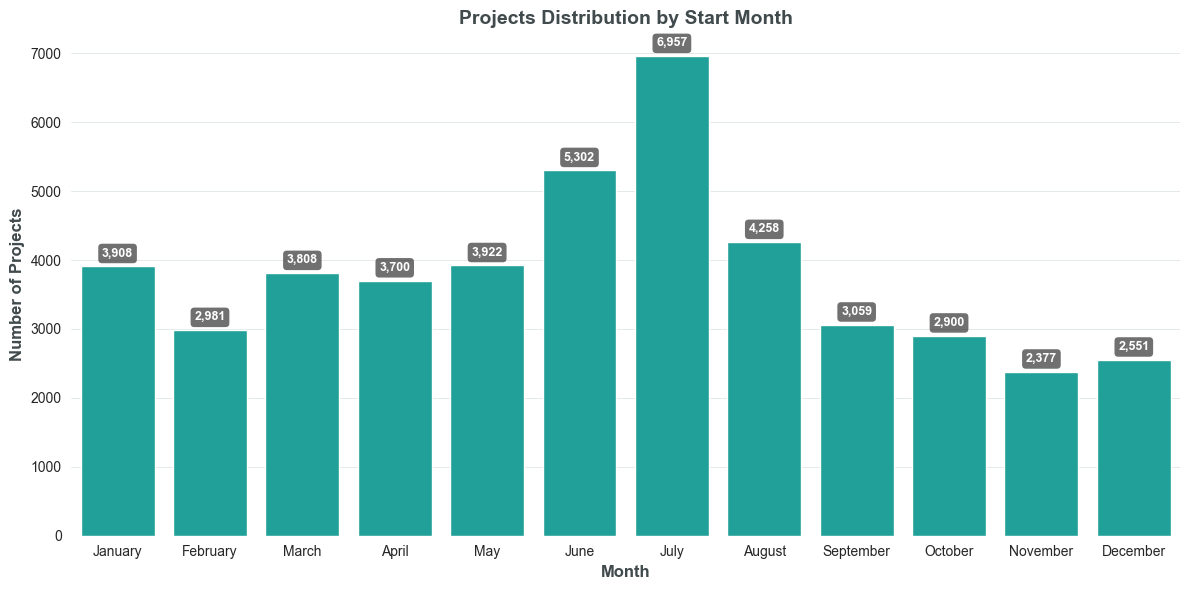

In [98]:
# Visualization of projects by Month

# --- Calendar order, instead of from higher to lower ---
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

projects_by_month_name = (
    df.groupby("start_month_name")
      .size()
      .reindex(month_order)   # Calendar order
      .reset_index(name="project_count")
      .rename(columns={"index": "start_month_name"})
)

# --- Bar Plot ---
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(
    data=projects_by_month_name, 
    x="start_month_name", 
    y="project_count", 
    color="#0bb5ab", 
    order=month_order,
    ax=ax
)

ax.set_title("Projects Distribution by Start Month", fontsize=14, fontweight="bold", color="#414a4c")
ax.set_xlabel("Month", fontsize=12, fontweight="bold", color="#414a4c")
ax.set_ylabel("Number of Projects", fontsize=12, fontweight="bold", color="#414a4c")

# --- Labels inside bars ---
for container in ax.containers:
    labels = [f"{int(v):,}" for v in container.datavalues]
    texts = ax.bar_label(
        container, labels=labels, label_type="edge",
        color="white", fontsize=9, weight="bold", padding=5
    )
    for txt in texts:
        txt.set_bbox(dict(
            boxstyle="round,pad=0.3",
            facecolor="#333333", edgecolor="none", alpha=0.7
        ))

# --- Grid Styling ---
ax.grid(axis="y", color="#c0cbcb", linewidth=0.5, alpha=0.6)
ax.set_axisbelow(True)

# --- No spines ---
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)


plt.tight_layout()
plt.show()





In [99]:
"""
The months of June and July seem to attract the most projects. Most of the projects from the database come and go to Muslim Countries.
Upon a quick research, I found out that they coincide with the start of Ramadan from most of the years of the database [3]

This becomes relevant, because for muslims, Ramadan is a period dedicated to spiritual purification, prayer and charitable giving [4]--
Which naturally drives an increase in donations.

It would be interesting to compare this trend to donations of christian countries, where we could likely see an increase in donations end of the year (november-december)
due to Christmas and campaigns such as Giving Tuesday [5].

[3] Chamberlain, L. (2025). Infoplease. http://infoplease.com/calendars/holidays/islamic-holidays

[4] FAQ’s about Ramadan. (2025). Why Islam. https://www.whyislam.org/faqs-about-ramadan/?gad_source=1&gad_campaignid=8704312237&gbraid=0AAAAADNJvn4n_Oib38TwZZgW44yUM_2MR&gclid=Cj0KCQjw_L_FBhDmARIsAItqgt7sQ7FfPPXXHb9GlWkU3Dp4bcxa4Jq5_JsF9nfi2XcK7SnGdtOmIBkaAswPEALw_wcB

[5] GET READY FOR GIVINGTUESDAY. (2025). Giving Tuesday. https://www.givingtuesday.org/participate/

"""


'\nThe months of June and July seem to attract the most projects. Most of the projects from the database come and go to Muslim Countries.\nUpon a quick research, I found out that they coincide with the start of Ramadan from most of the years of the database [3]\n\nThis becomes relevant, because for muslims, Ramadan is a period dedicated to spiritual purification, prayer and charitable giving [4]--\nWhich naturally drives an increase in donations.\n\nIt would be interesting to compare this trend to donations of christian countries, where we could likely see an increase in donations end of the year (november-december)\ndue to Christmas and campaigns such as Giving Tuesday [5].\n\n[3] Chamberlain, L. (2025). Infoplease. http://infoplease.com/calendars/holidays/islamic-holidays\n\n[4] FAQ’s about Ramadan. (2025). Why Islam. https://www.whyislam.org/faqs-about-ramadan/?gad_source=1&gad_campaignid=8704312237&gbraid=0AAAAADNJvn4n_Oib38TwZZgW44yUM_2MR&gclid=Cj0KCQjw_L_FBhDmARIsAItqgt7sQ7FfPPXX

### Cost Exploration

In [100]:
# Cost distribution: By Country

# How much money was donated globally?
total_cost = df['total_cost_usd'].sum()
print(f'The total amount of US dollars received through donations is: {total_cost:,.2f}')




The total amount of US dollars received through donations is: 756,029,284.42


In [101]:
# Which are the countries that received the most / the least USD? 
projects_by_cost = (
    df.groupby("country")["total_cost_usd"]
      .sum()
      .reset_index()
      .sort_values(by="total_cost_usd", ascending=False)
)

projects_by_cost 

,country,total_cost_usd
47,Palestine,8.577263e+07
58,Sudan,7.918467e+07
71,Yemen,6.646754e+07
67,Turkey,5.408948e+07
55,Somalia,5.132142e+07
...,...,...
49,Poland,4.867275e+04
31,Kyrgyzstan,4.626392e+04
36,Maldives,4.513897e+04
27,Kazakhstan,1.945310e+04


In [102]:
# It is retrieving large numbers in scientific notation, so I will set it in a more understandable way
pd.set_option("display.float_format", "{:,.2f}".format)
projects_by_cost 

,country,total_cost_usd
47,Palestine,"85,772,632.42"
58,Sudan,"79,184,668.69"
71,Yemen,"66,467,540.59"
67,Turkey,"54,089,478.74"
55,Somalia,"51,321,416.24"
...,...,...
49,Poland,"48,672.75"
31,Kyrgyzstan,"46,263.92"
36,Maldives,"45,138.97"
27,Kazakhstan,"19,453.10"


In [103]:
# It seems that the countries with the least amount of projects are tied.
# To have a better understanding of the data, I will retrieve the top and bottom 10 of the countries by count of projects.

# Top 10
top10_countries_by_cost = projects_by_cost.head(10)

# Bottom 10
bottom10_countries_by_cost = projects_by_cost .tail(10).sort_values(by="total_cost_usd", ascending=True)

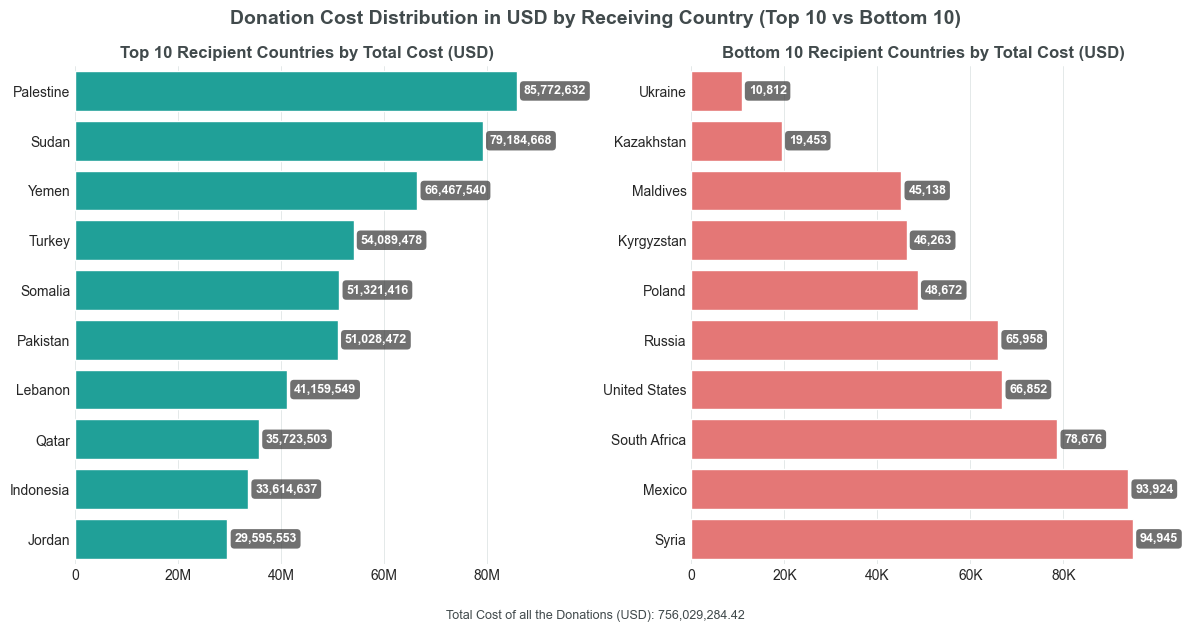

In [104]:
# --- Figure that will include 2 graphs ---
# Style
title_style = dict(color="#414a4c", fontsize=12, weight="bold")
label_style = dict(color="#414a4c", fontsize=10, weight="bold")
fig_title_style = dict(color="#414a4c", fontsize=14, weight="bold")

# Actual figure
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Donation Cost Distribution in USD by Receiving Country (Top 10 vs Bottom 10)', **fig_title_style)
fig.text(0.5, -0.02, 
         f"Total Cost of all the Donations (USD): {total_cost:,.2f}", 
         ha='center', va='top', fontsize=9, color="#414a4c") # Footnote


# --- Top 10 ---
sns.barplot(data=top10_countries_by_cost, x='total_cost_usd', y='country',
            ax=ax[0], color='#0bb5ab')
ax[0].set_title("Top 10 Recipient Countries by Total Cost (USD)", **title_style)
ax[0].set_xlabel("", **label_style)
ax[0].set_ylabel("", **label_style)

# Labels inside Top 10
for container in ax[0].containers:
    labels = [f"{int(v):,}" for v in container.datavalues]
    texts = ax[0].bar_label(container, labels=labels, label_type="edge",
                            color="white", fontsize=9, weight="bold", padding=5)
    for txt in texts:
        txt.set_bbox(dict(boxstyle="round,pad=0.3",
                          facecolor="#333333", edgecolor="none", alpha=0.7)) # dark grey background

# --- Bottom 10 ---
sns.barplot(data=bottom10_countries_by_cost, x='total_cost_usd', y='country',
            ax=ax[1], color='#f66564')
ax[1].set_title("Bottom 10 Recipient Countries by Total Cost (USD)", **title_style)
ax[1].set_xlabel("", **label_style)
ax[1].set_ylabel("", **label_style)

# Labels inside Bottom 10
for container in ax[1].containers:
    labels = [f"{int(v):,}" for v in container.datavalues]
    texts = ax[1].bar_label(container, labels=labels, label_type="edge",
                            color="white", fontsize=9, weight="bold", padding=5)
    for txt in texts:
        txt.set_bbox(dict(boxstyle="round,pad=0.3",
                          facecolor="#333333", edgecolor="none", alpha=0.7)) # dark grey background
        
# Shortened Format for the Axis
def shortened_format(x, pos):
    if x >= 1_000_000_000:
        return f"{x/1_000_000_000:.0f}B"
    elif x >= 1_000_000:
        return f"{x/1_000_000:.0f}M"
    elif x >= 1_000:
        return f"{x/1_000:.0f}K"
    else:
        return f"{x:.0f}"

# --- Edge cleaning and styling ---
for axis in ax:

    # No scientific notation
    axis.xaxis.set_major_formatter(FuncFormatter(shortened_format))

    # Remove the spine
    for spine in ["top", "right", "left", "bottom"]:
        axis.spines[spine].set_visible(False)

    # Remove the ticks
    axis.tick_params(axis='x', length=0)
    axis.tick_params(axis='y', length=0)

    axis.grid(axis="x", color="#c0cbcb", linewidth=0.5, alpha=0.6) # Soft grey grid
    axis.set_axisbelow(True)

plt.tight_layout()
plt.show();

In [105]:
# Pareto chart to visualize the top countries that represent the 80% of the cost of projects
total_usd = projects_by_cost['total_cost_usd'].sum() # Sum of the cost of th projects
projects_by_cost['cum_pct_total_cost_usd'] = projects_by_cost['total_cost_usd'].cumsum() / total_usd * 100 # Cum. sum of the % of the cost of projects

# Getting to the countries that amount the 80% of projects
cut_idx_cost = (projects_by_cost['cum_pct_total_cost_usd'] <= 80).sum() # Last country inside of the 80%

if cut_idx_cost < len(projects_by_cost) and projects_by_cost.iloc[cut_idx_cost]['cum_pct_total_cost_usd'] > 80 and cut_idx_cost == (projects_by_cost['cum_pct_total_cost_usd'] < 80).sum():
    cut_idx_cost += 1 # Include the first country higher than 80%, because we need to count it to actually get the 80%. 

# Separating the countries because I will add all of the 20% together because I have too many countries and the graph would not be clear
top_80_cost = projects_by_cost.iloc[:cut_idx_cost].copy() # 80%

others_cost = projects_by_cost.iloc[cut_idx_cost:].copy() # 20%
others_cost_sum = others_cost['total_cost_usd'].sum()
others_countries_cost_sum = others_cost['country'].tolist()

# DataFrame specific to the Paretto Chart
plot_df_cost = pd.concat([
    top_80_cost[['country','total_cost_usd']], # 80% of separate countries. Without the cumm. sum.
    pd.DataFrame([{'country': 'Others', 'total_cost_usd': others_cost_sum}]) # The rest 20% together as one
], ignore_index=True)

# I need to recalculate the cumm. sum of the percentage, because I grouped the 20% together
plot_df_cost['cum_pct_total_cost_usd'] = plot_df_cost['total_cost_usd'].cumsum() / plot_df_cost['total_cost_usd'].sum() * 100

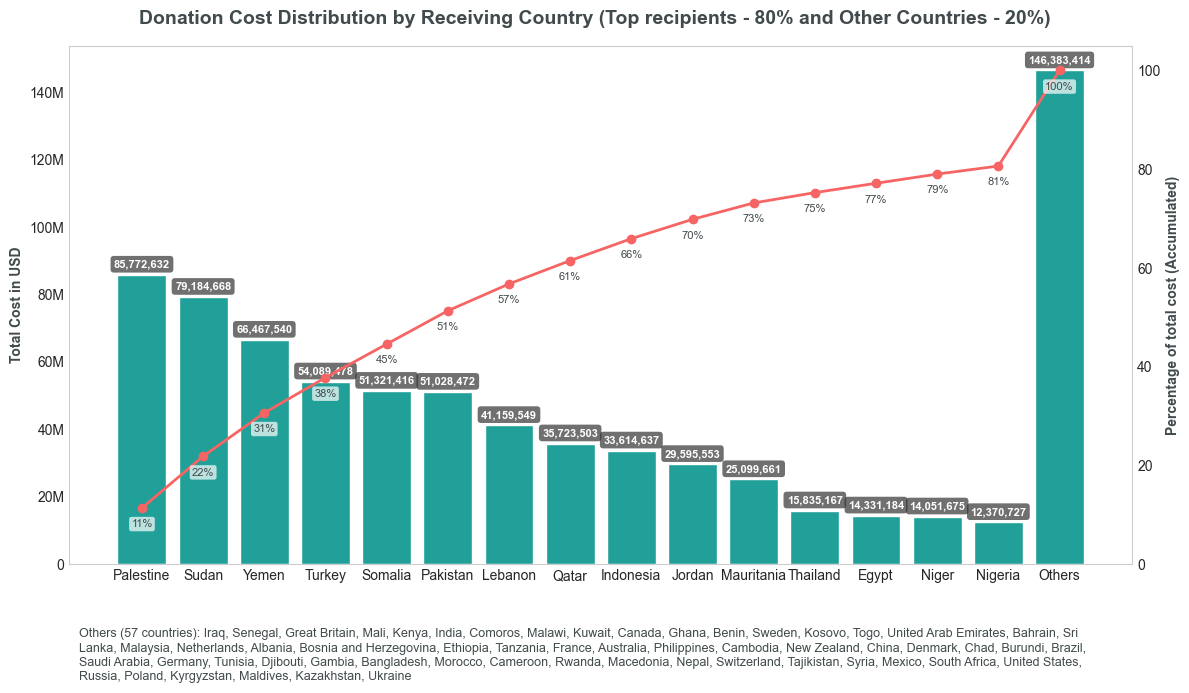

In [106]:
# --- Figure that actually includes the Paretto Chart ---
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

# Style
fig.suptitle("Donation Cost Distribution by Receiving Country (Top recipients - 80% and Other Countries - 20%)", fontsize=14, fontweight="bold", color="#414a4c")
# Note that includes the names of the countries that represent the 20%
others_note_cost_sum = "Others ({} countries): {}".format(
    len(others_countries_cost_sum),
    ", ".join(others_countries_cost_sum)
)
wrapped_note_cost_sum = fill(others_note_cost_sum, width=180) # Limit of 180 characters for each line
fig.text(
    0.07, -0.05,
    wrapped_note_cost_sum,
    ha='left', va='top',
    fontsize=9, color="#414a4c"
)

# Te quedaste aqui

# --- Main Y Axis: Bar chart with the total cost of projects ---
bar = sns.barplot(
    data=plot_df_cost,
    x='country', y='total_cost_usd',
    color='#0bb5ab', ax=ax1
)
ax1.set_ylabel("Total Cost in USD", fontsize=10, fontweight="bold", color="#414a4c")
ax1.set_xlabel("")  # No title for the labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, ha='center')
ax1.tick_params(axis='x', length=0)
ax1.tick_params(axis='y', length=0)
ax1.grid(False)  # No grid for the Main X Axis

# Reuse the format built previously
ax1.yaxis.set_major_formatter(FuncFormatter(shortened_format))


# No spines
for s in ["top","right","left","bottom"]:
    ax1.spines[s].set_visible(False)

# Same format for the labels as the other graph
for c in ax1.containers:
    labels = [f"{int(v):,}" for v in c.datavalues]
    texts = ax1.bar_label(c, labels=labels, label_type="edge",
                          color="white", fontsize=8, weight="bold", padding=4)
    for txt in texts:
        txt.set_bbox(dict(boxstyle="round,pad=0.3",
                          facecolor="#333333", edgecolor="none", alpha=0.7))

# --- Secondary Y Axis: Line Chart for the Percentages ---
ax2 = ax1.twinx()
ax2.plot(
    plot_df_cost['country'],
    plot_df_cost['cum_pct_total_cost_usd'],
    color="#f66564", marker="o", linewidth=2
)
ax2.set_ylabel("Percentage of total cost (Accumulated)", fontsize=10, fontweight="bold", color="#414a4c")
ax2.set_ylim(0, 105)
ax2.tick_params(axis='y', length=0)
ax2.grid(False)  # No grid for the Secondary X Axis

# Labels for the Secondary Y Axis
x_coords = np.arange(len(plot_df_cost))
for x, y in zip(x_coords, plot_df_cost['cum_pct_total_cost_usd']):
    ax2.annotate(
        f"{y:.0f}%",                 # 0 decimals
        (x, y),                      # X, Y Coordinate
        xytext=(0, -8),               # Little Offset
        textcoords="offset points",
        ha="center", va="top",
        fontsize=8, color="#414a4c",
        bbox=dict(
            boxstyle="round,pad=0.2",
            facecolor="white",       # fondo claro para no competir con la línea
            edgecolor="none",
            alpha=0.7
        )
    )


plt.tight_layout()
plt.show();

In [107]:
# With the graph shown above, it is evident that the countries that receive the most projects, are not necessarily the ones that receive the most amount of USD

In [108]:
# Distribution of total cost
# What were the most expensive and the least expensive donations? 
min_cost = df['total_cost'].min()
max_cost = df['total_cost'].max()

print(f'The lowest donation is {min_cost:.2f} USD')
print(f'The highest donation is {max_cost:,.2f} USD')

The lowest donation is 10.00 USD
The highest donation is 51,027,549.00 USD


In [109]:
# Percentiles
df[['total_cost']].describe(
    percentiles=[i/10 for i in range(1,10)]
).T[['mean', 'std'] + [f"{int(i*100)}%" for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]]]


# At first glance, it could appear that the average cost of the projects is 61,998.20.
# However,there seems to be a significant amount of outliers. As seen by percentiles >80%

,mean,std,10%,20%,30%,40%,50%,60%,70%,80%,90%
total_cost,"61,998.20","406,339.75","1,000.00","2,000.00","3,050.00","4,400.00","6,000.00","8,800.00","16,288.00","48,035.00","100,000.00"


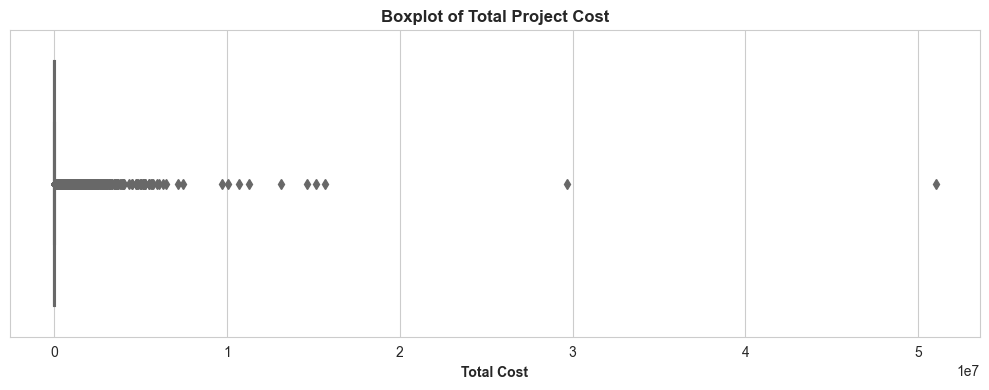

In [110]:
# Box plot of total_cost to confirm if there are outliers
plt.figure(figsize=(10,4))
sns.boxplot(x=df['total_cost'], color='#f66564')

plt.title("Boxplot of Total Project Cost", fontsize=12, fontweight="bold")
plt.xlabel("Total Cost", fontsize=10, fontweight="bold")
plt.tight_layout()
plt.show();



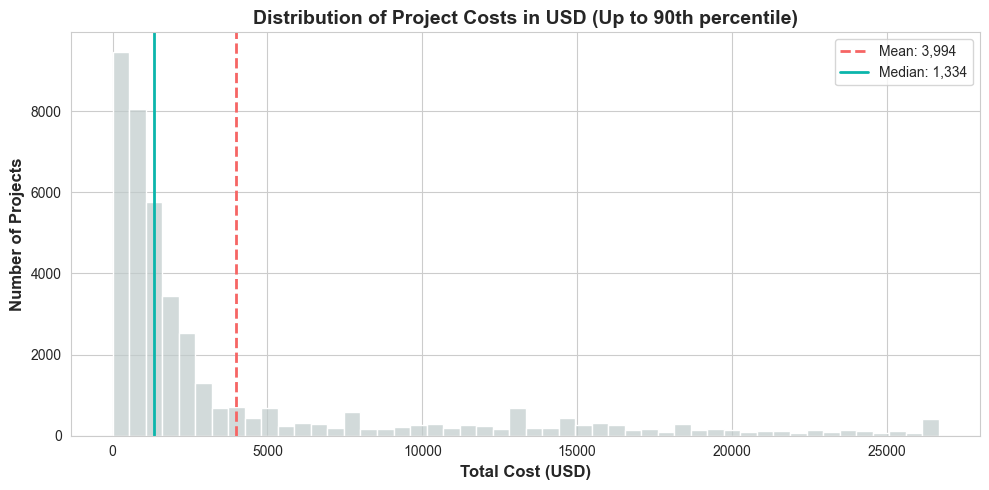

In [111]:
# Distribution of the Cost of the Projects without the top 10%, which is the most drastic of outliers
p90 = df['total_cost_usd'].quantile(0.90)

plt.figure(figsize=(10,5))
sns.histplot(df[df['total_cost_usd'] <= p90]['total_cost_usd'], bins=50, color="#c0cbcb", alpha=0.7)

mean_val = df[df['total_cost_usd'] <= p90]['total_cost_usd'].mean()
median_val = df[df['total_cost_usd'] <= p90]['total_cost_usd'].median()

plt.axvline(mean_val, color='#f66564', linestyle='--', linewidth=2, label=f"Mean: {mean_val:,.0f}")
plt.axvline(median_val, color='#0bb5ab', linestyle='-', linewidth=2, label=f"Median: {median_val:,.0f}")

plt.title("Distribution of Project Costs in USD (Up to 90th percentile)", fontsize=14, fontweight="bold")
plt.xlabel("Total Cost (USD)", fontsize=12, fontweight="bold")
plt.ylabel("Number of Projects", fontsize=12, fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show();


In [112]:
"""
The above graph shows that, excluding the top 10% most expensive projects the majority of projects are relatively low-cost, with 50% of them costing around 1,334 USD. 

However, even after removing the top 10%, the average project cost still remains 3,994 USD.
This suggests that a few projects are still significantly more expensive, reaching tens of thousands of dollars above the typical project.
"""

'\nThe above graph shows that, excluding the top 10% most expensive projects the majority of projects are relatively low-cost, with 50% of them costing around 1,334 USD. \n\nHowever, even after removing the top 10%, the average project cost still remains 3,994 USD.\nThis suggests that a few projects are still significantly more expensive, reaching tens of thousands of dollars above the typical project.\n'

In [113]:
# The above distribution leads to the question:
# Do more expensive projects lead to more beneficiaries?

# Making a copy of the df because there are projects with Non specified beneficiaries
# The copy will eliminate those rows
df_copy = df.copy()
df_copy = df_copy[df_copy['beneficiaries'] > 0].copy()

# Column of cost per beneficiary
df_copy['cost_per_beneficiary'] = df_copy['total_cost'] / df_copy['beneficiaries']


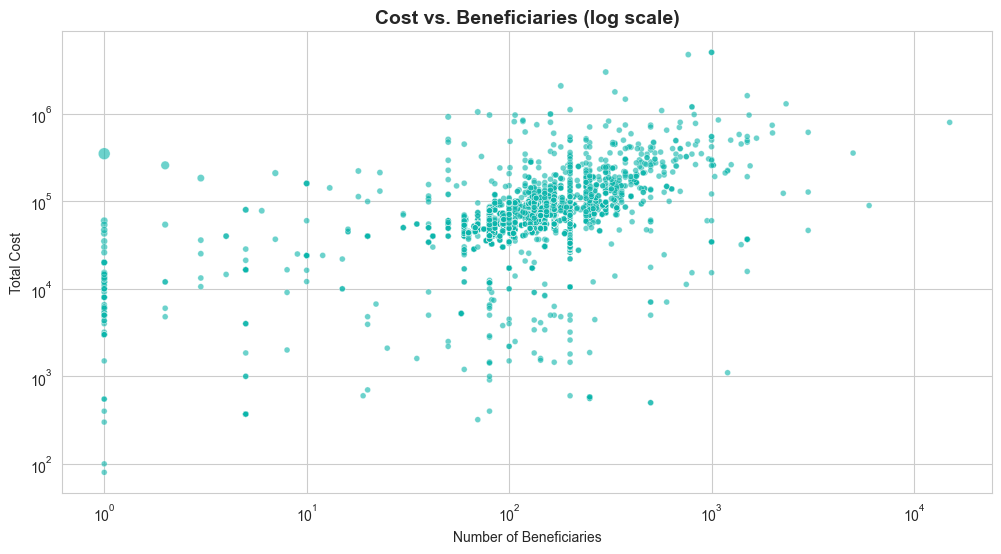

In [114]:
# Scatterplot
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_copy,
    x='beneficiaries',
    y='total_cost',
    size='cost_per_beneficiary',
    alpha=0.6,
    legend=False,
    color="#0bb5ab"
)


# Will use log scale because the data varies by magnitude, and I want to highlight relative patterns, rather than abosolute patterns.
plt.xscale('log')
plt.yscale('log')
plt.title("Cost vs. Beneficiaries (log scale)", fontsize=14, fontweight="bold")
plt.xlabel("Number of Beneficiaries")
plt.ylabel("Total Cost")
plt.show();

In [115]:
"""
By looking at the graph, it seems that:

There is a positive trend, where projects with more beneficiaries tend to have higher costs.

However this trend seems to be weak, as most of the points seem dispersed.
"""
# Checking the correlation between total cost and number of beneficiaries
corr_cost_beneficiaries = df_copy[['total_cost','beneficiaries']].corr().iloc[0,1]
print(f"Correlation between Total Cost and Beneficiaries: {corr_cost_beneficiaries:.2f}")



Correlation between Total Cost and Beneficiaries: 0.26


In [116]:
# A correlation of 0.26 is weak and positive, which confirms that the number of beneficiaries does not fully explain the project cost.

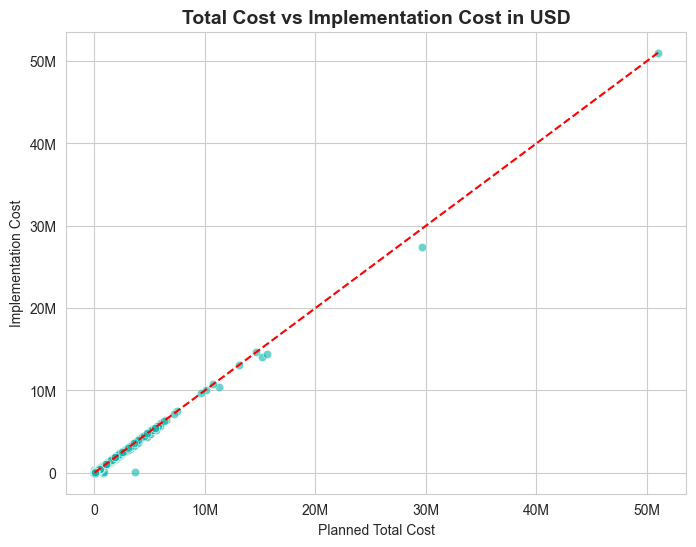

Correlation between Total and Implementation Costs: 0.9985


In [117]:
# Anoter interesting question is: Is the planned total price far from the implementation price?
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='total_cost', y='implementation_cost', alpha=0.6, color='#0bb5ab')
plt.plot([0, df['total_cost'].max()], [0, df['total_cost'].max()], 'r--')  # línea ideal (presupuesto = ejecución)
plt.title("Total Cost vs Implementation Cost in USD", fontsize=14, fontweight="bold")
plt.xlabel("Planned Total Cost")
plt.ylabel("Implementation Cost")

# Reuse the format function from before
ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(shortened_format))
ax.yaxis.set_major_formatter(FuncFormatter(shortened_format))


plt.show()

corr = df[['total_cost','implementation_cost']].corr().iloc[0,1]
print(f"Correlation between Total and Implementation Costs: {corr:.4f}");


In [118]:
# It seems that no, it is not that far. Most of the times the projects are executed with great fidelity to the estimated budgets.

In [119]:
# How does the cost of Donations vary over time? 
project_cost_by_year = (
    df.groupby('start_year')["total_cost_usd"]
      .sum()
      .reset_index()
      .sort_values(by="total_cost_usd", ascending=False)
)

project_cost_by_year

,start_year,total_cost_usd
11,2016,"117,370,842.80"
10,2015,"98,300,443.94"
12,2017,"84,897,370.71"
9,2014,"83,862,555.41"
8,2013,"82,224,460.24"
7,2012,"78,288,386.07"
6,2011,"58,562,029.06"
5,2010,"53,457,921.53"
3,2008,"38,515,500.50"
4,2009,"34,089,902.84"


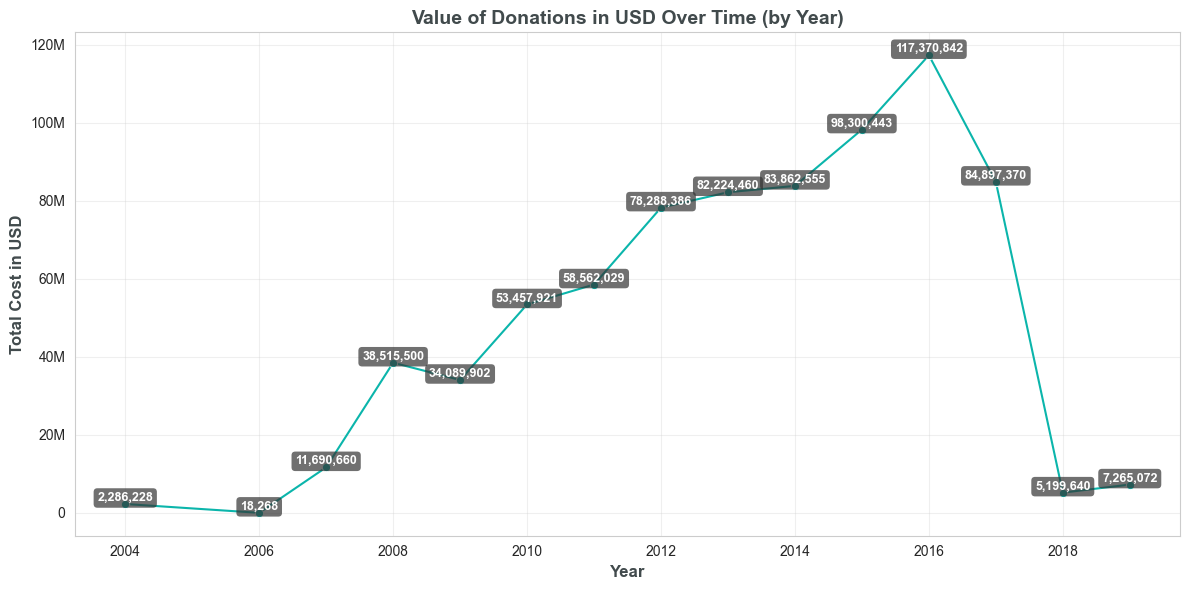

In [120]:
# --- Time series visualization (by Year) ---
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=project_cost_by_year, x='start_year', y='total_cost_usd',
             marker='o', color='#0bb5ab', ax=ax)

ax.set_title("Value of Donations in USD Over Time (by Year)", 
             fontsize=14, fontweight="bold", color="#414a4c")
ax.set_xlabel("Year", fontsize=12, fontweight="bold", color="#414a4c")
ax.set_ylabel("Total Cost in USD", fontsize=12, fontweight="bold", color="#414a4c")

# Reuse the format built previously
ax.yaxis.set_major_formatter(FuncFormatter(shortened_format))

# --- Labels above each point ---
for x, y in zip(project_cost_by_year['start_year'], project_cost_by_year['total_cost_usd']):
    txt = ax.text(
        x, y, f"{int(y):,}",   # formato con separador de miles
        ha="center", va="bottom", fontsize=9, weight="bold", color="white"
    )
    txt.set_bbox(dict(
        boxstyle="round,pad=0.3",
        facecolor="#333333", edgecolor="none", alpha=0.7  # igual que en las barras
    ))
    

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show();

In [121]:
# As with the Project Count, it seems that the cost of the donations increased steadily over the years, peaking in 2016, before declining in subsequent years.

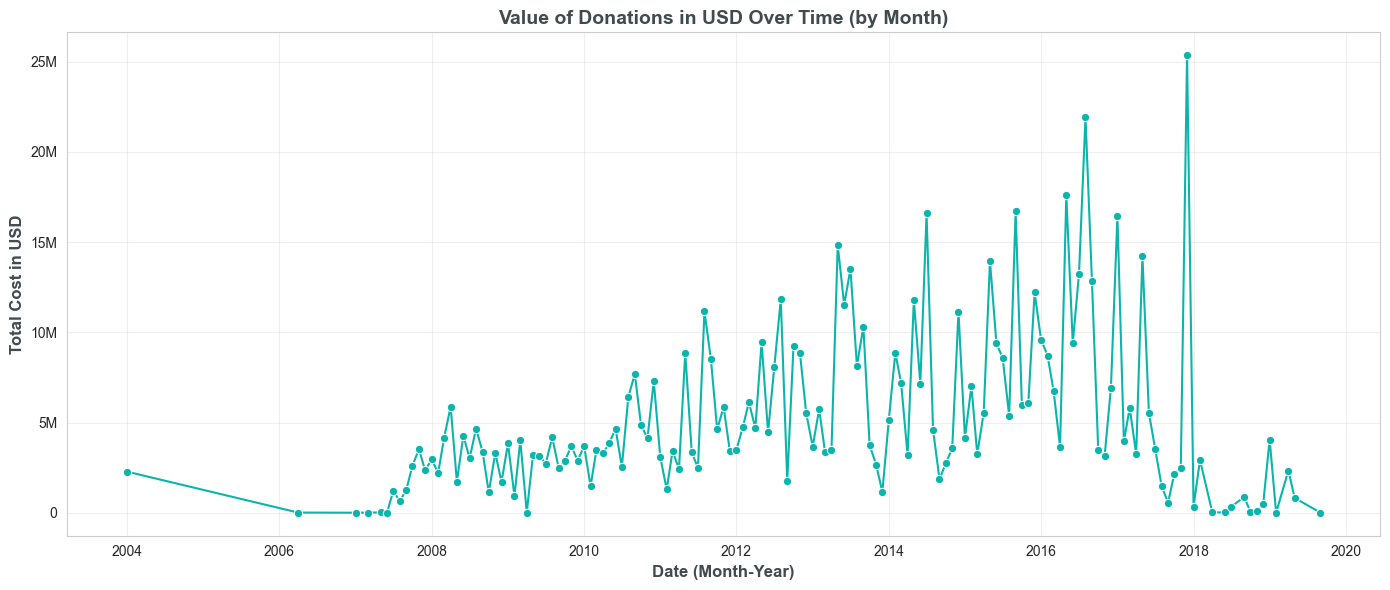

In [122]:
# --- Cost by Month ---
project_cost_by_month = (
    df.groupby('year_month')["total_cost_usd"]
      .sum()         # Group by year_month
      .reset_index(name='total_cost_usd')
      .sort_values('year_month')
)

# Convert 'year_month' to timestamp to be able to graph it
project_cost_by_month['year_month'] = project_cost_by_month['year_month'].dt.to_timestamp()

# --- Time series visualization (by Month/Year) ---
fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(
    data=project_cost_by_month, 
    x='year_month', 
    y='total_cost_usd',
    marker='o', 
    color='#0bb5ab', 
    ax=ax
)

"Value of Donations in USD Over Time (by Year)"

ax.set_title("Value of Donations in USD Over Time (by Month)", 
             fontsize=14, fontweight="bold", color="#414a4c")
ax.set_xlabel("Date (Month-Year)", fontsize=12, fontweight="bold", color="#414a4c")
ax.set_ylabel("Total Cost in USD", fontsize=12, fontweight="bold", color="#414a4c")

# Reuse the format built previously
ax.yaxis.set_major_formatter(FuncFormatter(shortened_format))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show();

In [123]:
# It is evident that as with the Project Count, there is a cyclical behavior in amount of donations in USD, with recurring rises and falls each year.
# The peaks could be related to the months when Ramadan and other islamic Holidays happen and people feel more compelled to donate to charity [4]

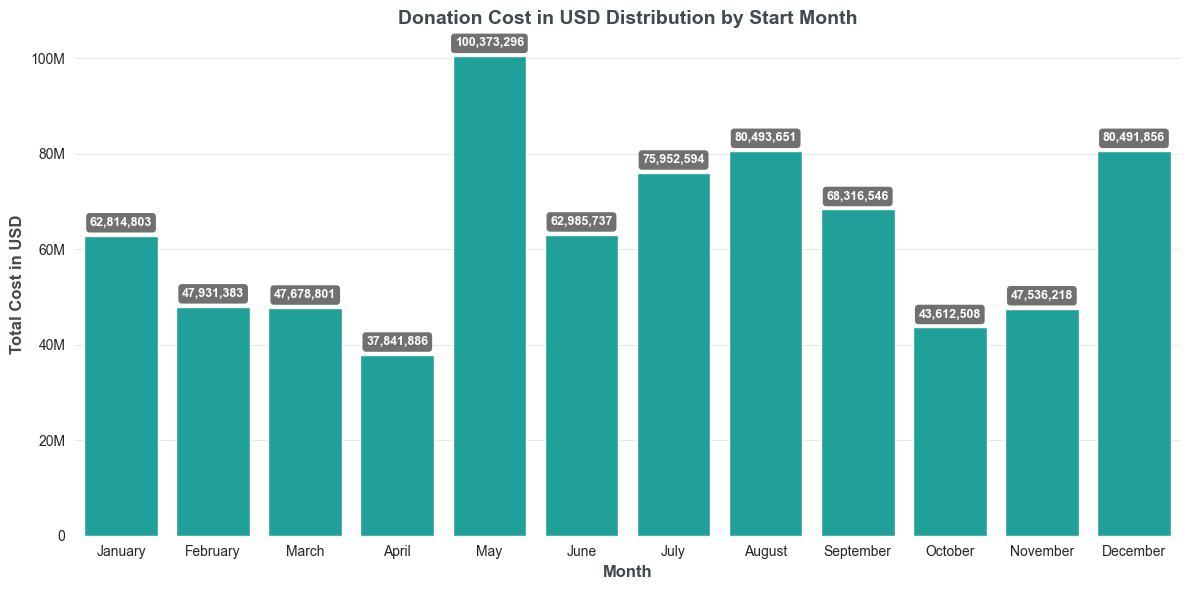

In [124]:
# Visualization of project cost by Month

# --- Calendar order, instead of from higher to lower ---
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

project_cost_by_month_name = (
    df.groupby("start_month_name")["total_cost_usd"]
      .sum()
      .reindex(month_order)   # Calendar order
      .reset_index(name="total_cost_usd")
      .rename(columns={"index": "start_month_name"})
)

# --- Bar Plot ---
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(
    data=project_cost_by_month_name, 
    x="start_month_name", 
    y="total_cost_usd", 
    color="#0bb5ab", 
    order=month_order,
    ax=ax
)

# --- Title & Labels ---
ax.set_title("Donation Cost in USD Distribution by Start Month", fontsize=14, fontweight="bold", color="#414a4c")
ax.set_xlabel("Month", fontsize=12, fontweight="bold", color="#414a4c")
ax.set_ylabel("Total Cost in USD", fontsize=12, fontweight="bold", color="#414a4c")

# --- Labels inside bars ---
for container in ax.containers:
    labels = [f"{int(v):,}" for v in container.datavalues]  # separador de miles
    texts = ax.bar_label(
        container, labels=labels, label_type="edge",
        color="white", fontsize=9, weight="bold", padding=5
    )
    for txt in texts:
        txt.set_bbox(dict(
            boxstyle="round,pad=0.3",
            facecolor="#333333", edgecolor="none", alpha=0.7
        ))

# --- Grid styling ---
ax.grid(axis="y", color="#c0cbcb", linewidth=0.5, alpha=0.6)
ax.set_axisbelow(True)

# Reuse the format built previously
ax.yaxis.set_major_formatter(FuncFormatter(shortened_format))


# --- No spine---
for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()


In [125]:
"""
The months of May, August and December concentrate the projects with the highest economic value.

This contrasts with the number of projects, which is highest in June and July, demonstrating that seasonality affects the volume and amount of donations differently.

"""

'\nThe months of May, August and December concentrate the projects with the highest economic value.\n\nThis contrasts with the number of projects, which is highest in June and July, demonstrating that seasonality affects the volume and amount of donations differently.\n\n'

### Predictive models

In [126]:
# Now, I will implement predictive models to try to forecast donation patterns for the future.


### Projects Number by Month Forecast

In [127]:
# Amount of Projects Prediction

# First Attempt
# Changing the dataframe to a time series, for the forecast
ts = (
    projects_by_month
      .assign(
          year_month=lambda d: pd.to_datetime(d['year_month'])      # a datetime
                                 .dt.to_period('M')                 # Monthly Period[M]
                                 .dt.to_timestamp(how='start')      # Start of the Month
      )
      .set_index('year_month')
      .sort_index()
      ['project_count']
      .asfreq('MS')   # frecuencia mensual (Month Start)
)

In [128]:
"""
Splitting the data
I will use the data from 2008 to 2016, because as I observed during the EDA, during this time period, projects show a more consistent and continues record of project_count.

- Before that date, the data is very limited and irregular, which could bias the model.
- After 2016, there is a sharp decline in the registration of projects and their cost.
  This could be attributed to many factors, but I cannot be sure of what caused it as it is a public database.

Therefore, using 2008-2015 will ensure a cleaner base for the model.
"""

train = ts.loc['2008-01':'2015-12'] # 96 datapoints
test  = ts.loc['2016-01':'2016-12'] # 12 datapoints

RMSE: 137 Projects
MAPE: 16.1%


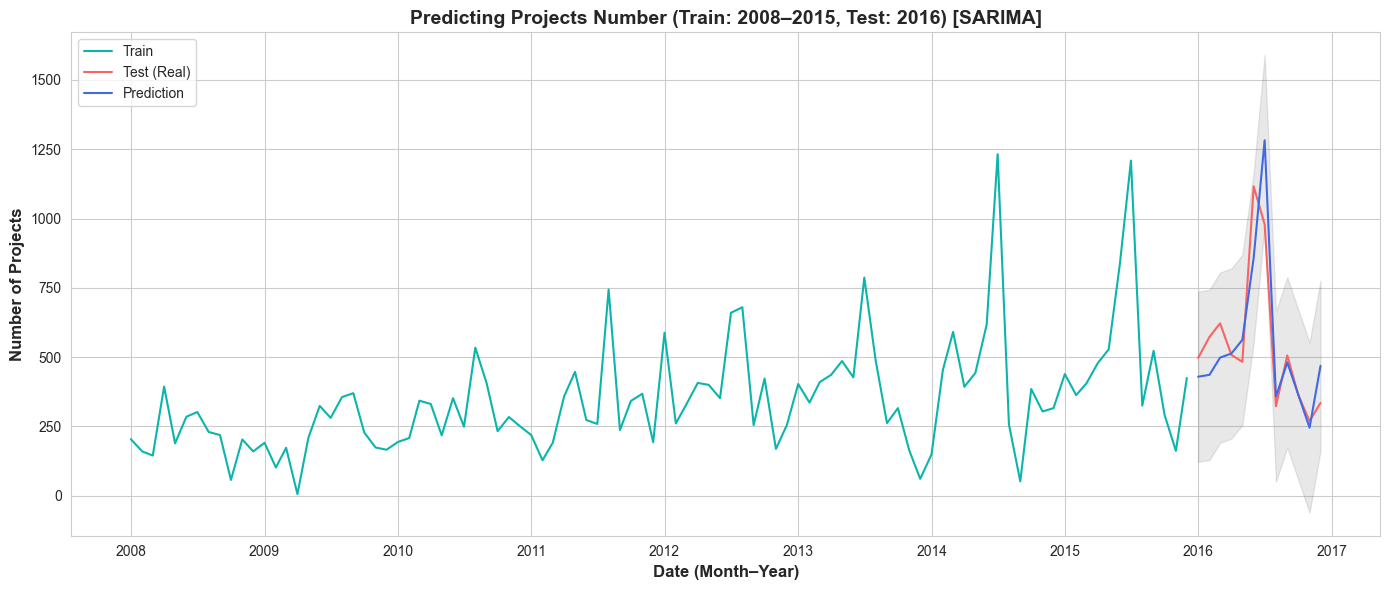

In [129]:
# --- First Attempt: SARIMA MODEL ---
model = SARIMAX(
    train,
    order=(1,1,1), # Lags to predict, Differencing, Moving Average
    seasonal_order=(1,1,1,12), # Yearly pattern. 12 because there are 12 Months in a Year
    enforce_stationarity=False,
    enforce_invertibility=False # False because the data is noisy. Return the estimation found.
)
results = model.fit(disp=False)

# Horizon Prediction
steps = len(test) # The 12 months from the test period
fcst = results.get_forecast(steps=steps)
pred_mean = pd.Series(fcst.predicted_mean, index=test.index)
pred_ci = fcst.conf_int()
pred_ci.index = test.index  # Use the same index, for the graph

# Model Evaluation
rmse = mean_squared_error(test, pred_mean, squared=False)
mape = (np.abs((test - pred_mean) / test).replace([np.inf, -np.inf], np.nan).dropna()).mean() * 100

print(f"RMSE: {rmse:,.0f} Projects")
print(f"MAPE: {mape:,.1f}%")

# Time series chart
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(train.index, train.values, label="Train", color="#0bb5ab")
ax.plot(test.index,  test.values,  label="Test (Real)", color="#f66564") 
ax.plot(pred_mean.index, pred_mean.values, label="Prediction", color="royalblue") # Dark blue for prediction
ax.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    color="#666969", # Grey for the confidence interval
    alpha=0.15
)

ax.set_title("Predicting Projects Number (Train: 2008–2015, Test: 2016) [SARIMA]", fontsize=14, fontweight="bold")
ax.set_xlabel("Date (Month–Year)", fontsize=12, fontweight="bold")
ax.set_ylabel("Number of Projects", fontsize=12, fontweight="bold")
ax.legend(loc="upper left")


plt.tight_layout()
plt.show()

In [130]:
"""
On this first attempt for predicting project count, it is evident when comparing the dark blue and red lines that the model captures seasonality and trend accurately.

Also, as seen with the grey shady area and RMSE, the model's forecast could forecast 137 more/less projects than reality.
In percentage, this represents a 16.1% deviation. Which is considered Good Forecast Accuracy [6] for Real Life Data, like this dataset.

As I specified above, I am not using the data from the other years because other years data is not consistent and could bias the model.

[6] Kaur, G. (2024, May 7). Mastering MAPE: A Guide to Understanding and Using Mean Absolute Percentage Error. Medium. https://medium.com/@pirthipalsingh138/mastering-mape-a-guide-to-understanding-and-using-mean-absolute-percentage-error-8fd88f347eaa
"""

"\nOn this first attempt for predicting project count, it is evident when comparing the dark blue and red lines that the model captures seasonality and trend accurately.\n\nAlso, as seen with the grey shady area and RMSE, the model's forecast could forecast 137 more/less projects than reality.\nIn percentage, this represents a 16.1% deviation. Which is considered Good Forecast Accuracy [6] for Real Life Data, like this dataset.\n\nAs I specified above, I am not using the data from the other years because other years data is not consistent and could bias the model.\n\n[6] Kaur, G. (2024, May 7). Mastering MAPE: A Guide to Understanding and Using Mean Absolute Percentage Error. Medium. https://medium.com/@pirthipalsingh138/mastering-mape-a-guide-to-understanding-and-using-mean-absolute-percentage-error-8fd88f347eaa\n"

### Total Cost by Month Forecast

In [131]:
# Total Cost Prediction

# First Attempt
# Changing the dataframe to a time series, for the forecast
ts = (
    project_cost_by_month
      .assign(
          year_month=lambda d: pd.to_datetime(d['year_month'])      # a datetime
                                 .dt.to_period('M')                 # Monthly Period[M]
                                 .dt.to_timestamp(how='start')      # Start of the Month
      )
      .set_index('year_month')
      .sort_index()
      ['total_cost_usd']
      .asfreq('MS')   # frecuencia mensual (Month Start)
)

In [132]:
"""
Splitting the data
I will use the data from 2008 to 2016, because as I observed during the EDA, during this time period, projects show a more consistent and continuous record of total cost.

- Before that date, the data is very limited and irregular, which could bias the model.
- After 2016, there is a sharp decline in the registration of projects and their cost.
  This could be attributed to many factors, but I cannot be sure of what caused it as it is a public database.

Therefore, using 2008-2015 will ensure a cleaner base for the model.
"""

train = ts.loc['2008-01':'2015-12'] # 96 datapoints
test  = ts.loc['2016-01':'2016-12'] # 12 datapoints

RMSE: 5,601,566 USD
MAPE: 43.3%


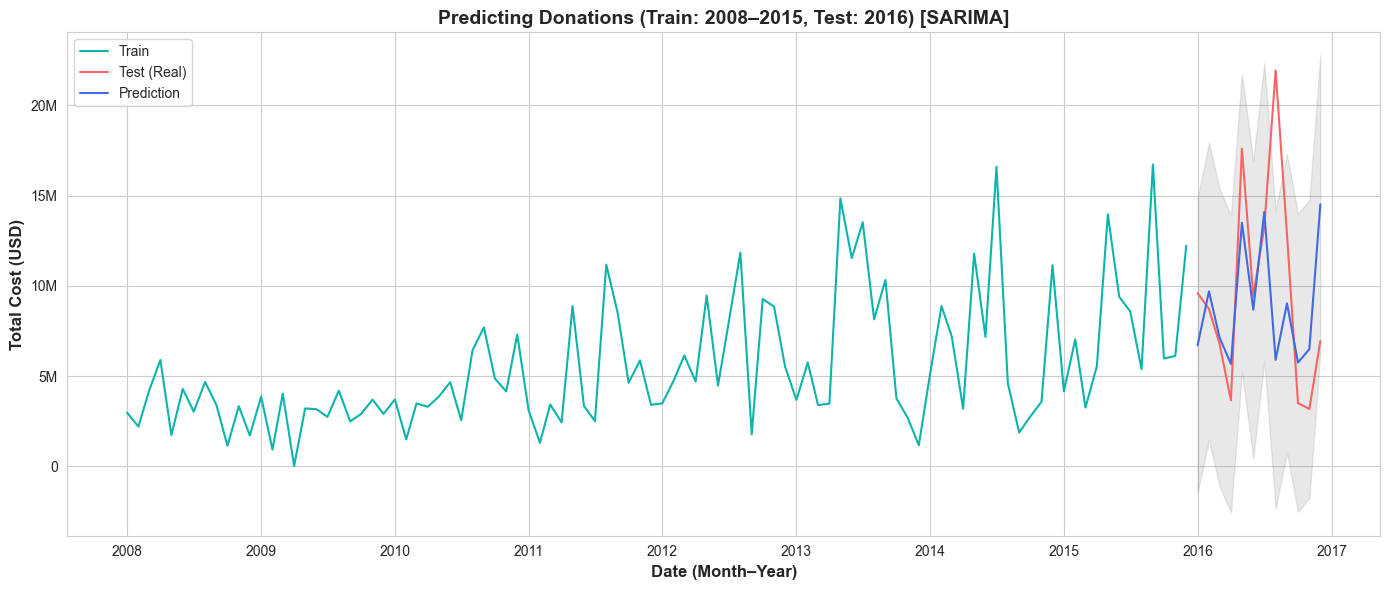

In [133]:
# --- First Attempt: SARIMA MODEL ---
model = SARIMAX(
    train,
    order=(1,1,1), # Lags to predict, Differencing, Moving Average
    seasonal_order=(1,1,1,12), # Yearly pattern. 12 because there are 12 Months in a Year
    enforce_stationarity=False,
    enforce_invertibility=False # False because the data is noisy. Return the estimation found.
)
results = model.fit(disp=False)

# Horizon Prediction
steps = len(test) # The 12 months from the test period
fcst = results.get_forecast(steps=steps)
pred_mean = pd.Series(fcst.predicted_mean, index=test.index)
pred_ci = fcst.conf_int()
pred_ci.index = test.index  # Use the same index, for the graph

# Model Evaluation
rmse = mean_squared_error(test, pred_mean, squared=False)
mape = (np.abs((test - pred_mean) / test).replace([np.inf, -np.inf], np.nan).dropna()).mean() * 100

print(f"RMSE: {rmse:,.0f} USD")
print(f"MAPE: {mape:,.1f}%")

# Time series chart
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(train.index, train.values, label="Train", color="#0bb5ab")
ax.plot(test.index,  test.values,  label="Test (Real)", color="#f66564") 
ax.plot(pred_mean.index, pred_mean.values, label="Prediction", color="royalblue") # Dark blue for prediction
ax.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    color="#666969", # Grey for the confidence interval
    alpha=0.15
)

ax.set_title("Predicting Donations (Train: 2008–2015, Test: 2016) [SARIMA]", fontsize=14, fontweight="bold")
ax.set_xlabel("Date (Month–Year)", fontsize=12, fontweight="bold")
ax.set_ylabel("Total Cost (USD)", fontsize=12, fontweight="bold")
ax.legend(loc="upper left")

# Reuse the format built previously to avoid Scientific Notation
ax.yaxis.set_major_formatter(FuncFormatter(shortened_format))

plt.tight_layout()
plt.show()


In [134]:
"""
At first, when comparing the dark blue and the red lines, we can appreciate that at first, the model managed to capture the seasonality and trend accurately.

However, we should be careful with a graph like the above, and should pay attention to the confidence range (gray area) and the RMSE and MSE:
- RMSE: As seen with the grey shady area, the model's forecast could miss the real amount of donations by 5.6 million USD
- MSE: In percentage, we observe a 43.3% relative deviation of the forecast from what was really donated.

The above could be attritbuted to:
- High volatility in donations (outliers)
- Lack of training data monthly points from 2008-2015 are not much for a seasonal model.

However, I could not use the data from the other years because as I specified when diving the dataset,
data outside of that period is not consistent and could further bias the model.
"""

"\nAt first, when comparing the dark blue and the red lines, we can appreciate that at first, the model managed to capture the seasonality and trend accurately.\n\nHowever, we should be careful with a graph like the above, and should pay attention to the confidence range (gray area) and the RMSE and MSE:\n- RMSE: As seen with the grey shady area, the model's forecast could miss the real amount of donations by 5.6 million USD\n- MSE: In percentage, we observe a 43.3% relative deviation of the forecast from what was really donated.\n\nThe above could be attritbuted to:\n- High volatility in donations (outliers)\n- Lack of training data monthly points from 2008-2015 are not much for a seasonal model.\n\nHowever, I could not use the data from the other years because as I specified when diving the dataset,\ndata outside of that period is not consistent and could further bias the model.\n"

RMSE: 4,883,639 USD
MAPE: 41.0%


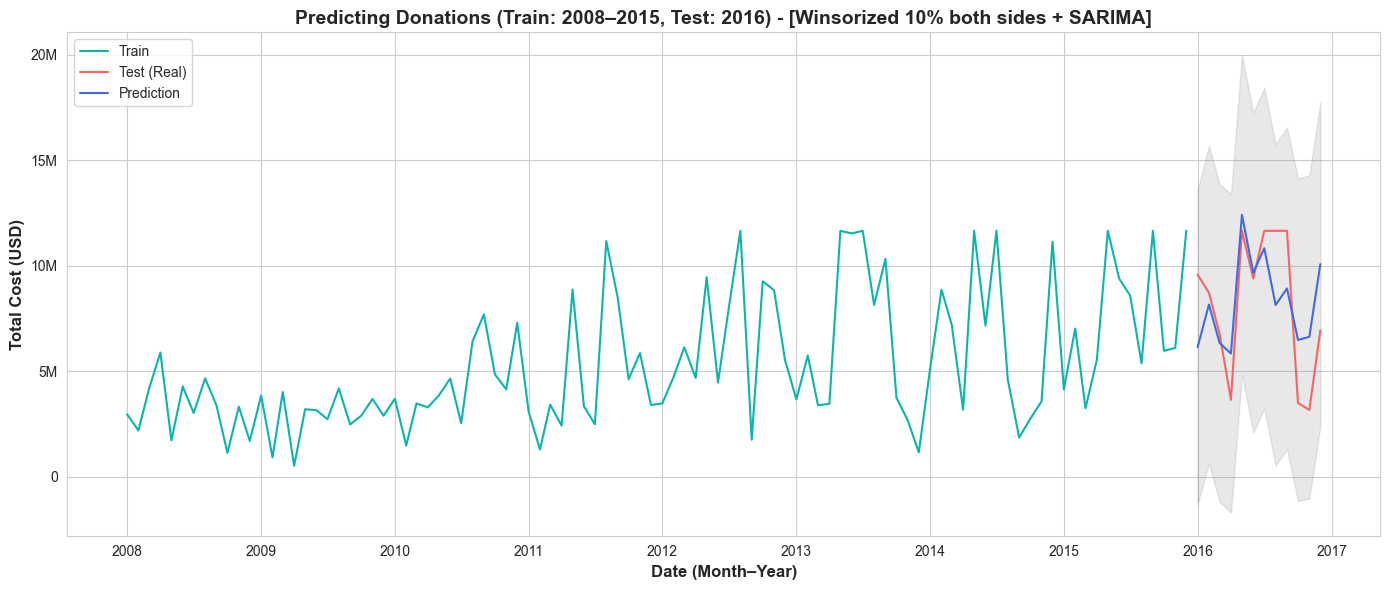

In [135]:
# --- Second Attempt: SARIMA MODEL ---

# Winsorize the data: remove outliers at 10% and 90% 
# I chose to remove the outliers from the first and last 10%, because as seen during the EDA. We have too much outliers in the data, that could skew the model.
lower, upper = ts.quantile(0.1), ts.quantile(0.9)
ts_wins = ts.clip(lower=lower, upper=upper)

# Split the winsorized data following the same logic as before
train = ts_wins.loc['2008-01':'2015-12']
test  = ts_wins.loc['2016-01':'2016-12']

# Training and fitting the model
model = SARIMAX(
    train,
    order=(1,1,1), # Lags to predict, Differencing, Moving Average
    seasonal_order=(1,1,1,12), # Yearly Cycles
    enforce_stationarity=False, 
    enforce_invertibility=False # False because the data is noisy. Return the estimation found.
)

results = model.fit(disp=False)

# Horizon Prediction
steps = len(test) # 12 data points
fcst = results.get_forecast(steps=steps)
pred_mean = fcst.predicted_mean
pred_ci   = fcst.conf_int()

# Evaluation of the model
rmse = mean_squared_error(ts.loc[test.index], pred_mean, squared=False)
mape = (np.abs((ts.loc[test.index] - pred_mean) / ts.loc[test.index])
        .replace([np.inf, -np.inf], np.nan).dropna()).mean() * 100

print(f"RMSE: {rmse:,.0f} USD")
print(f"MAPE: {mape:,.1f}%")

# Time series chart
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(train.index, train.values, label="Train", color="#0bb5ab")
ax.plot(test.index,  test.values,  label="Test (Real)", color="#f66564") 
ax.plot(pred_mean.index, pred_mean.values, label="Prediction", color="royalblue") # Dark blue for prediction
ax.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    color="#666969", # Grey for the confidence interval
    alpha=0.15
)

ax.set_title("Predicting Donations (Train: 2008–2015, Test: 2016) - [Winsorized 10% both sides + SARIMA]", fontsize=14, fontweight="bold")
ax.set_xlabel("Date (Month–Year)", fontsize=12, fontweight="bold")
ax.set_ylabel("Total Cost (USD)", fontsize=12, fontweight="bold")
ax.legend(loc="upper left")

# Reuse the format built previously for the Y Axis Legend
ax.yaxis.set_major_formatter(FuncFormatter(shortened_format))

plt.tight_layout()
plt.show()


In [136]:
"""
This second attempt seems to be more accurate.

- Again the the model manages to capture the seasonality and trend accurately.
- RMSE: I was able to reduce the RMSE to 4.8 million USD, which means the forecast is now closer to the real amount of donations than before in absolute terms.
- MSE: However, there is no significant difference in the percentage. It came down from 43.3% to 41.1%

However, I ran into the same issues of a high RMSE and MSE, because 
- There is still a high volatility in donations (outliers)
- There is still of training data monthly points from 2008-2015 are not much for a seasonal model.

"""

'\nThis second attempt seems to be more accurate.\n\n- Again the the model manages to capture the seasonality and trend accurately.\n- RMSE: I was able to reduce the RMSE to 4.8 million USD, which means the forecast is now closer to the real amount of donations than before in absolute terms.\n- MSE: However, there is no significant difference in the percentage. It came down from 43.3% to 41.1%\n\nHowever, I ran into the same issues of a high RMSE and MSE, because \n- There is still a high volatility in donations (outliers)\n- There is still of training data monthly points from 2008-2015 are not much for a seasonal model.\n\n'

In [137]:
# --- Third Attempt: SARIMA ---
# I will check how the data is distributed to try to improve the model 
# Percentiles
df[['total_cost']].describe(
    percentiles=[i/10 for i in range(1,10)]
).T[['mean', 'std'] + [f"{int(i*100)}%" for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]]]

,mean,std,10%,20%,30%,40%,50%,60%,70%,80%,90%
total_cost,"61,998.20","406,339.75","1,000.00","2,000.00","3,050.00","4,400.00","6,000.00","8,800.00","16,288.00","48,035.00","100,000.00"


In [138]:
# On this attempt, I will create two separate models. One for the data that follows a more steady increase, and other one for the higher donations

# --- SARIMA FOR THE 70% WITHOUT OUTLIERS ---
# This time, I will split it differently, to see if that makes a difference

# Lowest range data model
q70 = df['total_cost'].quantile(0.70)  # 70% of data, with donations up to 16,288.00 USD
small_mid = df[df['total_cost'] < q70].copy()
small_mid

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,start_month,start_month_name,start_year,year_month,start_date_implementation,end_date_implementation,duration_days_implementation,start_date_donation,end_date_donation,duration_days_donation,total_cost,total_cost_currency,total_cost_usd,implementation_cost,implementation_cost_currency,implementation_cost_usd
0,Al-Furqan Charitable Foundation - Pakistan,Mohammed Abdullah Mahmoud Al Mulla,Pakistan,Syria relief aid for families,"Well of the people of Qatar, may God protect them",0,"Digging an artesian well, depth from 45 to 80 ...",Not specified,7,July,2014,2014-07,2014-07-25,2015-01-25,184,2014-07-25,2015-03-25,243.00,9000,SAR,"2,400.30",8550,SAR,"2,280.28"
16,Al-Furqan Charitable Foundation - Pakistan,Mohammed Saleh Al-Awairi Al-Marri,Pakistan,Well drilling,Well do benefactor,0,Drilling a well with an electric pump - a wate...,Not specified,7,July,2007,2007-07,2007-07-11,2008-01-11,184,2007-07-11,2008-03-11,244.00,6000,SAR,"1,600.20",5700,SAR,"1,520.19"
17,Al-Furqan Charitable Foundation - Pakistan,Nuzha Ali Al-Shaqif,Pakistan,Well drilling,Nuzha Ali Al-Shqif well,0,Drilling a well with an electric pump - a wate...,Not specified,7,July,2007,2007-07,2007-07-11,2008-01-11,184,2007-07-11,2008-03-11,244.00,6000,SAR,"1,600.20",5700,SAR,"1,520.19"
18,Ansar al-Sunna Muhammadiyah group - Egypt,Nora Jaber Al-Kuwari,Egypt,Well drilling,Jaber Juma Al Kuwari well,0,Digging an artesian well - the number of benef...,"Ghazali, Faqous, Sharqia",7,July,2007,2007-07,2007-07-11,2008-01-11,184,2007-07-11,2008-03-11,244.00,5500,SAR,"1,466.85",5225,SAR,"1,393.51"
19,Ansar al-Sunna Muhammadiyah group - Egypt,Nora Jaber Al-Kuwari,Egypt,Well drilling,Well of Maryam bint Saud Al-Kuwari,0,Drilling an artesian well with a pump to draw ...,Not specified,7,July,2007,2007-07,2007-07-11,2008-01-11,184,2007-07-11,2008-03-11,244.00,5500,SAR,"1,466.85",5225,SAR,"1,393.51"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45707,Islamic University - Sudhi Jywali - Khushab - ...,Nayef Jaithan Abdullah Mubarak Al-Dossary,Pakistan,Sponsorship of a student is conditional,Sponsoring students for the Omar Juma Al Murai...,0,Sponsorship of students for Omar Juma Al Murai...,Pakistan - M? Anwali - Punjab - Bhoranwala and...,2,February,2019,2019-02,2019-02-04,2019-08-04,181,2019-02-04,2019-10-04,242.00,3000,SAR,800.10,2775,SAR,740.09
45708,Islamic University - Sudhi Jywali - Khushab - ...,Faisal Abdullah Al-Kubaisi,Pakistan,Sponsorship of a student is conditional,Sponsoring students for the Abdullah bin Muham...,0,Sponsorship of students for the Mosque of Abdu...,Client of Junyan - Palaces - Punjab - Pakistan,2,February,2019,2019-02,2019-02-04,2019-08-04,181,2019-02-04,2019-10-04,242.00,3000,SAR,800.10,2775,SAR,740.09
45709,Islamic University - Sudhi Jywali - Khushab - ...,Hamad Mohammed Hamad Al-Rumaihi,Pakistan,Sponsorship of a student is conditional,Sponsorship of students for Al-Nour Mosque,0,Sponsorship of students for Al-Nour Mosque Pro...,Pakistan - Muzaffar Karah - Punjab - 4/7 R Ran...,2,February,2019,2019-02,2019-02-04,2019-08-04,181,2019-02-04,2019-10-04,242.00,3000,SAR,800.10,2775,SAR,740.09
45720,Southeast Asia Development Commission Corporat...,Haya Hamad Al-Mannai,Philippines,Philippines ongoing charity conditional,Restoration of Haya Hamad Al Mannai Mosque,0,Restoration of Haya Hamad Al Mannai Mosque,Philippines,7,July,2017,2017-07,2017-07-02,2018-01-02,184,2017-07-02,2018-03-02,243.00,7695,SAR,"2,052.26",7118,SAR,"1,898.37"


In [139]:
# Grouping by year_month
project_cost_by_month_70p = (
    small_mid.groupby('year_month')["total_cost_usd"]
      .sum()         # Group by year_month
      .reset_index(name='total_cost_usd')
      .sort_values('year_month')
)

# Convert 'year_month' to timestamp to be able to graph it
project_cost_by_month_70p['year_month'] = project_cost_by_month_70p['year_month'].dt.to_timestamp()

In [140]:
# Changing the dataframe to a time series, for the forecast
ts = (
    project_cost_by_month_70p
      .assign(
          year_month=lambda d: pd.to_datetime(d['year_month'])      # a datetime
                                 .dt.to_period('M')                 # Monthly Period[M]
                                 .dt.to_timestamp(how='start')      # Start of the Month
      )
      .set_index('year_month')
      .sort_index()
      ['total_cost_usd']
      .asfreq('MS')   # frecuencia mensual (Month Start)
)

In [141]:
# Splitting the data
train = ts.loc['2008-01':'2015-12'] # 96 datapoints
test  = ts.loc['2016-01':'2016-12'] # 12 datapoints

RMSE: 134,211 USD
MAPE: 18.8%


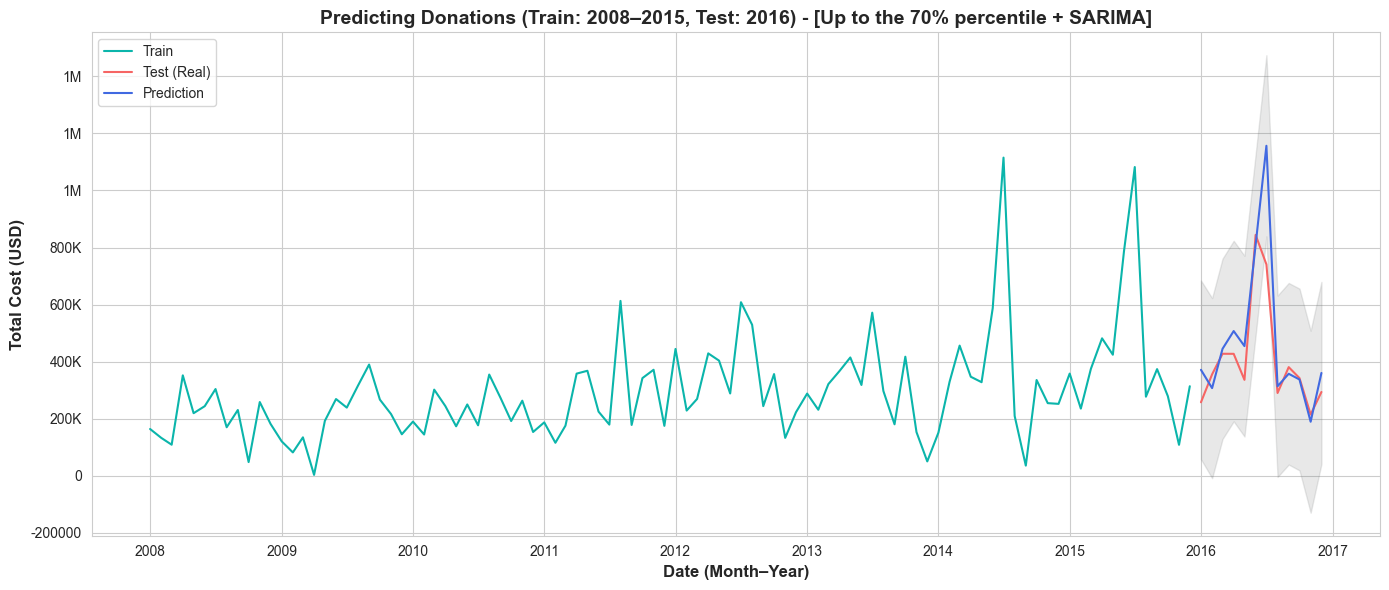

In [142]:
# Training and fitting the model
model = SARIMAX(
    train,
    order=(1,1,1), # Lags to predict, Differencing, Moving Average
    seasonal_order=(1,1,1,12), # Yearly Cycles
    enforce_stationarity=False, 
    enforce_invertibility=False # False because the data is noisy. Return the estimation found.
)

results = model.fit(disp=False)

# Horizon Prediction
steps = len(test) # 12 data points
fcst = results.get_forecast(steps=steps)
pred_mean = fcst.predicted_mean
pred_ci   = fcst.conf_int()

# Evaluation of the model
rmse = mean_squared_error(ts.loc[test.index], pred_mean, squared=False)
mape = (np.abs((ts.loc[test.index] - pred_mean) / ts.loc[test.index])
        .replace([np.inf, -np.inf], np.nan).dropna()).mean() * 100

print(f"RMSE: {rmse:,.0f} USD")
print(f"MAPE: {mape:,.1f}%")

# Time series chart
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(train.index, train.values, label="Train", color="#0bb5ab")
ax.plot(test.index,  test.values,  label="Test (Real)", color="#f66564") 
ax.plot(pred_mean.index, pred_mean.values, label="Prediction", color="royalblue") # Dark blue for prediction
ax.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    color="#666969", # Grey for the confidence interval
    alpha=0.15
)

ax.set_title("Predicting Donations (Train: 2008–2015, Test: 2016) - [Up to the 70% percentile + SARIMA]", fontsize=14, fontweight="bold")
ax.set_xlabel("Date (Month–Year)", fontsize=12, fontweight="bold")
ax.set_ylabel("Total Cost (USD)", fontsize=12, fontweight="bold")
ax.legend(loc="upper left")

# Reuse the format built previously for the Y Axis Legend
ax.yaxis.set_major_formatter(FuncFormatter(shortened_format))

plt.tight_layout()
plt.show()


In [143]:
"""
Without the highest donations, it seems that the model does a better job at forecasting donations

- Is captures the seasonality and trend accurately.
- RMSE: I was able to reduce the RMSE to 180 K USD, which means the forecast is now closer to the real amount of donations than before in absolute terms.
- MSE: In percentage, we observe a 21.4% relative deviation of the forecast from what was really donated.

So we can confidently affirm that the highest donations create variation that skews the model. And without it, I was able to build a more stable model.
However in real life, I would have to find a way to consider the highest donations. Thus, I will attempt to create a model for them below.

"""

'\nWithout the highest donations, it seems that the model does a better job at forecasting donations\n\n- Is captures the seasonality and trend accurately.\n- RMSE: I was able to reduce the RMSE to 180 K USD, which means the forecast is now closer to the real amount of donations than before in absolute terms.\n- MSE: In percentage, we observe a 21.4% relative deviation of the forecast from what was really donated.\n\nSo we can confidently affirm that the highest donations create variation that skews the model. And without it, I was able to build a more stable model.\nHowever in real life, I would have to find a way to consider the highest donations. Thus, I will attempt to create a model for them below.\n\n'

In [144]:
# --- SARIMA FOR THE 30% OF TOP OUTLIERS ---
# This time, I will split it differently, to see if that makes a difference

# Largest range data model
large = df[df['total_cost'] > q70].copy() # # 30% of data, with donations higher than 16,288.00 USD
large

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,start_month,start_month_name,start_year,year_month,start_date_implementation,end_date_implementation,duration_days_implementation,start_date_donation,end_date_donation,duration_days_donation,total_cost,total_cost_currency,total_cost_usd,implementation_cost,implementation_cost_currency,implementation_cost_usd
1,Al-Hikma Yemeni Charitable Society - Yemen,Aisha Dhiab Rashid Al-Obaid,Yemen,Memorization centers,Aisha Diab Rashid Al-Obaid School for Holy Qur...,0,Building a two-semester school for memorizing ...,"Al-Wajin, Sharab, Taiz",7,July,2007,2007-07,2007-07-08,2008-05-08,305,2007-07-08,2008-07-08,366.00,57000,SAR,"15,201.90",54150,SAR,"14,441.81"
2,Mauritanian Association for Reviving Prohibite...,Rashid Faisal Rashid Al-Jabr Al-Nuaimi,Mauritania,Mosques,Rashid bin Faisal Al Nuaimi Mosque,500,Building a mosque - with ablution places - bat...,As needed,7,July,2007,2007-07,2007-07-08,2008-07-08,366,2007-07-08,2009-01-08,550.00,58500,SAR,"15,601.95",55575,SAR,"14,821.85"
3,Al-Manhal Charitable Society - Somalia,"Mansour Mubarak Al-Nasr, may God have mercy on...",Somalia,Mosques,"Mansour Mubarak Al-Nasr Mosque, may God have m...",200,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Maraño,7,July,2007,2007-07,2007-07-10,2008-07-10,366,2007-07-10,2009-01-10,550.00,55500,SAR,"14,801.85",52725,SAR,"14,061.76"
4,Good Life Organization - Niger,Abdullah Al-Suwaidi,Niger,Mosques,"Abu Bakr Al-Siddiq Mosque, may God be pleased ...",100,Building a mosque - with ablution places - bat...,Niamey Prefecture - the city of Kirtasi Zeno -...,7,July,2007,2007-07,2007-07-10,2008-07-10,366,2007-07-10,2009-01-10,550.00,53000,SAR,"14,135.10",50350,SAR,"13,428.34"
5,Al-Manhal Charitable Society - Somalia,Afra Zafer Al Hajri,Somalia,Mosques,Al-Taqwa Mosque,0,Building a mosque - with ablution places - bat...,As needed,7,July,2007,2007-07,2007-07-10,2008-07-10,366,2007-07-10,2009-01-10,550.00,55500,SAR,"14,801.85",52725,SAR,"14,061.76"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45716,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Qatar,Orphans and families sponsorship expenses,Paying the dues of Qatari orphans for the mont...,0,Paying the dues of Qatari orphans for the mont...,Not specified,5,May,2019,2019-05,2019-05-16,2019-11-16,184,2019-05-16,2020-01-16,245.00,110670,SAR,"29,515.69",110670,SAR,"29,515.69"
45717,"Sunni Revival Endowment for Education, Relief ...",Eid Charitable Foundation,Lebanon,Endowment projects,Covering bakery expenses,0,0,0,5,May,2019,2019-05,2019-05-20,2019-09-20,123,2019-05-20,2020-01-20,245.00,27101,SAR,"7,227.84",27101,SAR,"7,227.84"
45718,Education Above All Foundation,Eid Charitable Foundation,Qatar,Somalia public charity expenses are conditional,Educating children in Somalia - Educate a chil...,0,It is a contribution to the United Nations pro...,Not specified,5,May,2019,2019-05,2019-05-26,2019-09-26,123,2019-05-26,2020-01-26,245.00,1000000,SAR,"266,700.00",1000000,SAR,"266,700.00"
45719,Education Above All Foundation,Eid Charitable Foundation,Qatar,Relief Yemen alms,Educating children in Yemen - Educate a child ...,0,It is a contribution to building the national ...,Not specified,5,May,2019,2019-05,2019-05-26,2019-09-26,123,2019-05-26,2020-01-26,245.00,1900000,SAR,"506,730.00",1900000,SAR,"506,730.00"


In [145]:
# I will again check the percentiles, to decide what would be the greates course of action
large[['total_cost']].describe(
    percentiles=[i/10 for i in range(1,10)]
).T[['mean', 'std'] + [f"{int(i*100)}%" for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]]]

,mean,std,10%,20%,30%,40%,50%,60%,70%,80%,90%
total_cost,"195,929.29","724,389.42","22,500.00","30,620.00","43,828.80","52,789.00","62,011.00","81,700.00","105,000.00","182,500.00","400,000.00"


In [146]:
# There is still a high difference between the donations. So I will take up to the 70% percentile of this top 30% of the data with the highest values.
# The rest I will consider them outliers.


# To undestand, what this represents to the original dataset, I will make the following:
# Percentiles I will take from large (I will take the 70% from the top 30%)
subset_percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# Convert to percentiles
original_percentiles = [0.70 + p*0.30 for p in subset_percentiles]

# Obtain the real values from total_cost in the original_percentiles
values = [df['total_cost'].quantile(p) for p in original_percentiles]

# Visualize in a Table
df_map = pd.DataFrame({
    "Subset Percentile (Top 30%)": [f"{int(p*100)}%" for p in subset_percentiles],
    "Original Percentile": [f"{p*100:.1f}%" for p in original_percentiles],
    "Value in Dataset (USD)": [f"{v:,.2f}" for v in values]
})

print(df_map)


  Subset Percentile (Top 30%) Original Percentile Value in Dataset (USD)
0                         10%               73.0%              22,500.00
1                         20%               76.0%              30,616.64
2                         30%               79.0%              43,813.68
3                         40%               82.0%              52,772.80
4                         50%               85.0%              62,007.70
5                         60%               88.0%              81,700.00
6                         70%               91.0%             105,000.00


In [147]:
# This makes it clearer. I will create a model for the 70.0001% to the 91% percentiles

q70_large = large['total_cost'].quantile(0.70)  # 70% of data, with donations up to 16,288.00 USD

large_70to91p= large[large['total_cost'] > q70_large].copy() # Donations higher than 16,288.00 USD up to 105,0000 USD
large_70to91p

,association,donor_name,country,project_type,project_name,beneficiaries,project_components,project_title,start_month,start_month_name,start_year,year_month,start_date_implementation,end_date_implementation,duration_days_implementation,start_date_donation,end_date_donation,duration_days_donation,total_cost,total_cost_currency,total_cost_usd,implementation_cost,implementation_cost_currency,implementation_cost_usd
15,Al-Manhal Charitable Society - Somalia,Khaled Nasser Hamad Al-Hajri,Somalia,Mosques,Nasser Hamad Al-Hajri Mosque,500,Building a mosque - with ablution places - bat...,Sharkia Governorate - Bosaso City - Jisli Village,7,July,2007,2007-07,2007-07-11,2008-07-11,366,2007-07-11,2009-01-11,550.00,136000,SAR,"36,271.20",129200,SAR,"34,457.64"
25,Ansar al-Sunna Muhammadiyah group - Egypt,Ali Abdullah Al-Suwaidi,Egypt,Health centers,Habib Al-Mustafa Hospital,0,Construction of a charitable hospital consisti...,Faqous Center - Sharkia Governorate -,7,July,2007,2007-07,2007-07-11,2009-01-11,550,2007-07-11,2009-07-11,731.00,1649000,SAR,"439,788.30",1566550,SAR,"417,798.89"
107,Sheikh Eid Bin Muhammad Al Thani Foundation - ...,Qatar Endowments Authority,Indonesia,Mosques,Sheikh Thani Bin Jassim Al Thani Mosque,400,Building a Jameh Mosque in the center of the c...,Not specified,7,July,2007,2007-07,2007-07-24,2008-07-24,366,2007-07-24,2009-01-24,550.00,168500,SAR,"44,938.95",160075,SAR,"42,692.00"
178,Ansar al-Sunna Muhammadiyah group - Egypt,Khaled Ahmed Ali gentlemen,Egypt,Mosques,Maryam Hussein Muhammad sada mosque,833,"A mosque from two floors, the ground consists ...",Cairo Governorate - Marj City -,8,August,2007,2007-08,2007-08-14,2008-08-14,366,2007-08-14,2009-02-14,550.00,263000,SAR,"70,142.10",249850,SAR,"66,634.99"
239,Al Ihsan Charitable Society - Yemen,Ahmed bin Hamad bin Khalid Al Thani,Yemen,Memorization centers,Sheikh Ahmed bin Hamad bin Khalid Al Thani Center,0,Building a school for the memorization of the ...,Scientific Call Center - Sana&#39;a,8,August,2007,2007-08,2007-08-21,2008-02-21,184,2007-08-21,2008-04-21,244.00,200000,SAR,"53,340.00",190000,SAR,"50,673.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45713,Your link,Eid Charitable Foundation,Qatar,Yemen Relief Zakat,Empowering youth in the agricultural sector - ...,0,Yemeni youth supported farms with irrigation e...,Not specified,4,April,2019,2019-04,2019-04-04,2020-08-04,488,2019-04-04,2020-08-04,488.00,1000000,SAR,"266,700.00",1000000,SAR,"266,700.00"
45714,Your link,Eid Charitable Foundation,Qatar,Relief expenses of Syria charity,Infrastructure rehabilitation to improve livel...,0,Rehabilitation of the infrastructure of 4 furn...,Not specified,4,April,2019,2019-04,2019-04-04,2020-04-04,366,2019-04-04,2019-12-04,244.00,3003009,SAR,"800,902.50",3003009,SAR,"800,902.50"
45716,Sheikh Eid bin Mohammed Al Thani Charitable Fo...,Eid Charitable Foundation,Qatar,Orphans and families sponsorship expenses,Paying the dues of Qatari orphans for the mont...,0,Paying the dues of Qatari orphans for the mont...,Not specified,5,May,2019,2019-05,2019-05-16,2019-11-16,184,2019-05-16,2020-01-16,245.00,110670,SAR,"29,515.69",110670,SAR,"29,515.69"
45718,Education Above All Foundation,Eid Charitable Foundation,Qatar,Somalia public charity expenses are conditional,Educating children in Somalia - Educate a chil...,0,It is a contribution to the United Nations pro...,Not specified,5,May,2019,2019-05,2019-05-26,2019-09-26,123,2019-05-26,2020-01-26,245.00,1000000,SAR,"266,700.00",1000000,SAR,"266,700.00"


In [148]:
# Grouping by year_month
project_cost_by_month_70to91p = (
    large_70to91p.groupby('year_month')["total_cost_usd"]
      .sum()         # Group by year_month
      .reset_index(name='total_cost_usd')
      .sort_values('year_month')
)

# Convert 'year_month' to timestamp to be able to graph it
project_cost_by_month_70to91p['year_month'] = project_cost_by_month_70to91p['year_month'].dt.to_timestamp()

In [149]:
# Changing the dataframe to a time series, for the forecast
ts = (
    project_cost_by_month_70to91p
      .assign(
          year_month=lambda d: pd.to_datetime(d['year_month'])      # a datetime
                                 .dt.to_period('M')                 # Monthly Period[M]
                                 .dt.to_timestamp(how='start')      # Start of the Month
      )
      .set_index('year_month')
      .sort_index()
      ['total_cost_usd']
      .asfreq('MS')   # frecuencia mensual (Month Start)
)

In [150]:
# Splitting the data. The same as before
train = ts.loc['2008-01':'2015-12']
test  = ts.loc['2016-01':'2016-12'] 

RMSE: 5,494,432 USD
MAPE: 50.7%


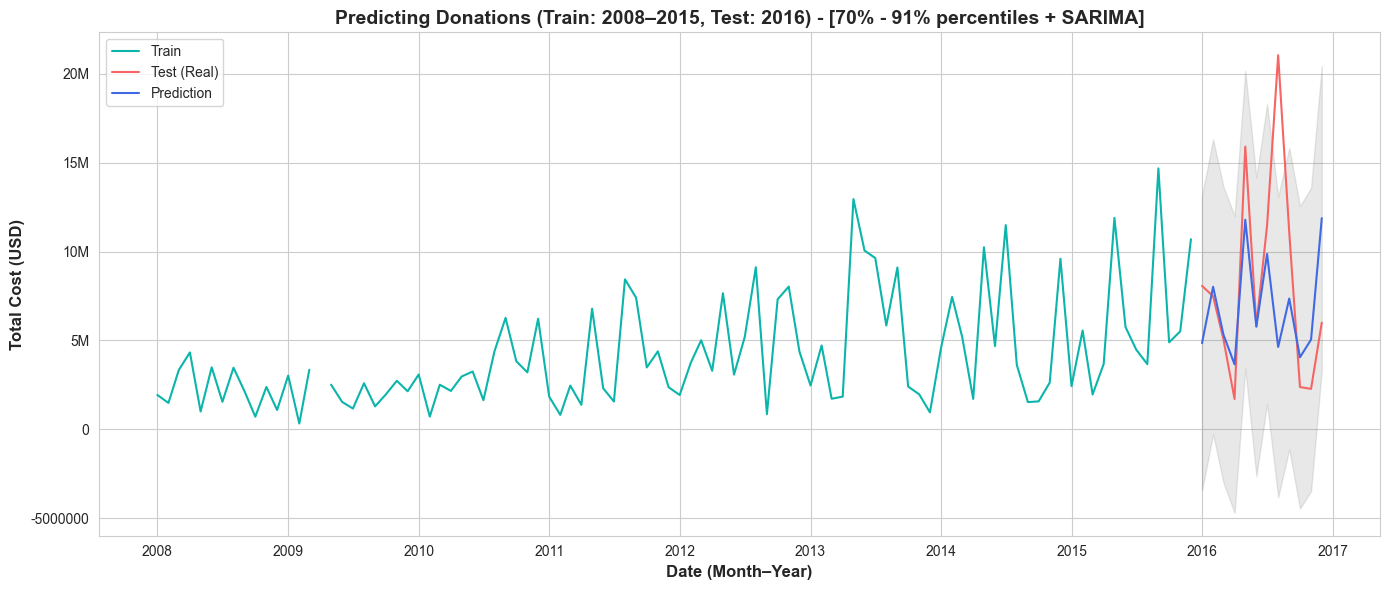

In [151]:
# Training and fitting the model
model = SARIMAX(
    train,
    order=(1,1,1), # Lags to predict, Differencing, Moving Average
    seasonal_order=(1,1,1,12), # Yearly Cycles
    enforce_stationarity=False, 
    enforce_invertibility=False # False because the data is noisy. Return the estimation found.
)

results = model.fit(disp=False)

# Horizon Prediction
steps = len(test) # 12 data points
fcst = results.get_forecast(steps=steps)
pred_mean = fcst.predicted_mean
pred_ci   = fcst.conf_int()

# Evaluation of the model
rmse = mean_squared_error(ts.loc[test.index], pred_mean, squared=False)
mape = (np.abs((ts.loc[test.index] - pred_mean) / ts.loc[test.index])
        .replace([np.inf, -np.inf], np.nan).dropna()).mean() * 100

print(f"RMSE: {rmse:,.0f} USD")
print(f"MAPE: {mape:,.1f}%")

# Time series chart
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(train.index, train.values, label="Train", color="#0bb5ab")
ax.plot(test.index,  test.values,  label="Test (Real)", color="#f66564") 
ax.plot(pred_mean.index, pred_mean.values, label="Prediction", color="royalblue") # Dark blue for prediction
ax.fill_between(
    pred_ci.index,
    pred_ci.iloc[:, 0],
    pred_ci.iloc[:, 1],
    color="#666969", # Grey for the confidence interval
    alpha=0.15
)

ax.set_title("Predicting Donations (Train: 2008–2015, Test: 2016) - [70% - 91% percentiles + SARIMA]", fontsize=14, fontweight="bold")
ax.set_xlabel("Date (Month–Year)", fontsize=12, fontweight="bold")
ax.set_ylabel("Total Cost (USD)", fontsize=12, fontweight="bold")
ax.legend(loc="upper left")

# Reuse the format built previously for the Y Axis Legend
ax.yaxis.set_major_formatter(FuncFormatter(shortened_format))

plt.tight_layout()
plt.show()

In [152]:
"""
It seems that there are not enough points to build a confident model for the highest amount donations.
As seen between 2009-2010, there is even a Month without donations. 

This model is the one that resembles the first model the most, as:
- It captures the seasonability and trend accurately, but shows higher values of RMSE and MSE

This confirms the limitations of predicting total_cost with this dataset, that were specified above. Which are that:
- There is a high volatility in donation amounts (outliers). Especially in higher values, even when taking out the top 9% of the data.
- There is not much monthly data points to be able to build a robust model that incorporates the highest outliers.

"""

'\nIt seems that there are not enough points to build a confident model for the highest amount donations.\nAs seen between 2009-2010, there is even a Month without donations. \n\nThis model is the one that resembles the first model the most, as:\n- It captures the seasonability and trend accurately, but shows higher values of RMSE and MSE\n\nThis confirms the limitations of predicting total_cost with this dataset, that were specified above. Which are that:\n- There is a high volatility in donation amounts (outliers). Especially in higher values, even when taking out the top 9% of the data.\n- There is not much monthly data points to be able to build a robust model that incorporates the highest outliers.\n\n'